# Importações:

In [1]:
# Biblioteca para manipulação dos dados:
import pandas as pd

# Biblioteca para visualização dos dados:
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados:

In [2]:
diretorio = input('Diretorio:\n')
df_treino = pd.read_csv(diretorio+'\\'+'df_treino.csv')
df_teste = pd.read_csv(diretorio+'\\'+'df_teste.csv')

Diretorio:
D:\Estudo\Extensão - Ciência de Dados\População de Rua


In [3]:
df_treino.drop('Grávidez', axis=1, inplace=True)
df_teste.drop('Grávidez', axis=1, inplace=True)

In [4]:
df_treino.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Bairro                                    3946 non-null   object
 1   Dormiu_abrigo_quanto_tempo                3946 non-null   object
 2   Faixa etária                              3946 non-null   object
 3   Principal_problema_abrigo                 3946 non-null   object
 4   Região Administrativa                     3946 non-null   object
 5   Frequência_tabaco                         3946 non-null   object
 6   Frequência_Maconha/Haxixe                 3946 non-null   object
 7   Local da coleta de dados                  3946 non-null   object
 8   Unidade de Acolhimento/US                 3946 non-null   object
 9   Frequência_Inalantes/Cola/Solvente/Tiner  3946 non-null   object
 10  Frequência_Cocaína                        3946 n

# Visualizações:

## Gráficos de contigência

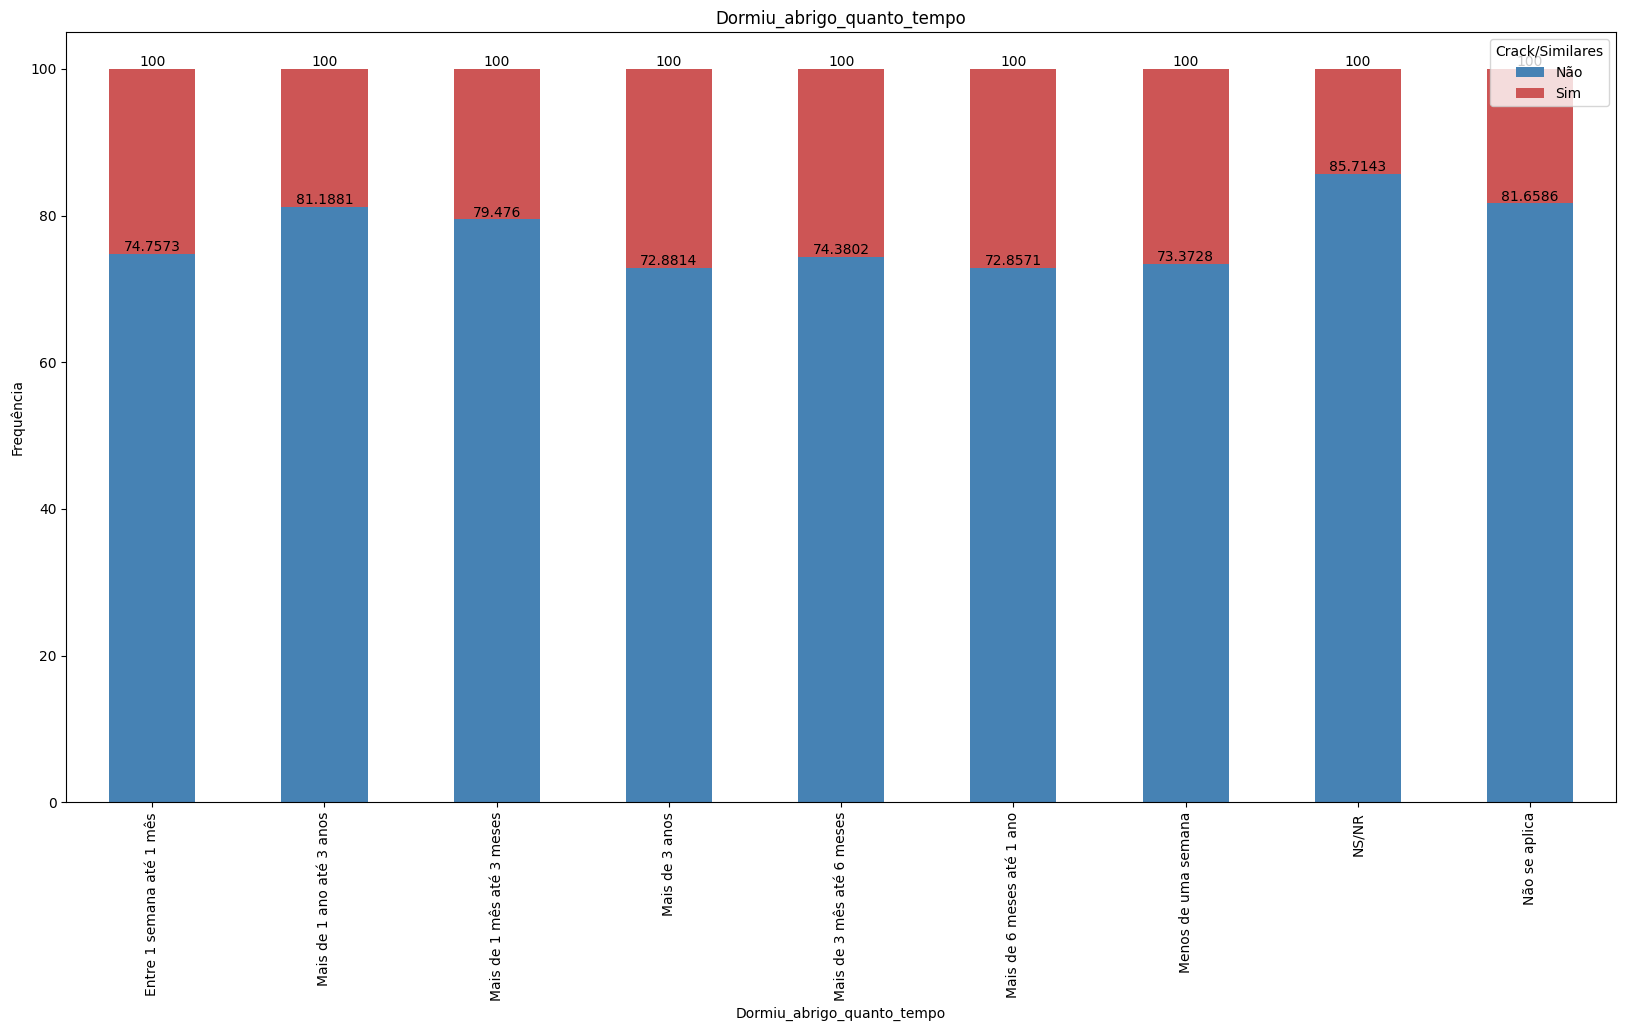

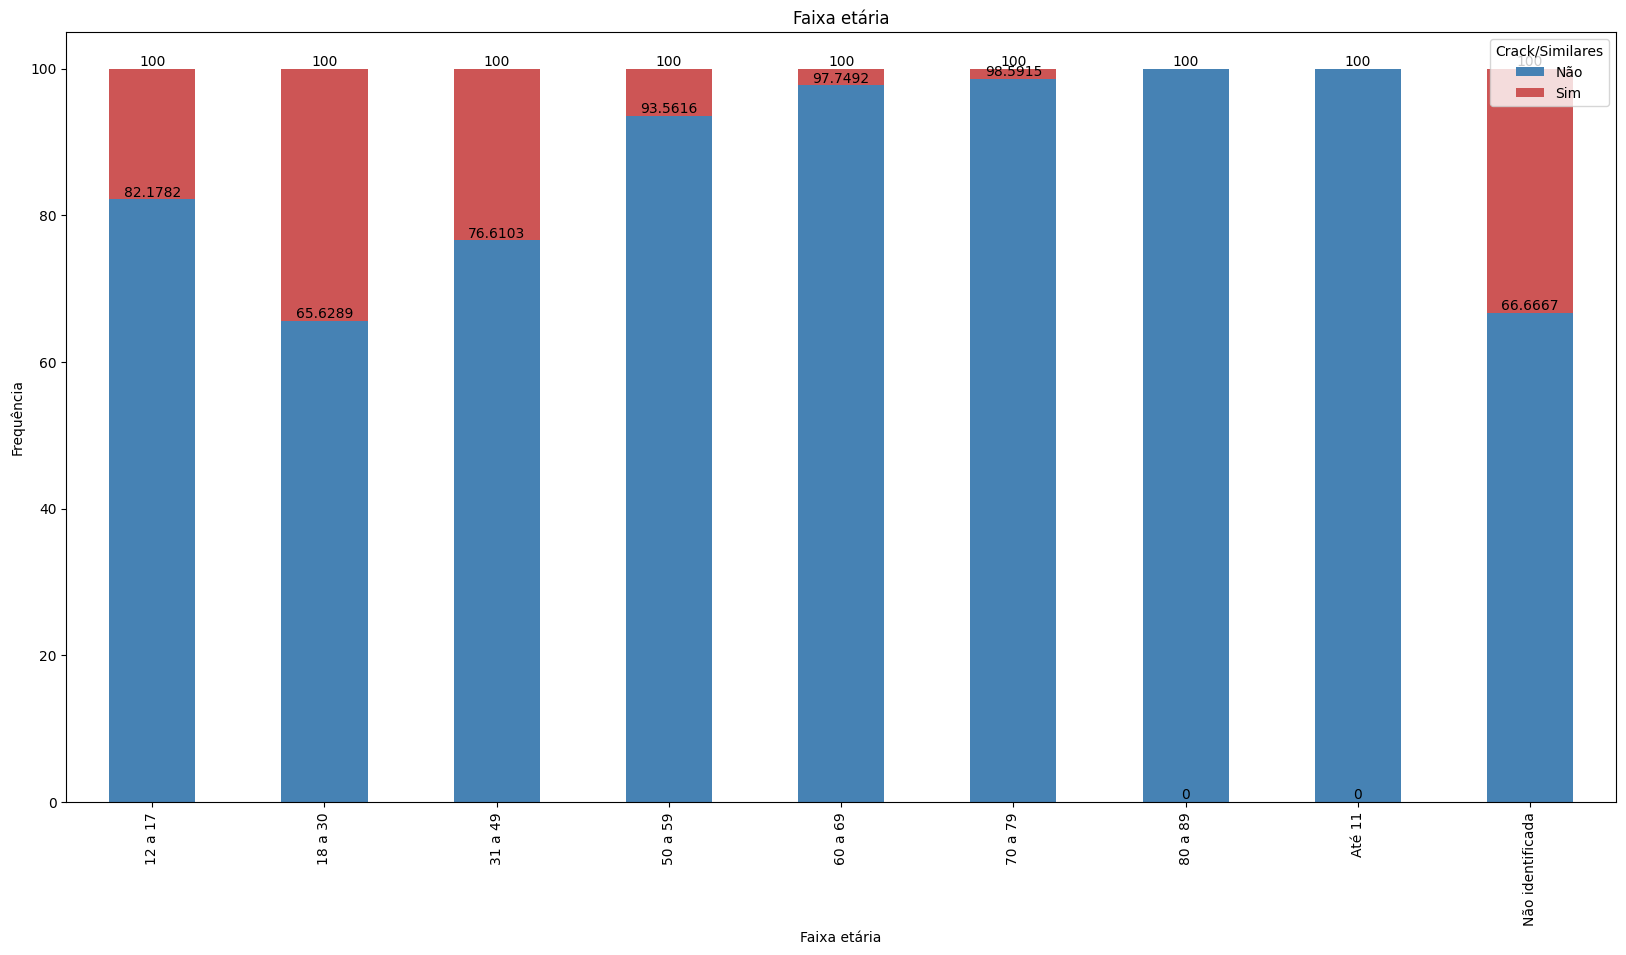

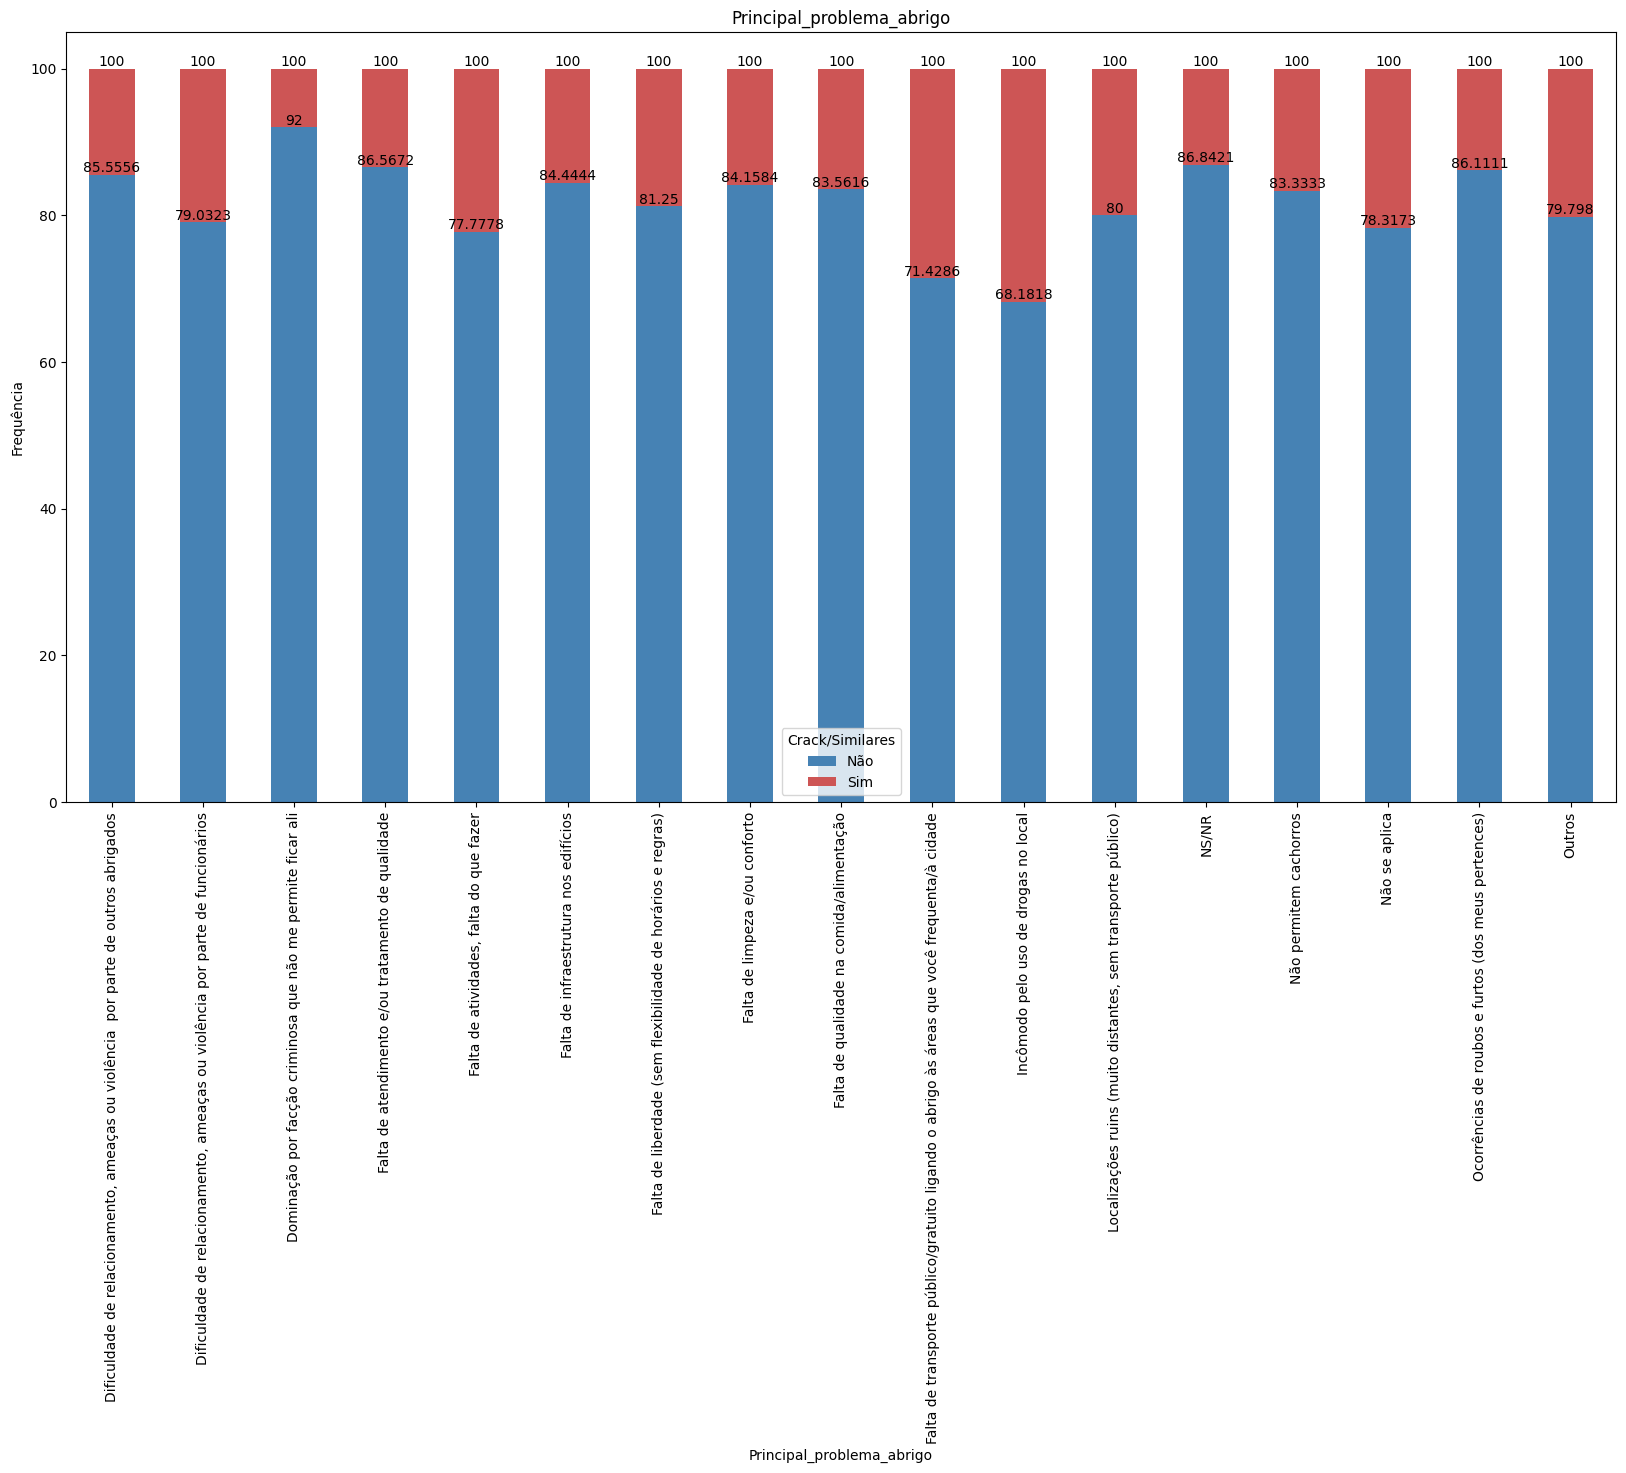

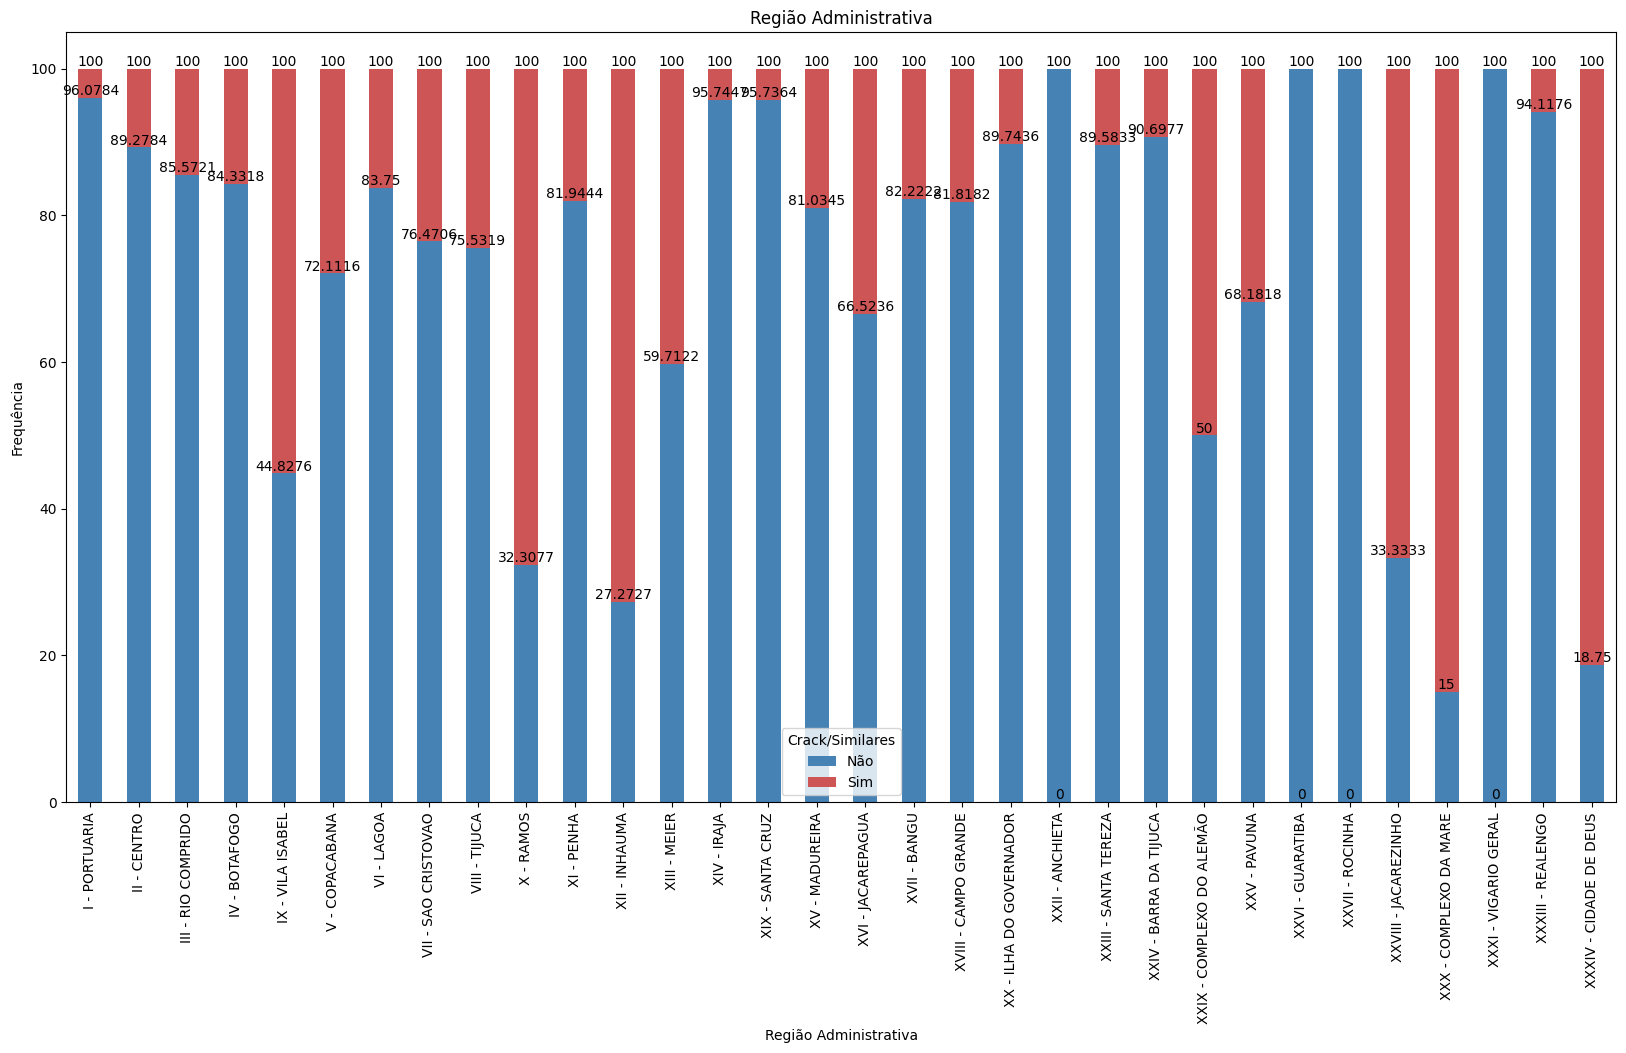

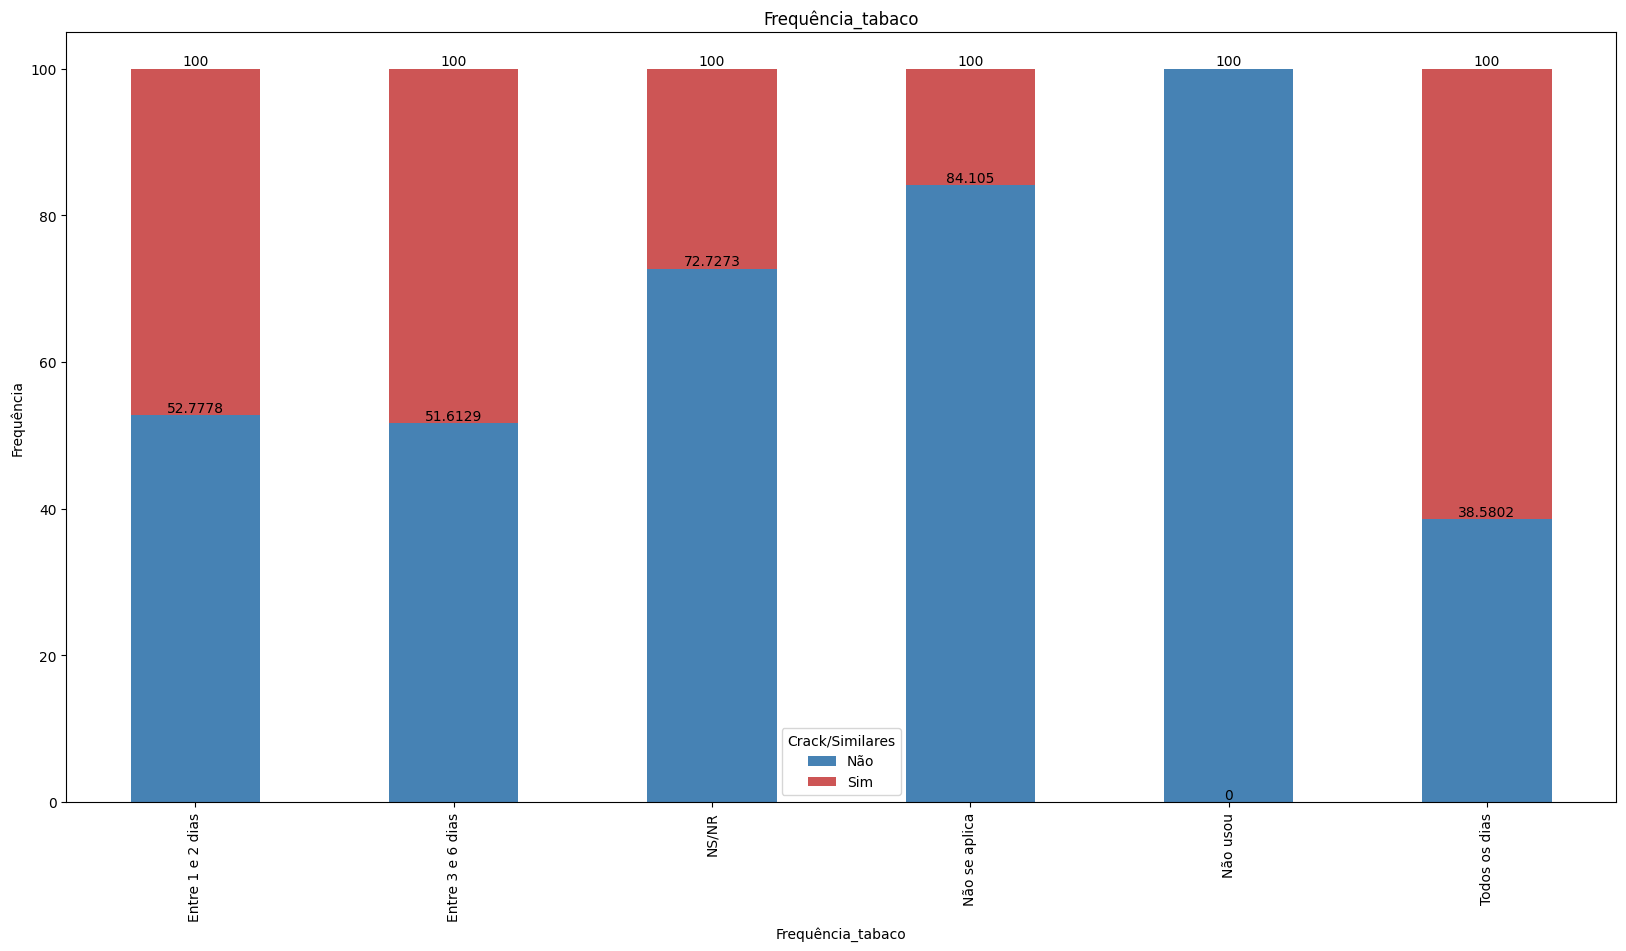

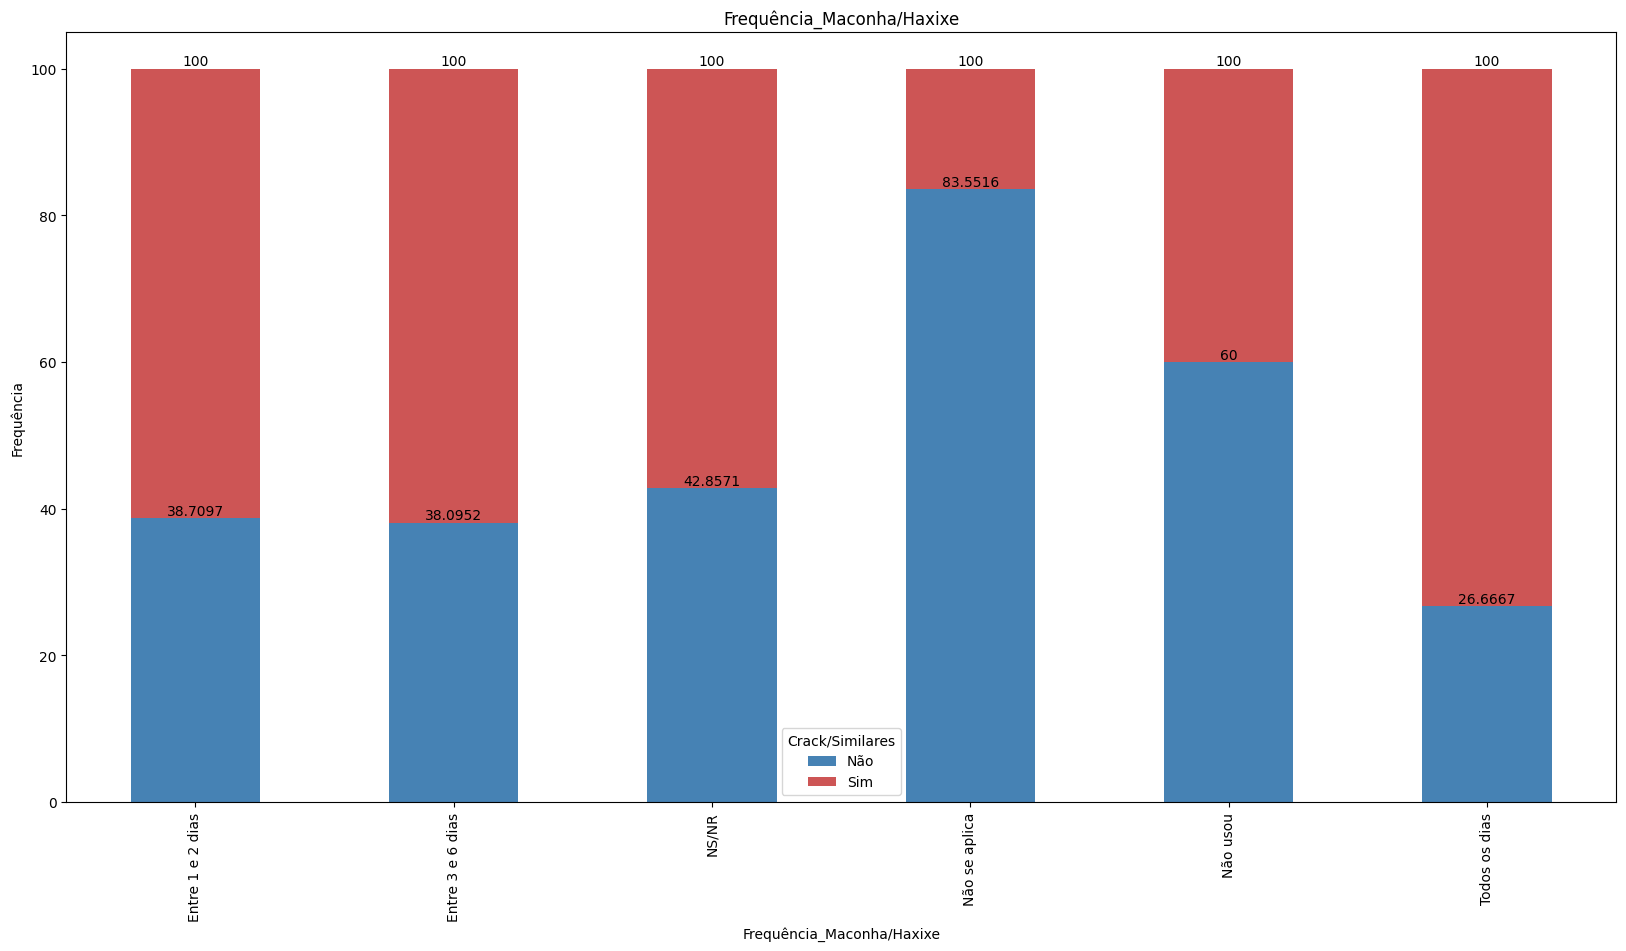

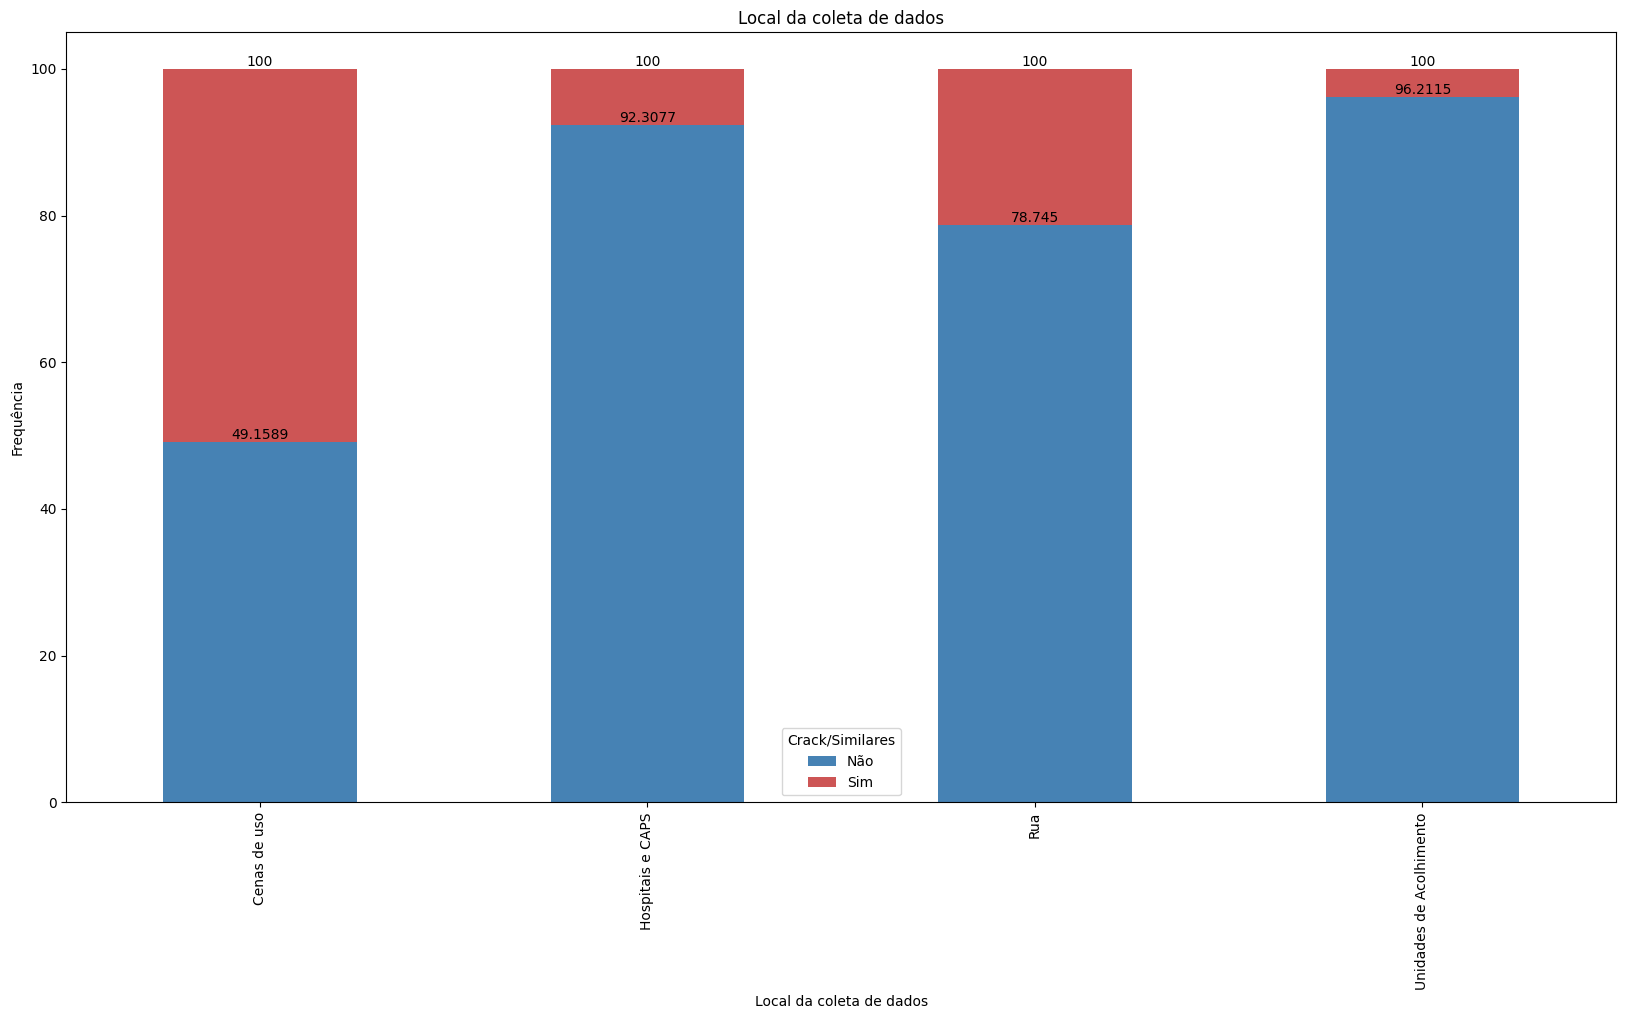

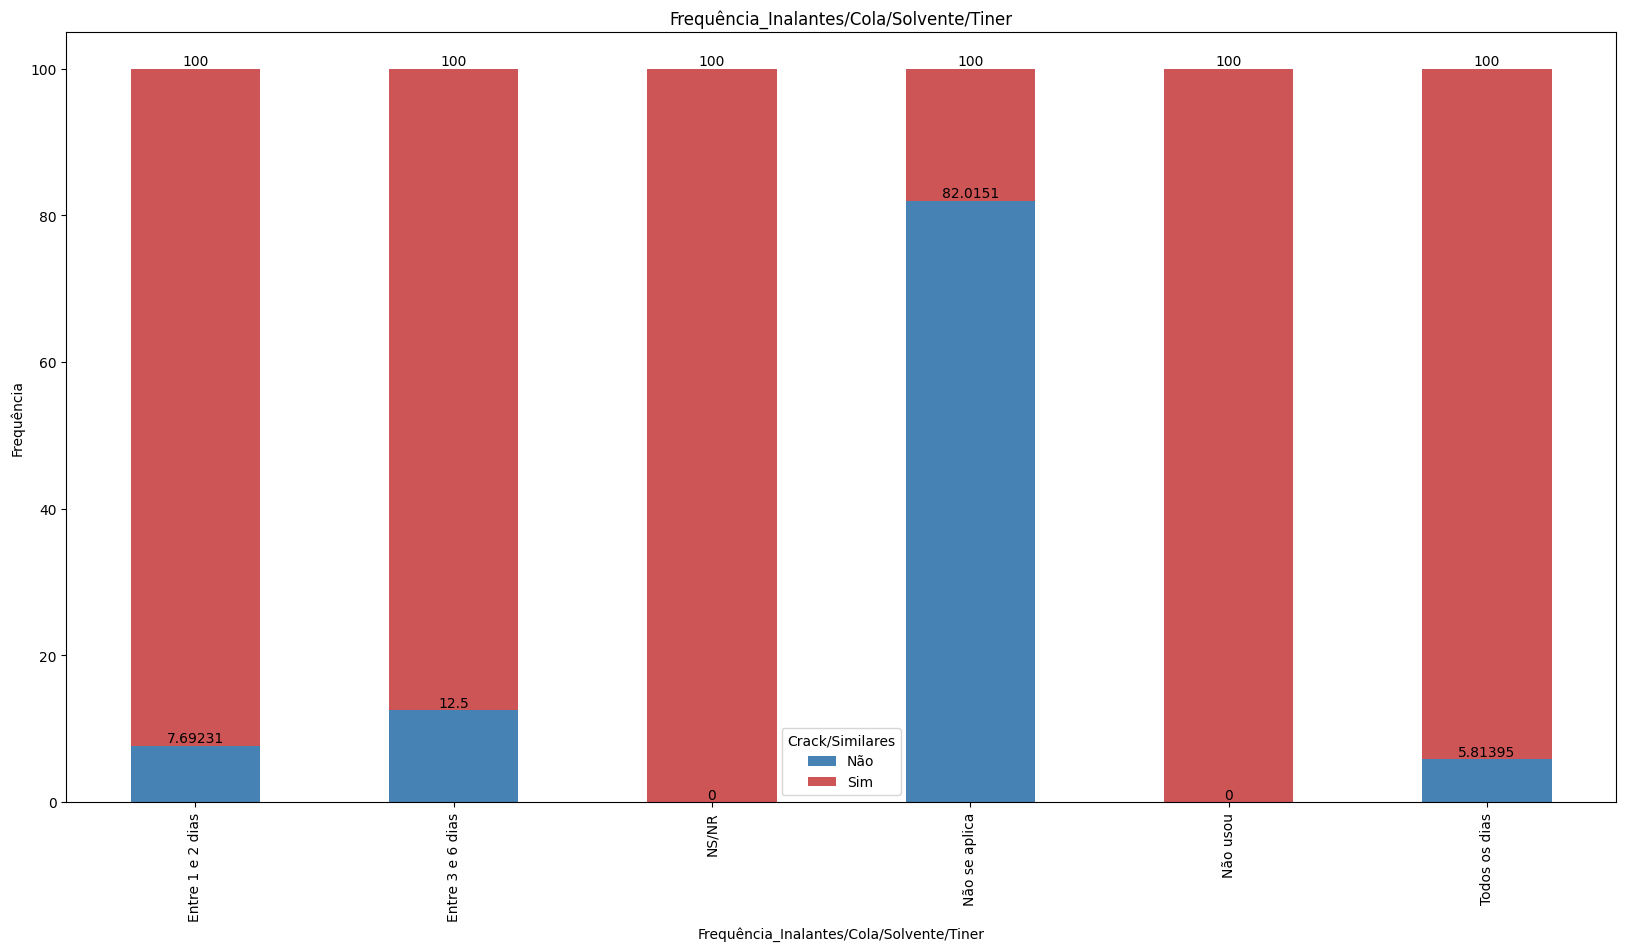

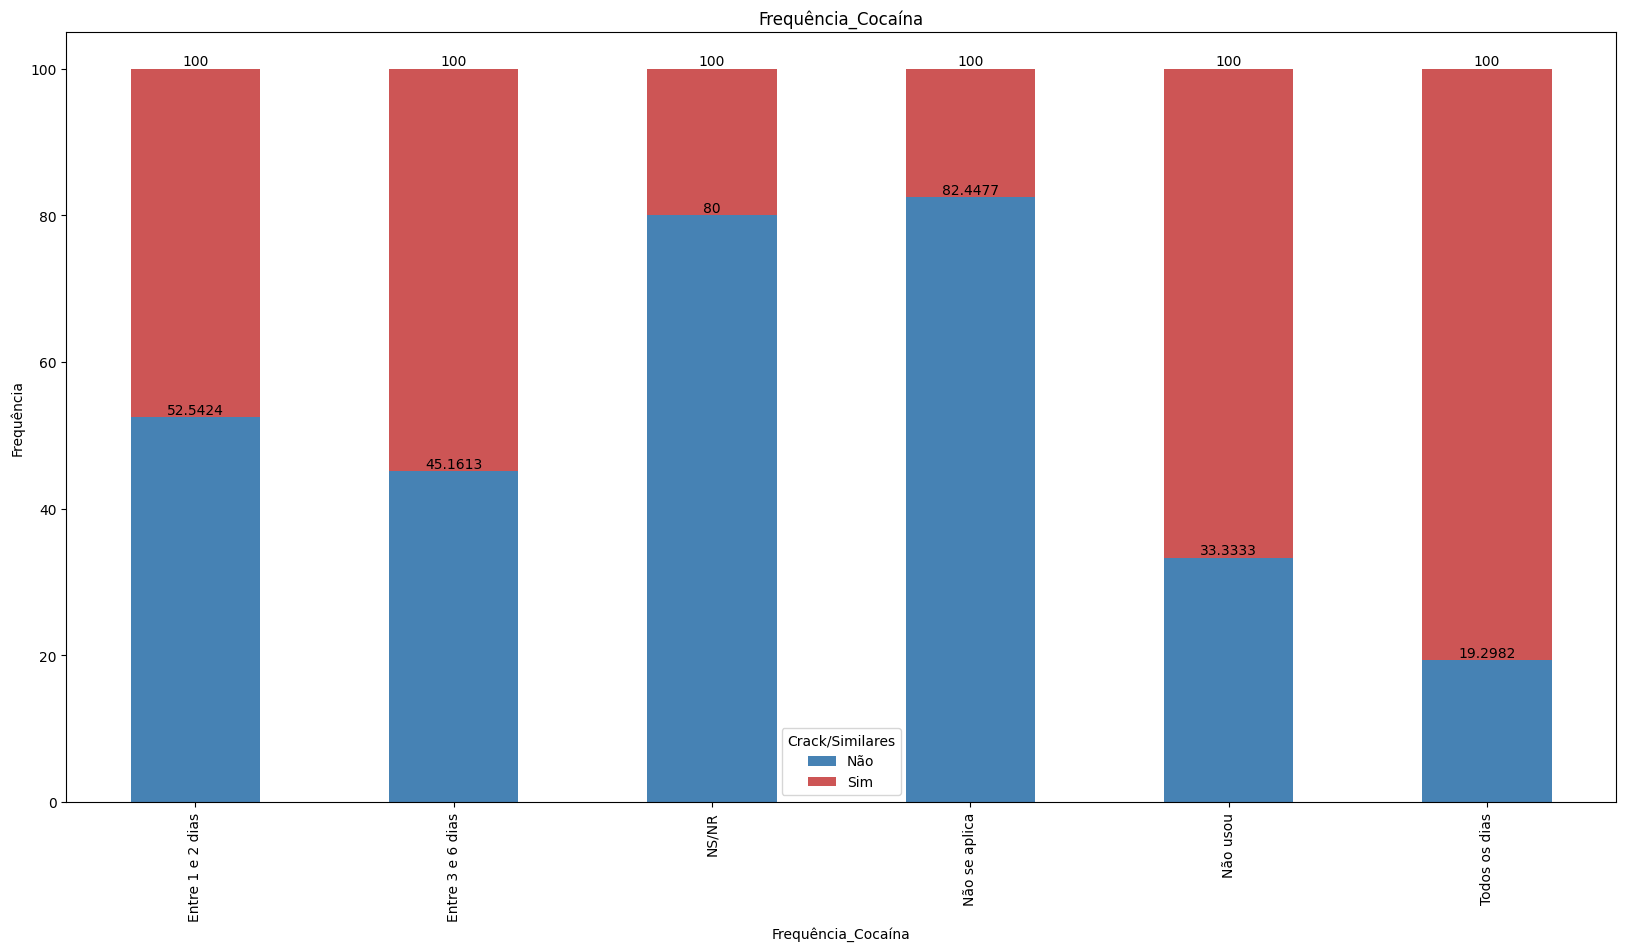

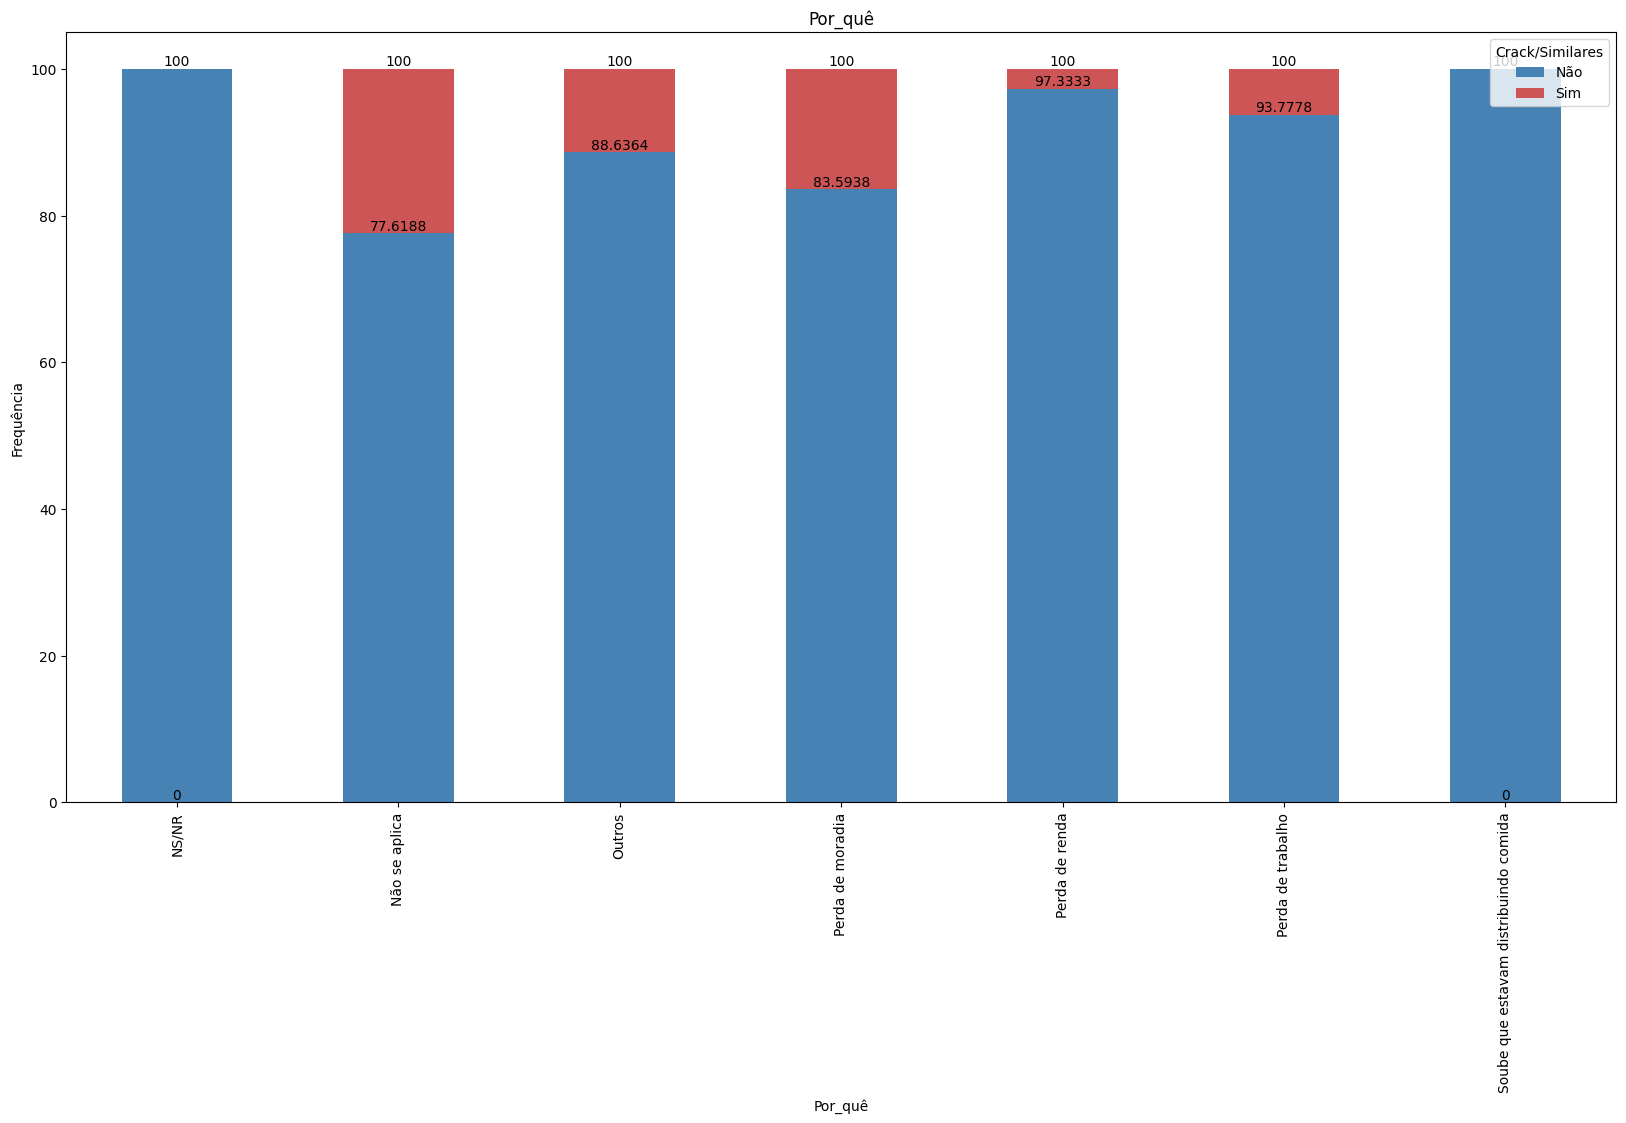

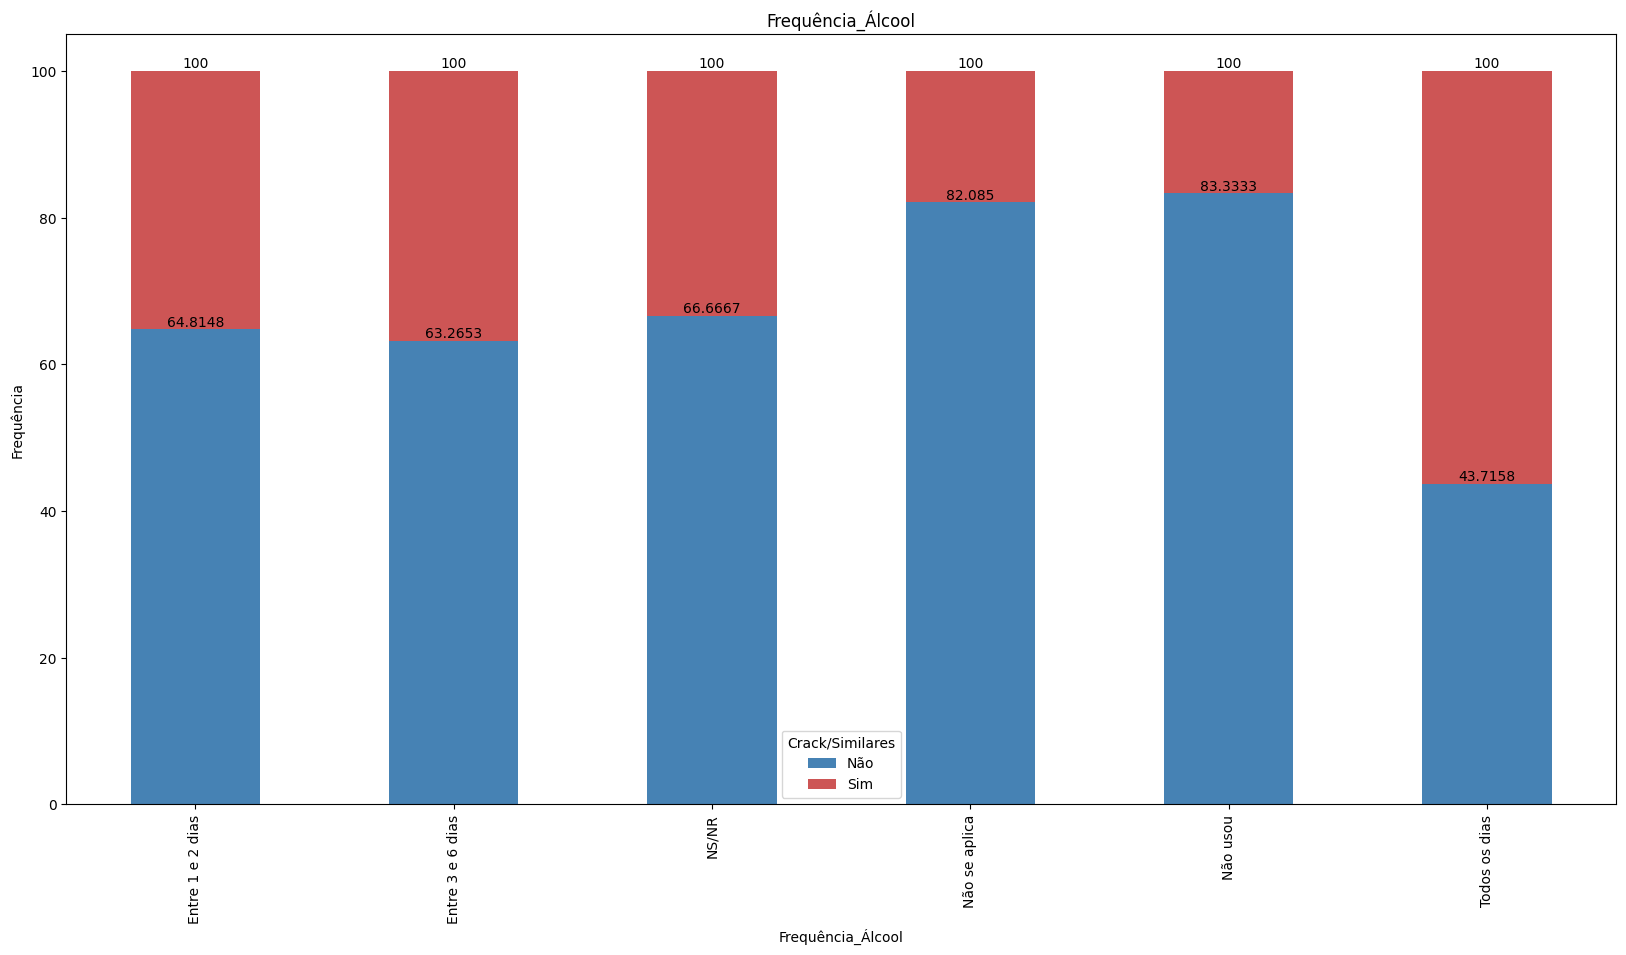

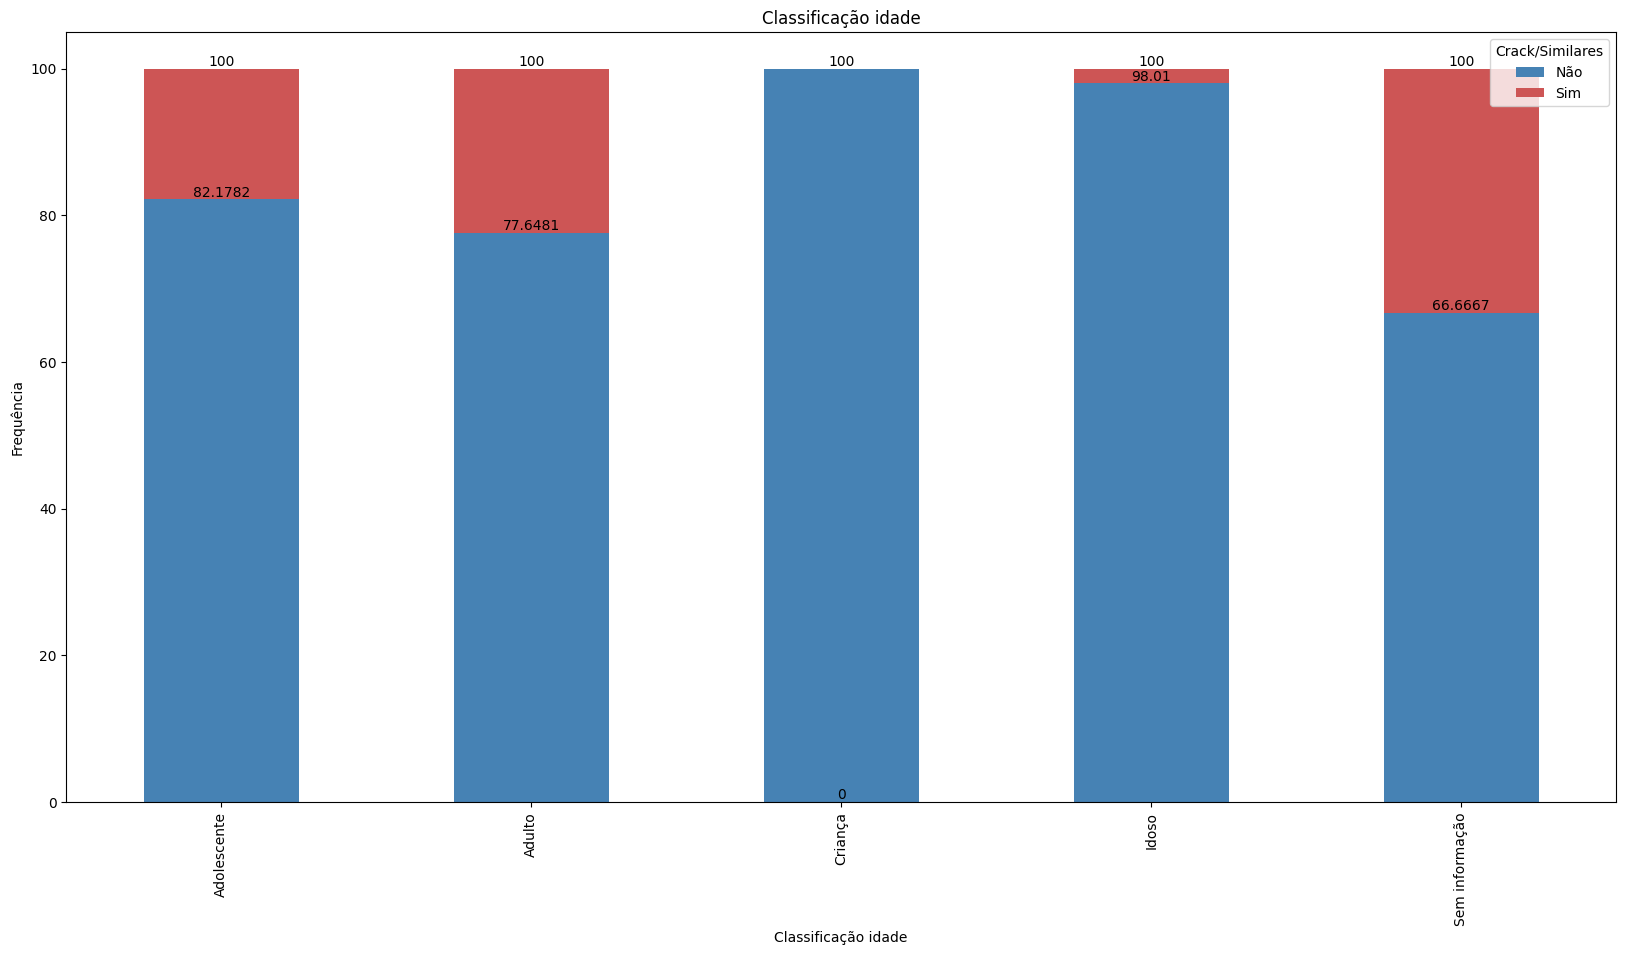

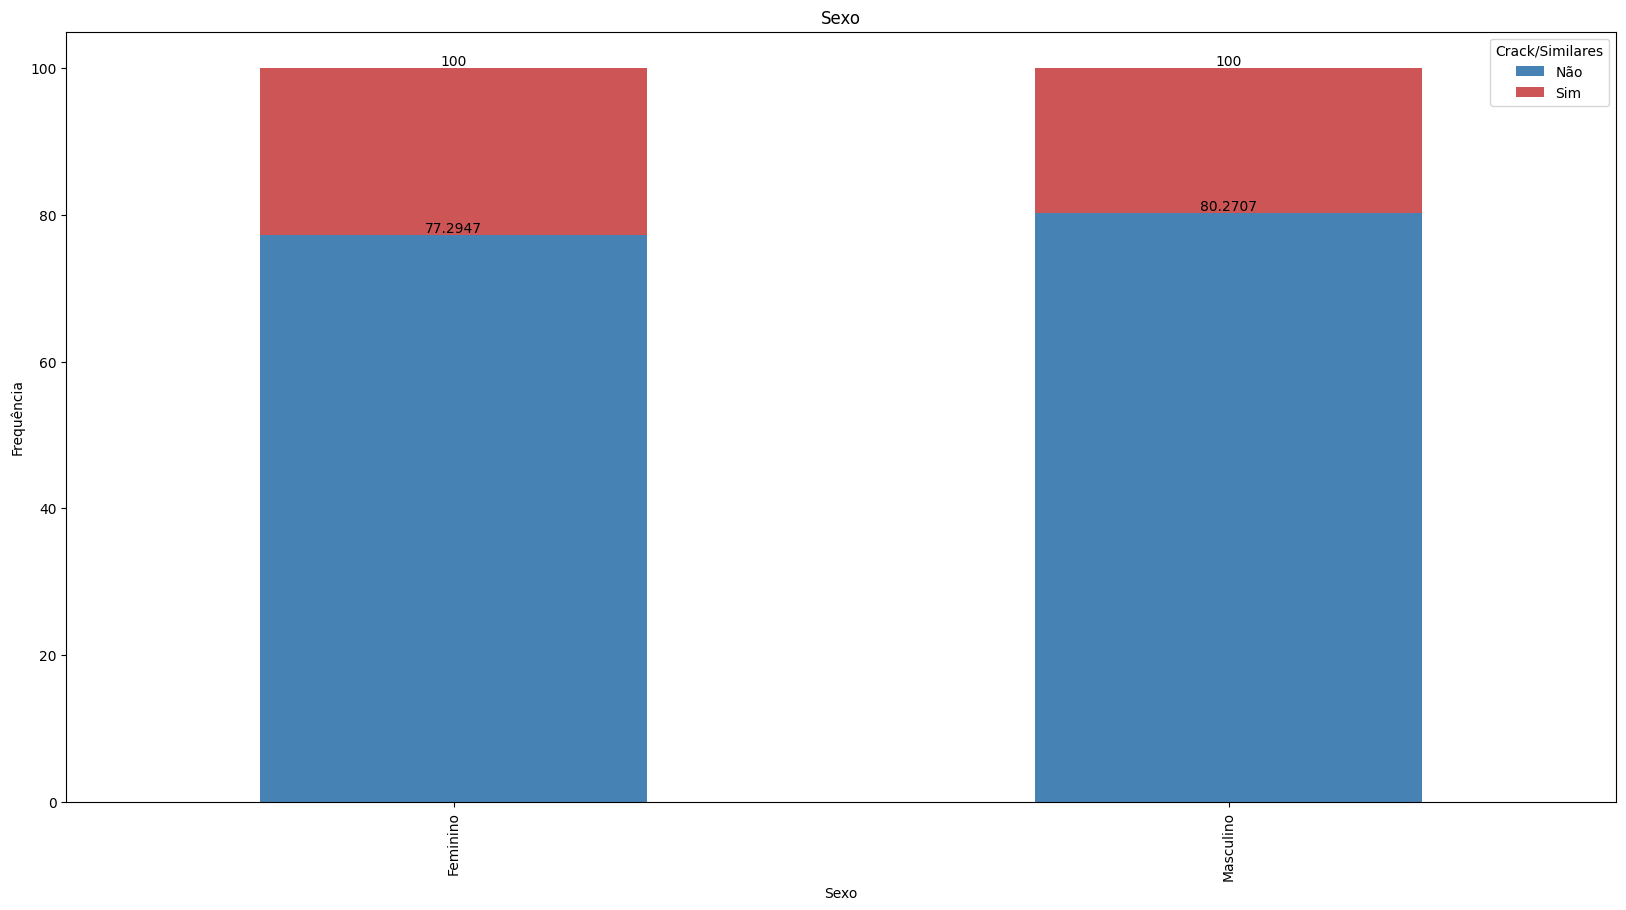

In [5]:
for col in df_treino.columns:
    if col not in ['Bairro', 'Unidade de Acolhimento/US', 'Município', 'Bairro_7_dias','Crack/Similares']:
        # Cria tabela de contingência
        ct = pd.crosstab(df_treino[col], df_treino['Crack/Similares'])
        # Converte para frequência
        ct = ct.apply(lambda x: x/x.sum()*100, axis=1)
        # Plota gráfico de barras
        fig, ax = plt.subplots(figsize=(20,10))
        cores = ['#4682B4', '#CD5555']
        ct.plot(kind='bar', stacked=True, ax=ax, color=cores)
        # Adiciona rótulos com as frequências
        for i in ax.containers:
            ax.bar_label(i, label_type='edge', fontsize=10)
        # Configurações do gráfico
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show()

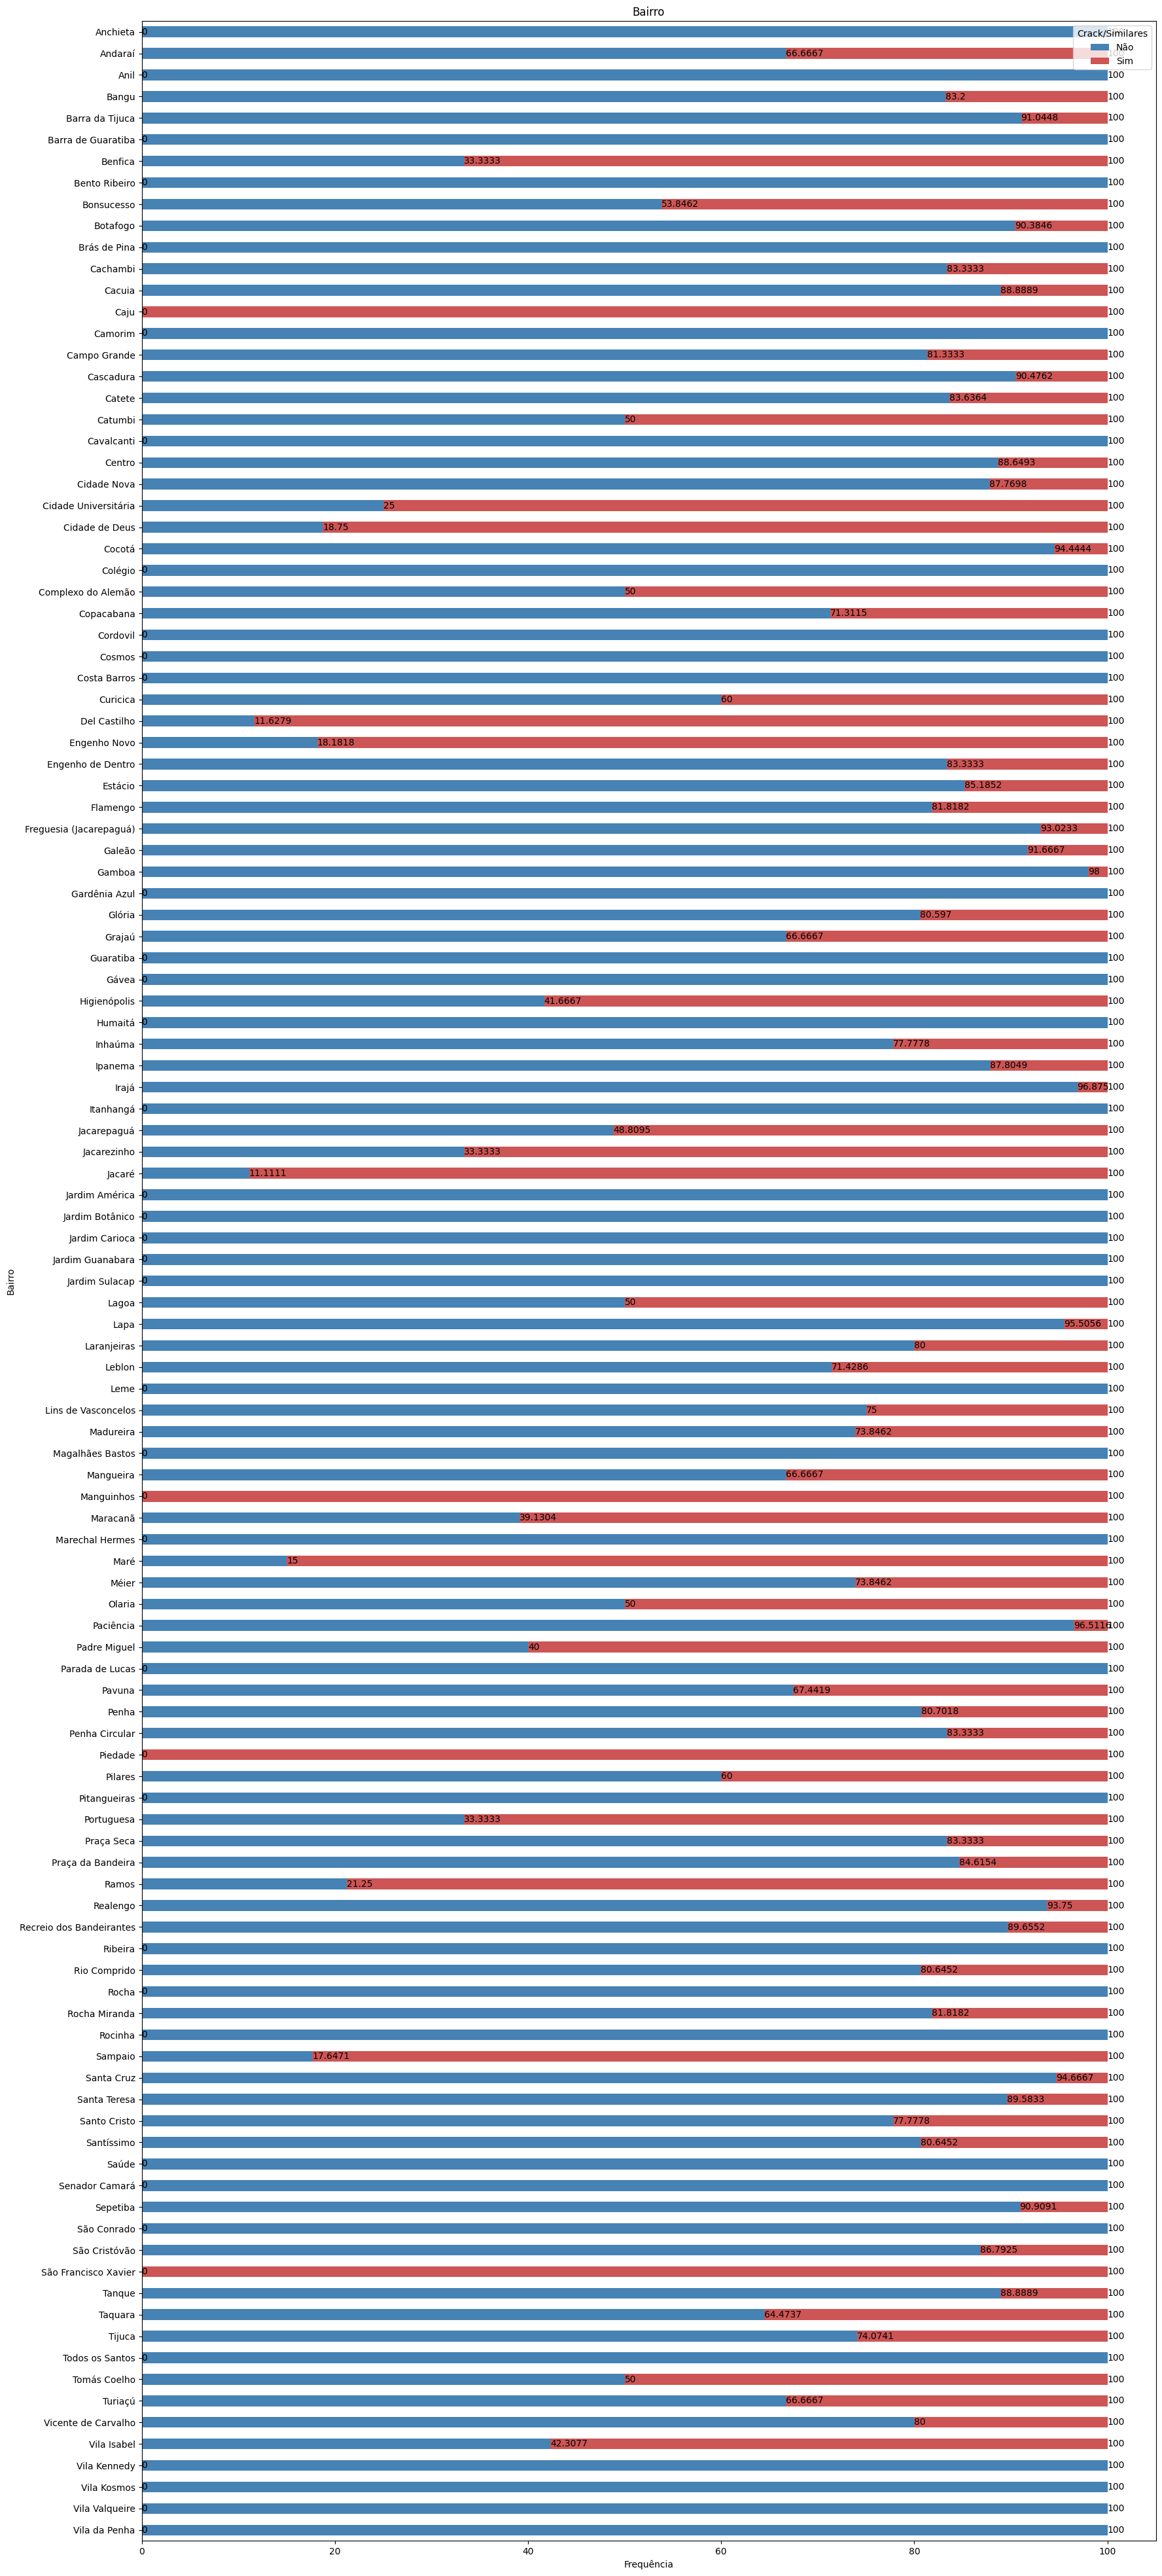

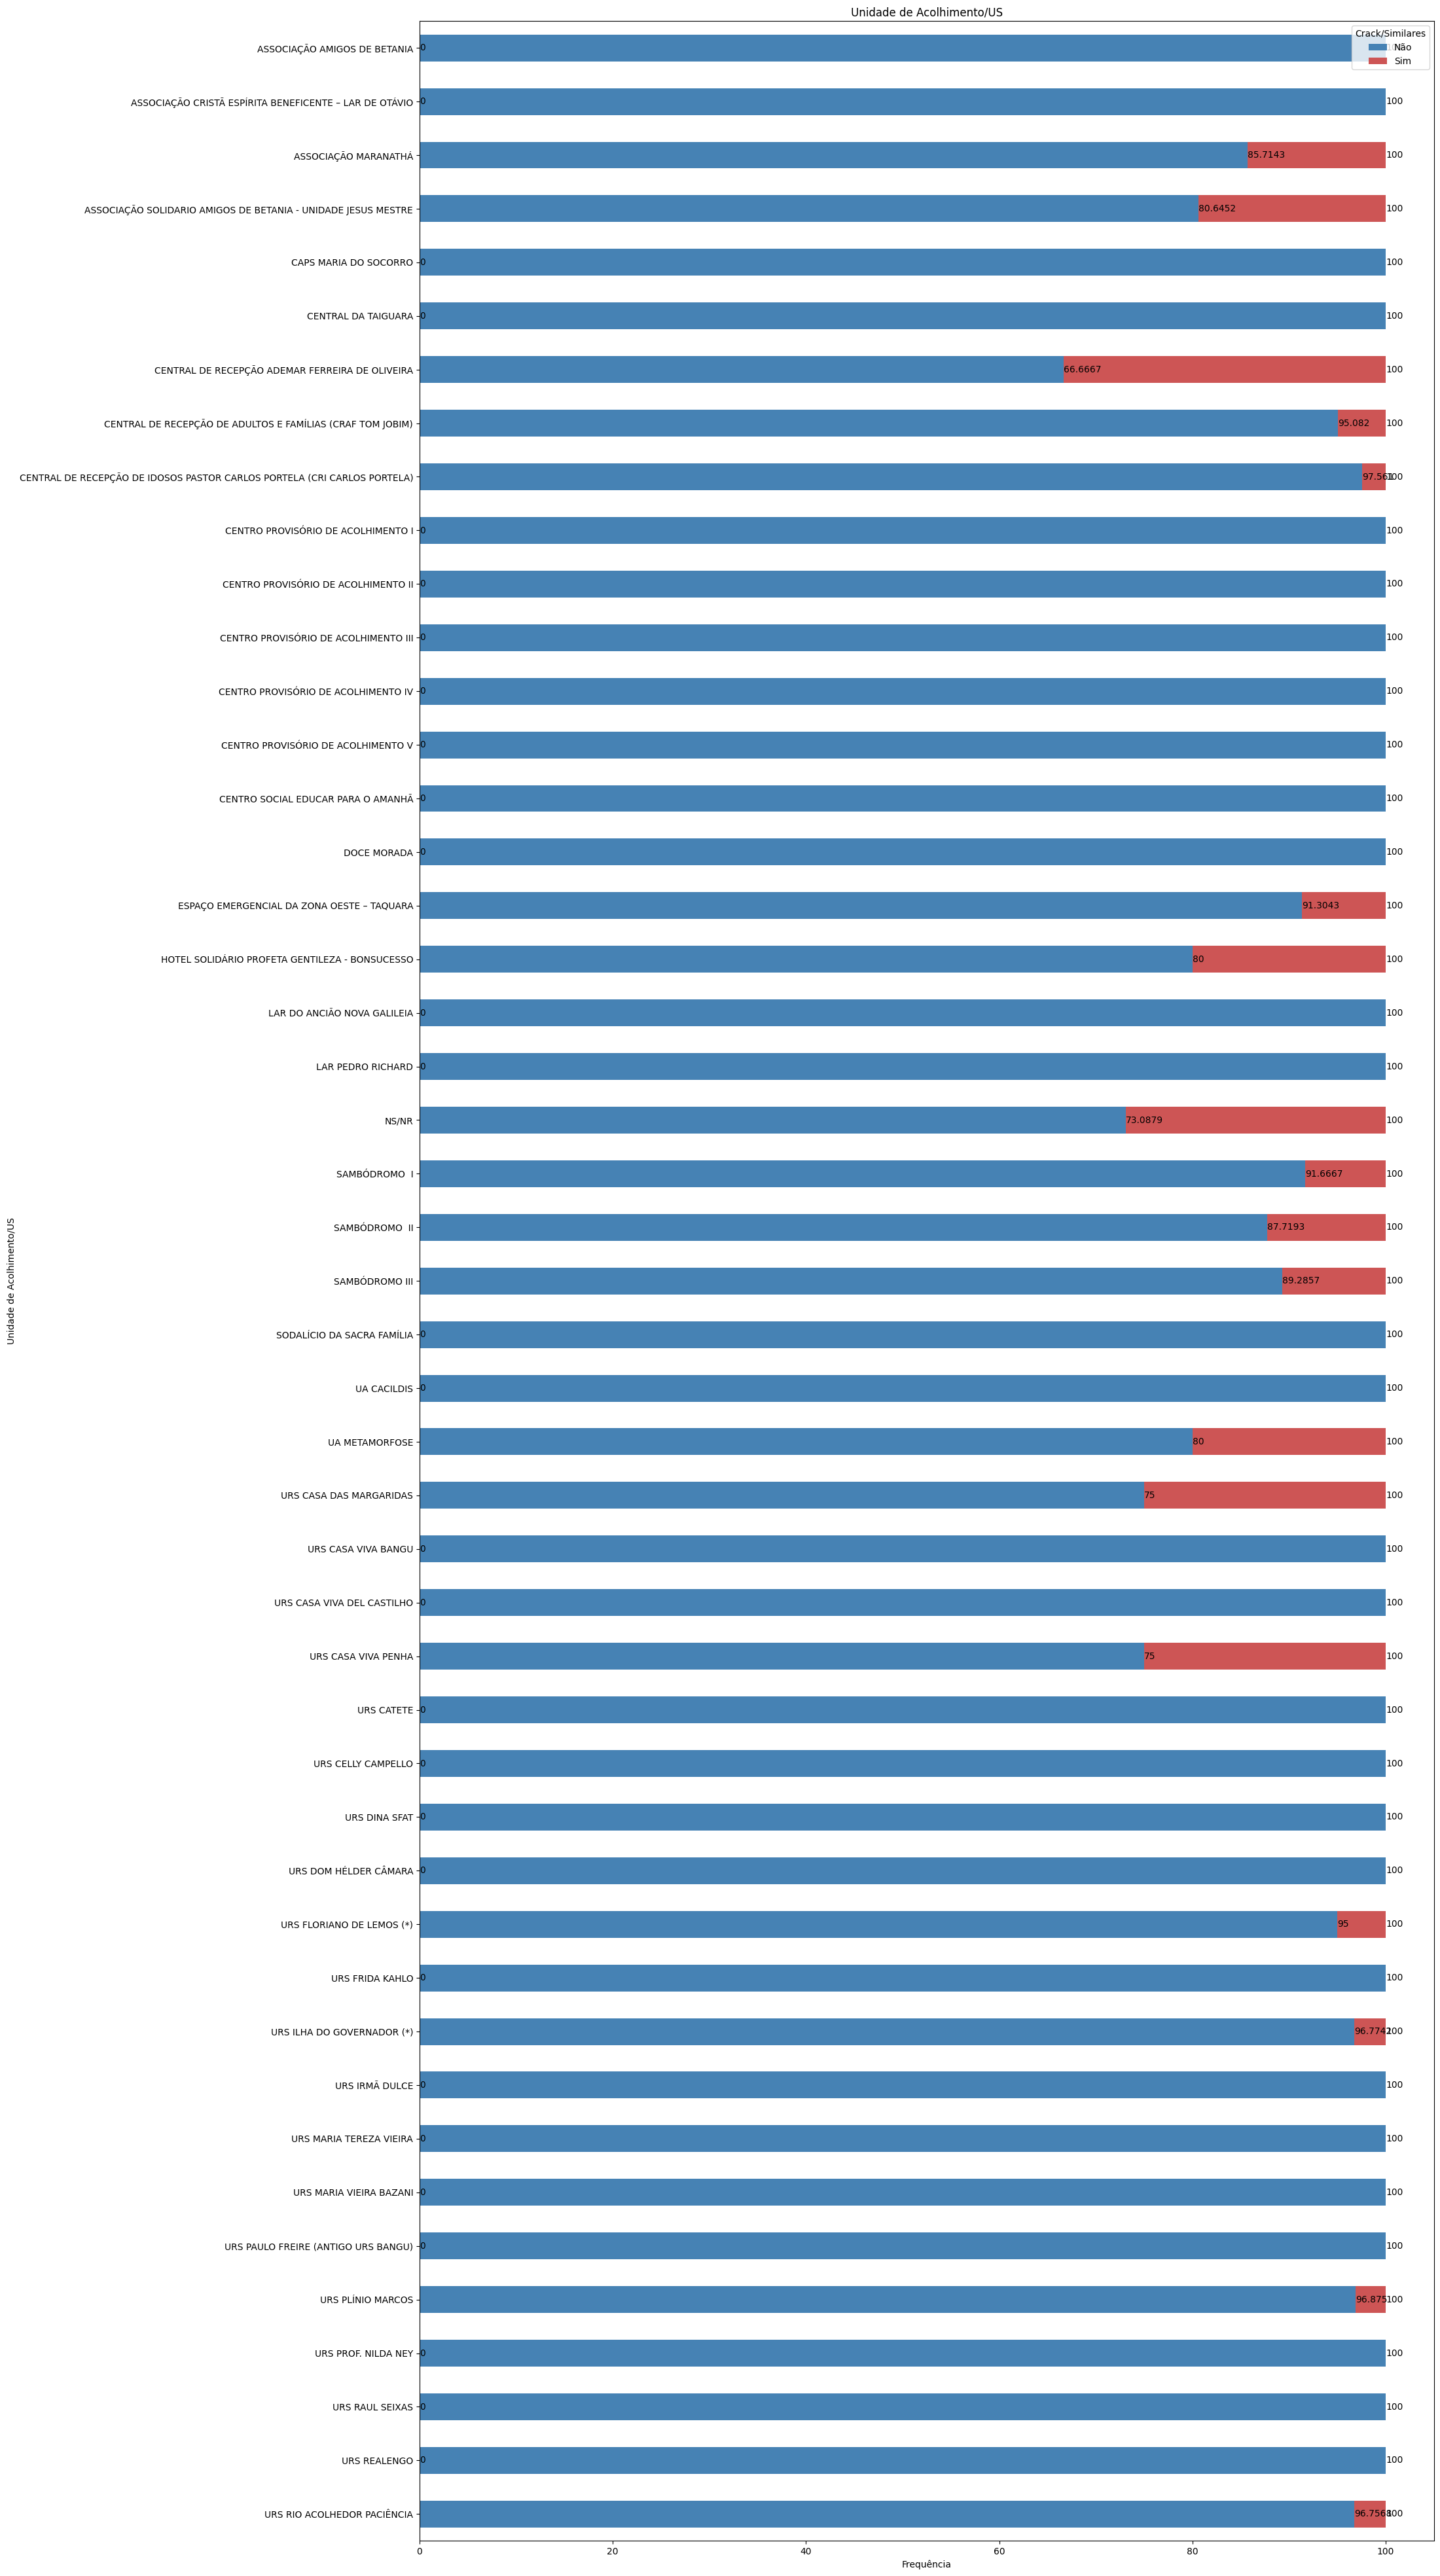

In [6]:
# Itera sobre as colunas categóricas
for col in df_treino.columns:
    if col in ['Bairro', 'Unidade de Acolhimento/US', 'Município', 'Bairro_7_dias']:
        # Cria tabela de contingência
        ct = pd.crosstab(df_treino[col], df_treino['Crack/Similares'])
        # Converte para frequência
        ct = ct.apply(lambda x: x/x.sum()*100, axis=1)
        # Reordena as linhas em ordem inversa
        ct = ct.iloc[::-1]
        # Plota gráfico de barras
        fig, ax = plt.subplots(figsize=(20,50))
        cores = ['#4682B4', '#CD5555']
        ct.plot(kind='barh', stacked=True, ax=ax, color=cores)
        # Adiciona rótulos com as frequências
        for i in ax.containers:
            ax.bar_label(i, label_type='edge', fontsize=10)
        # Configurações do gráfico
        ax.set_title(col)
        ax.set_xlabel('Frequência')
        ax.set_ylabel(col)
        plt.show()


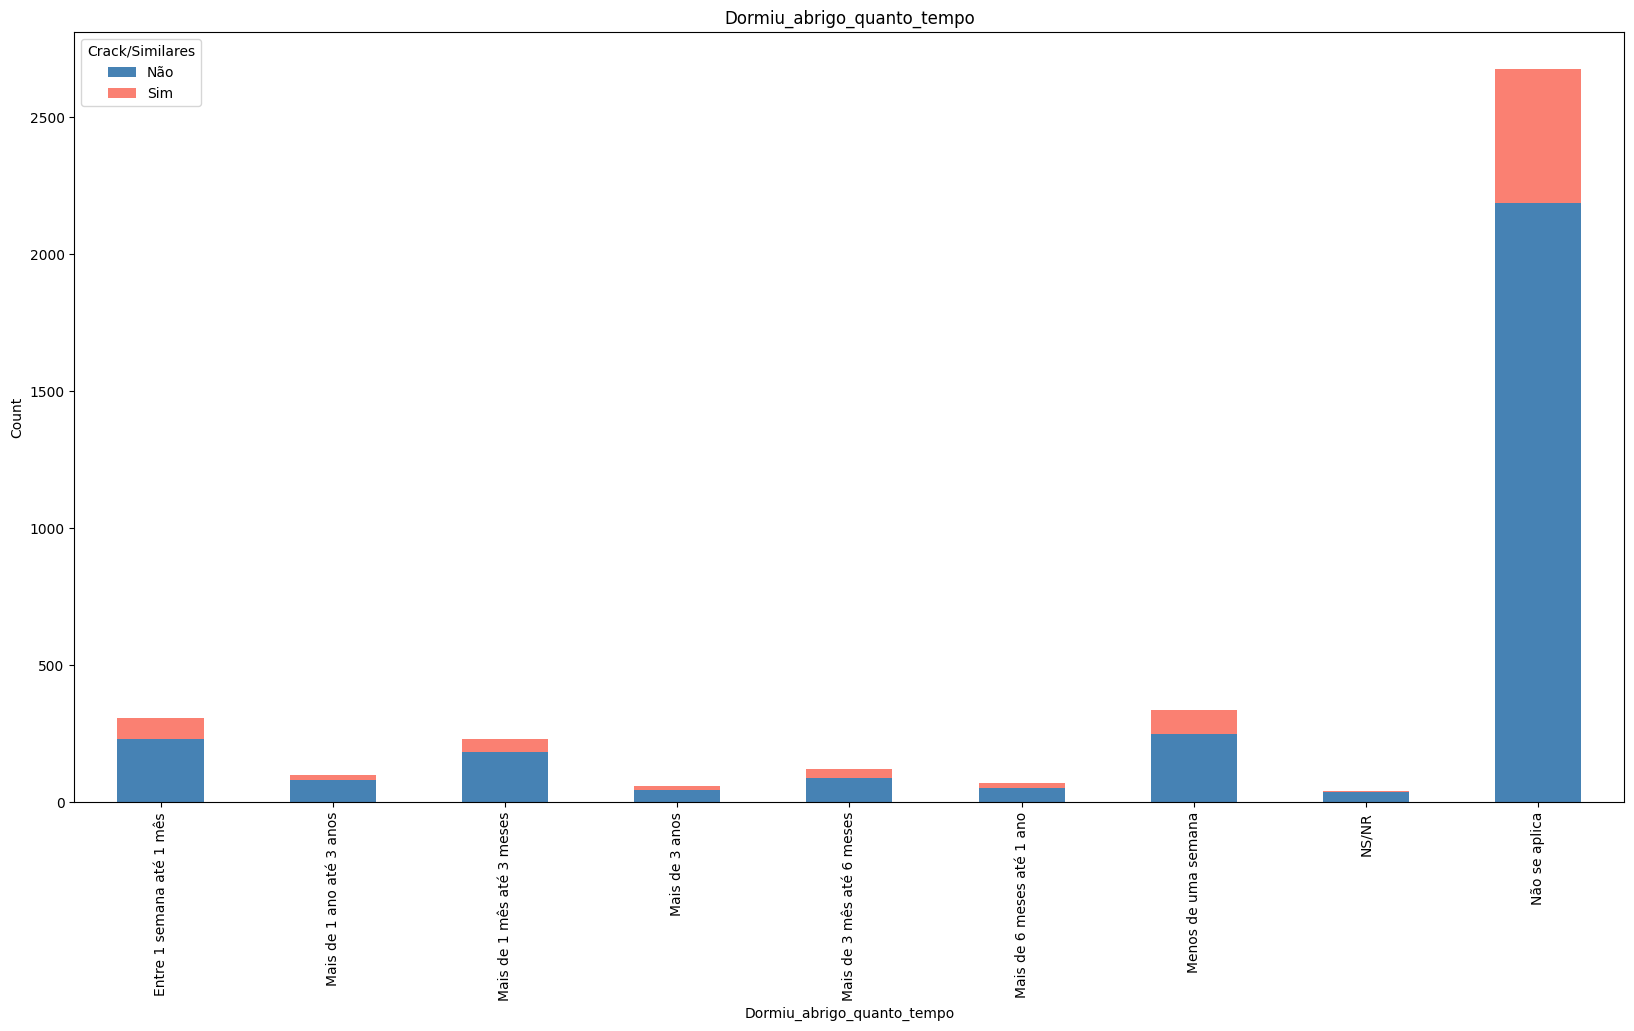

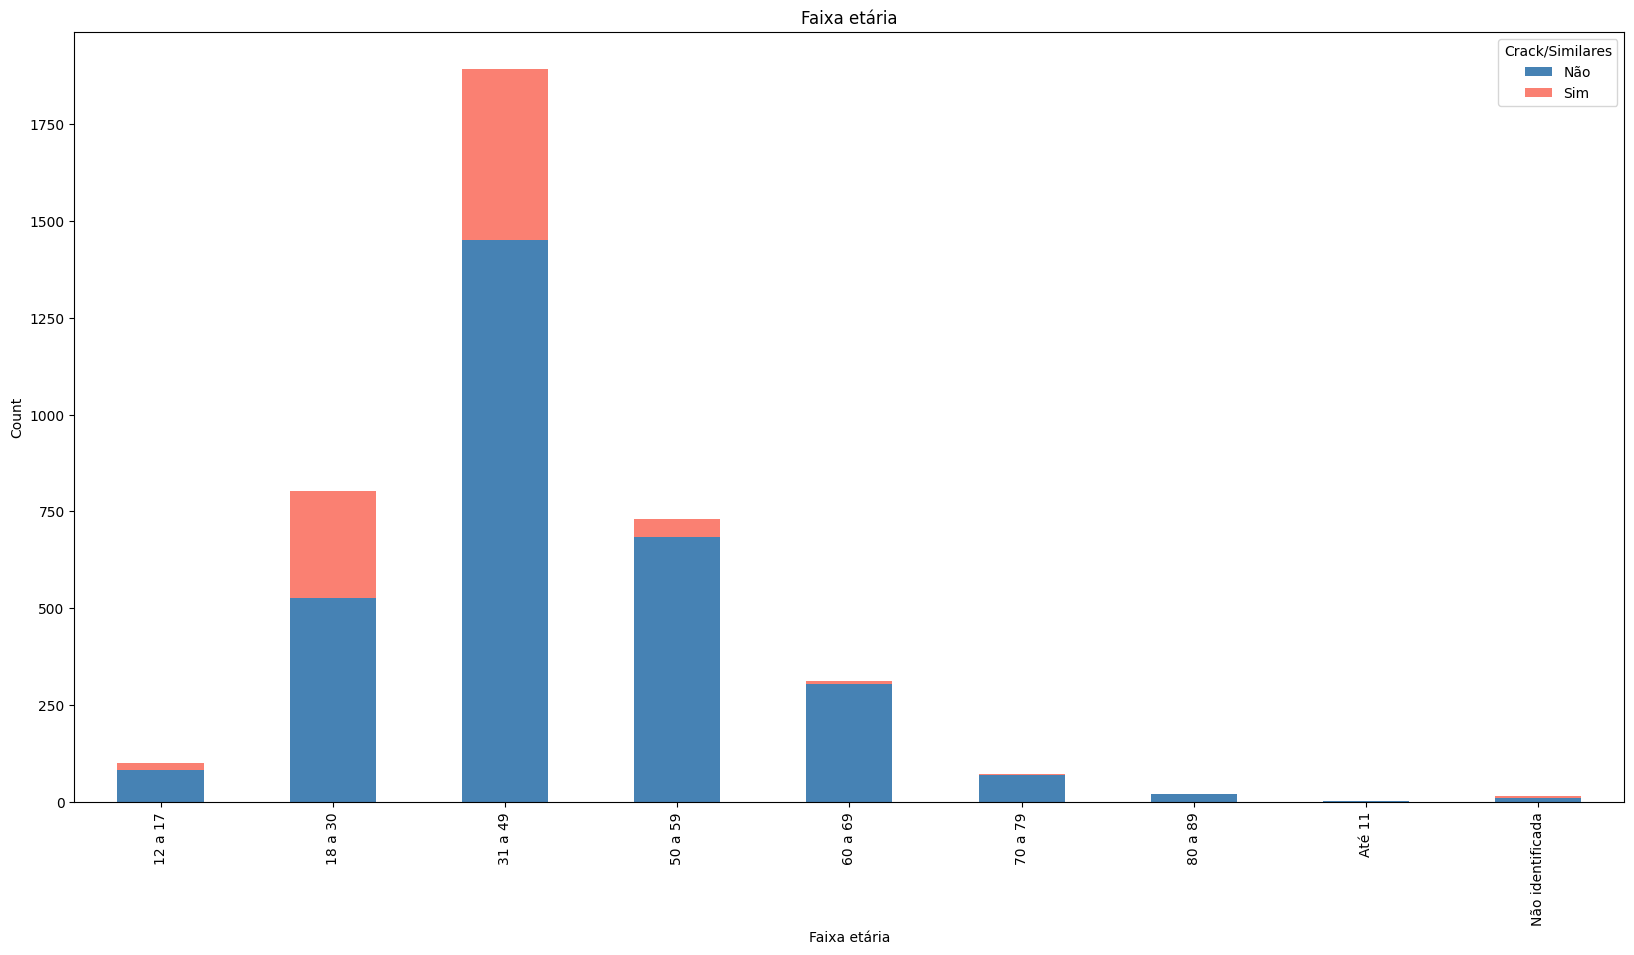

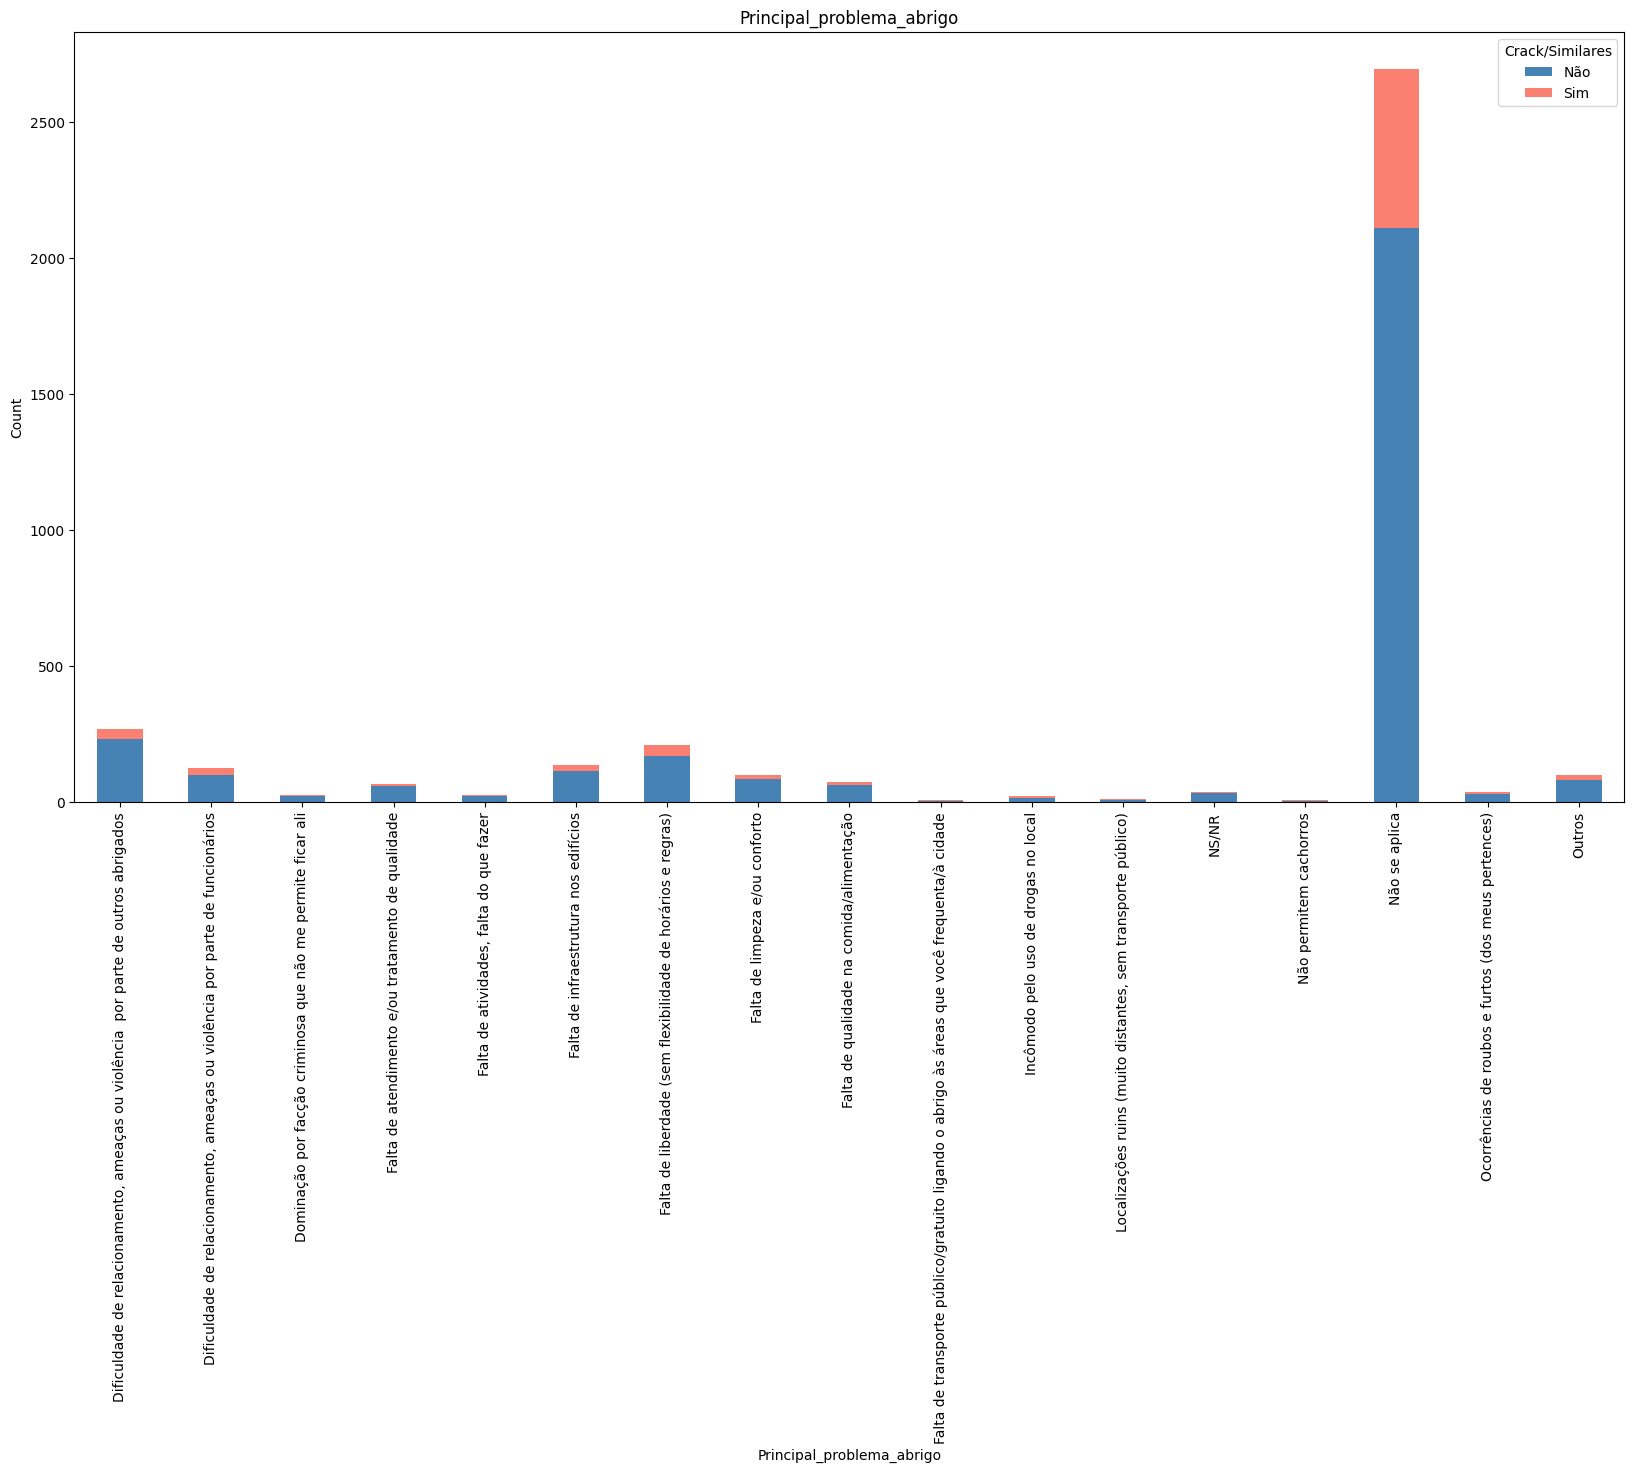

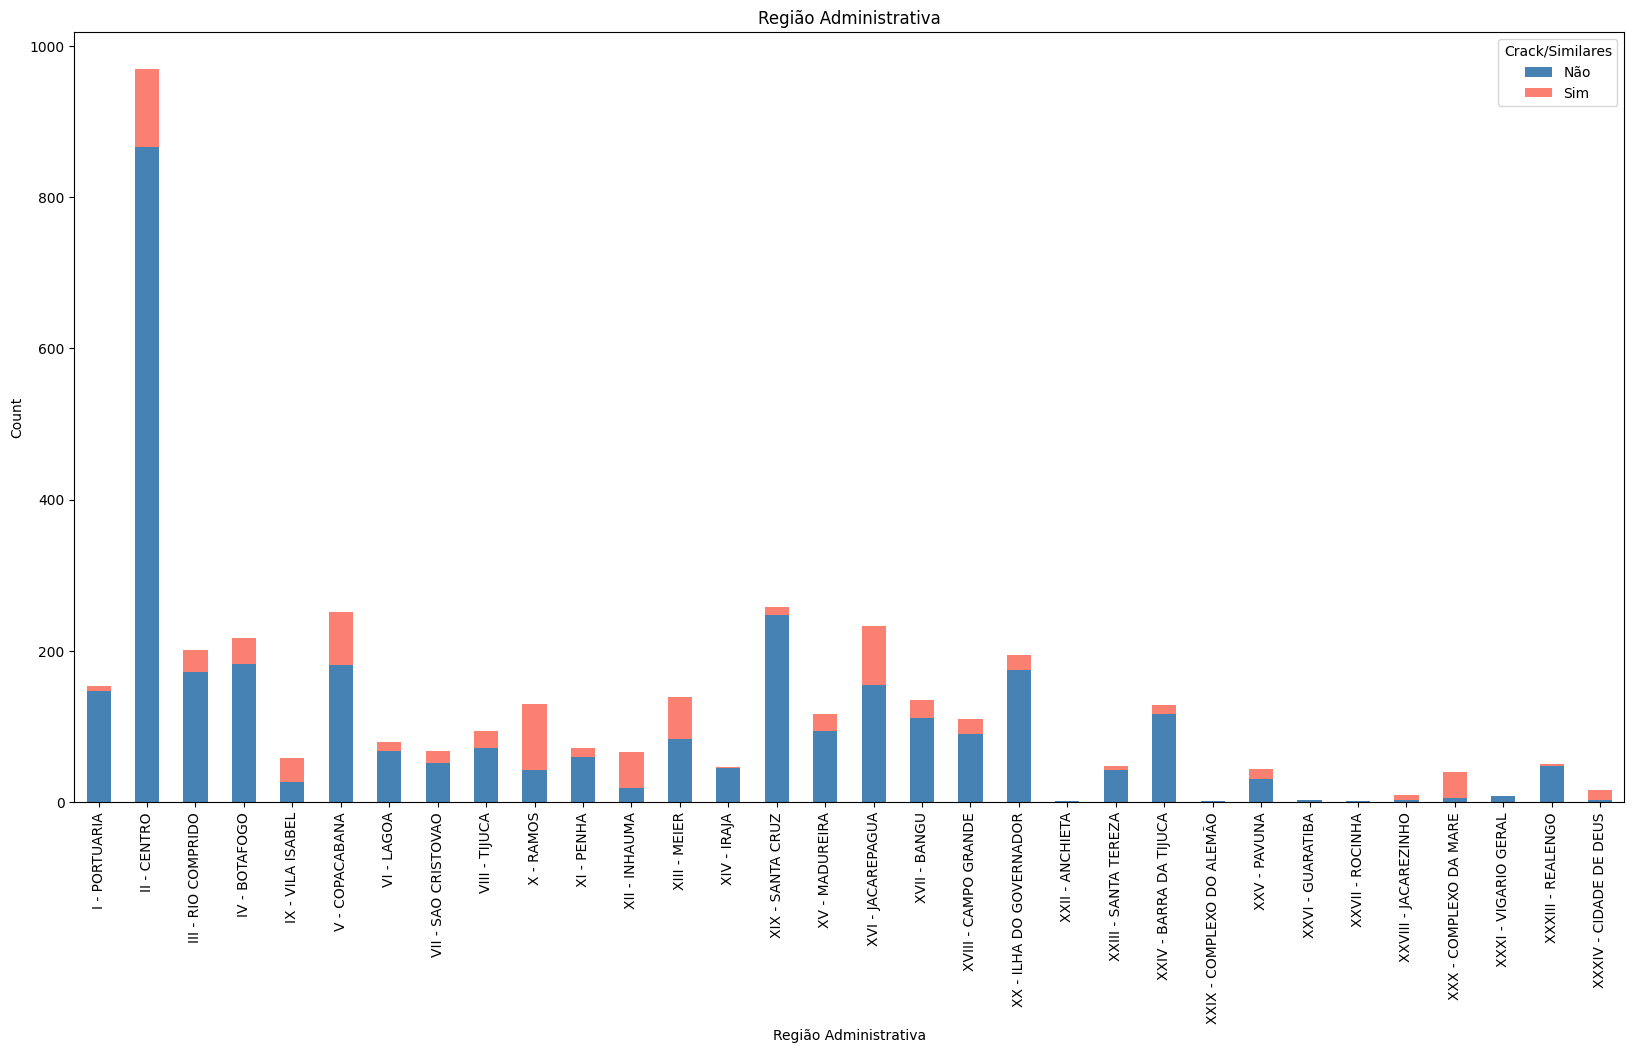

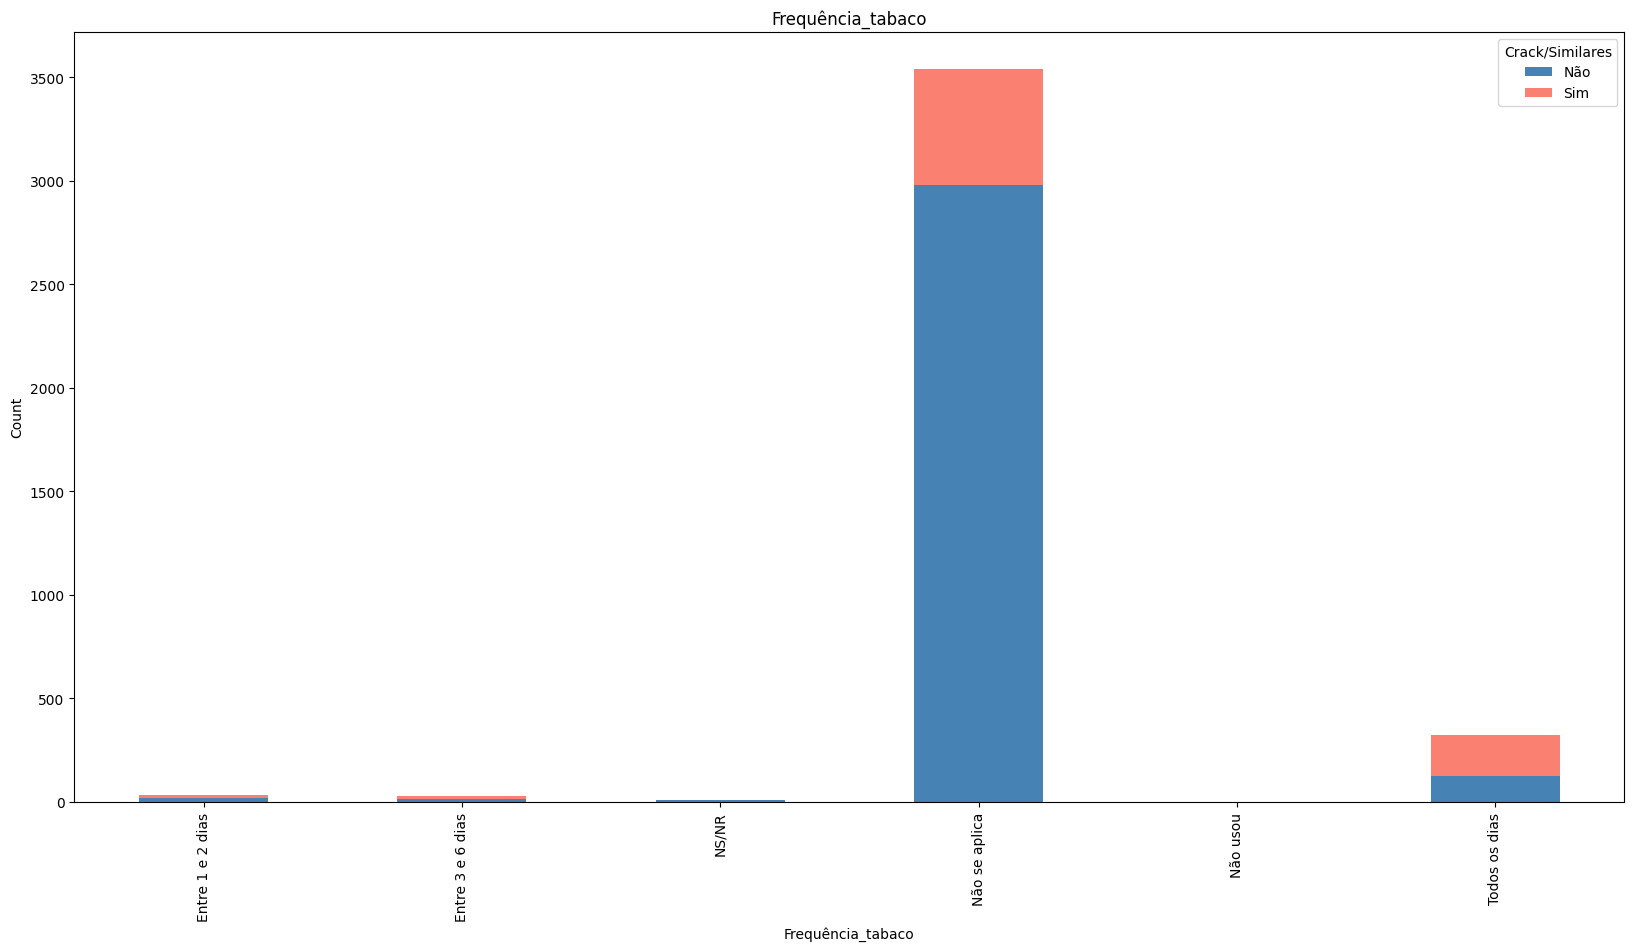

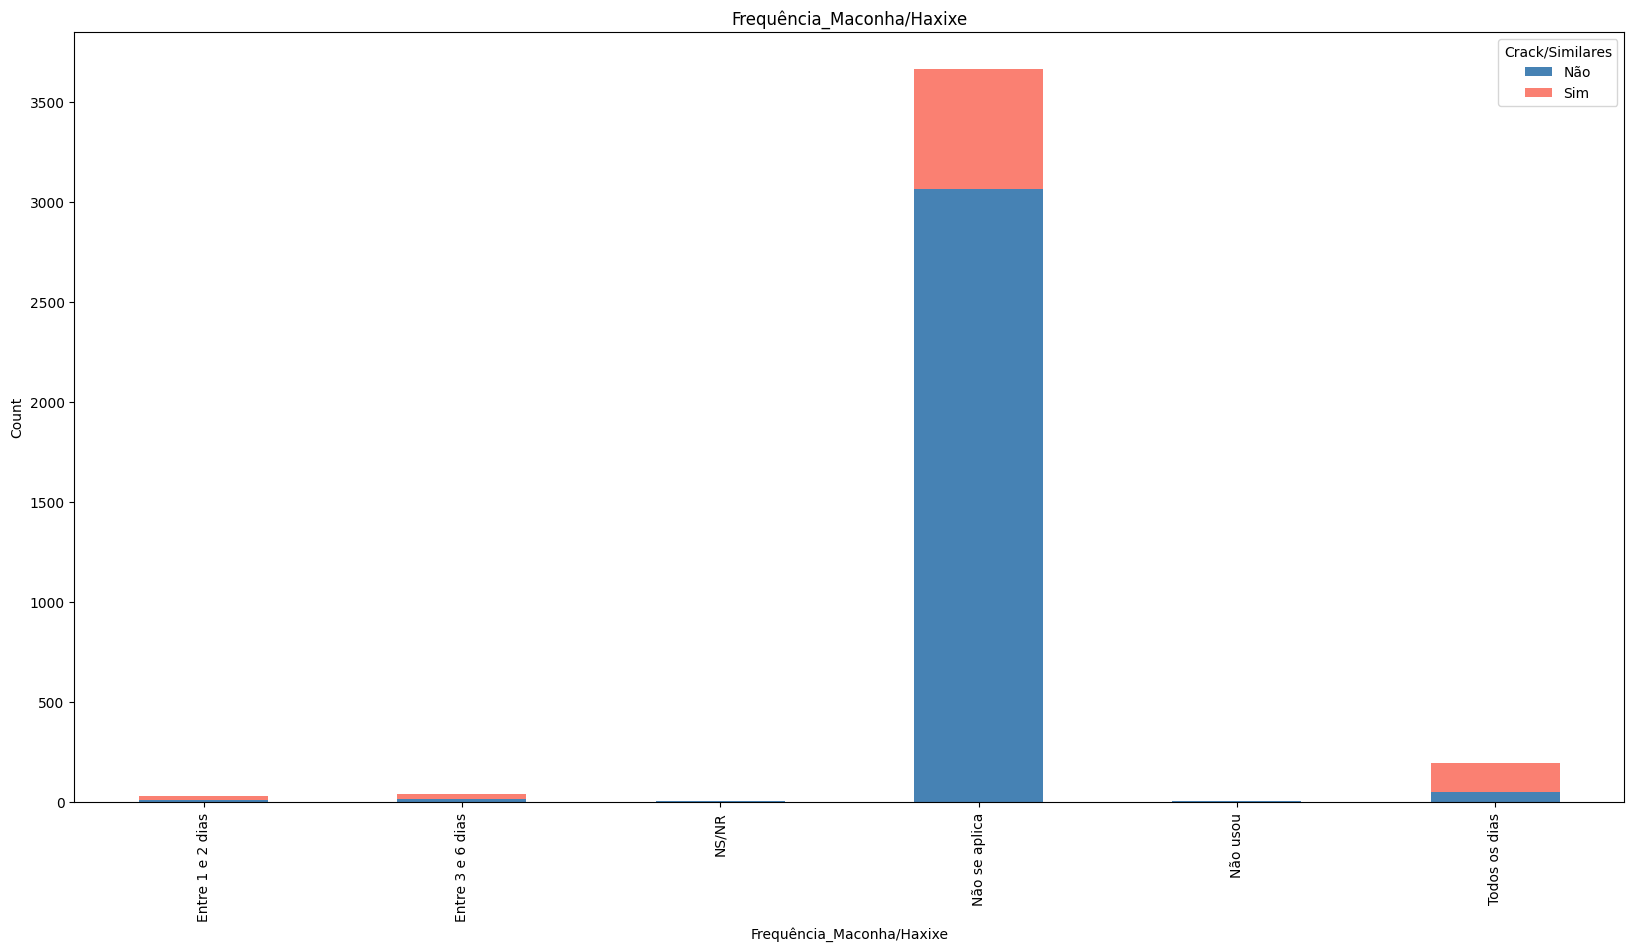

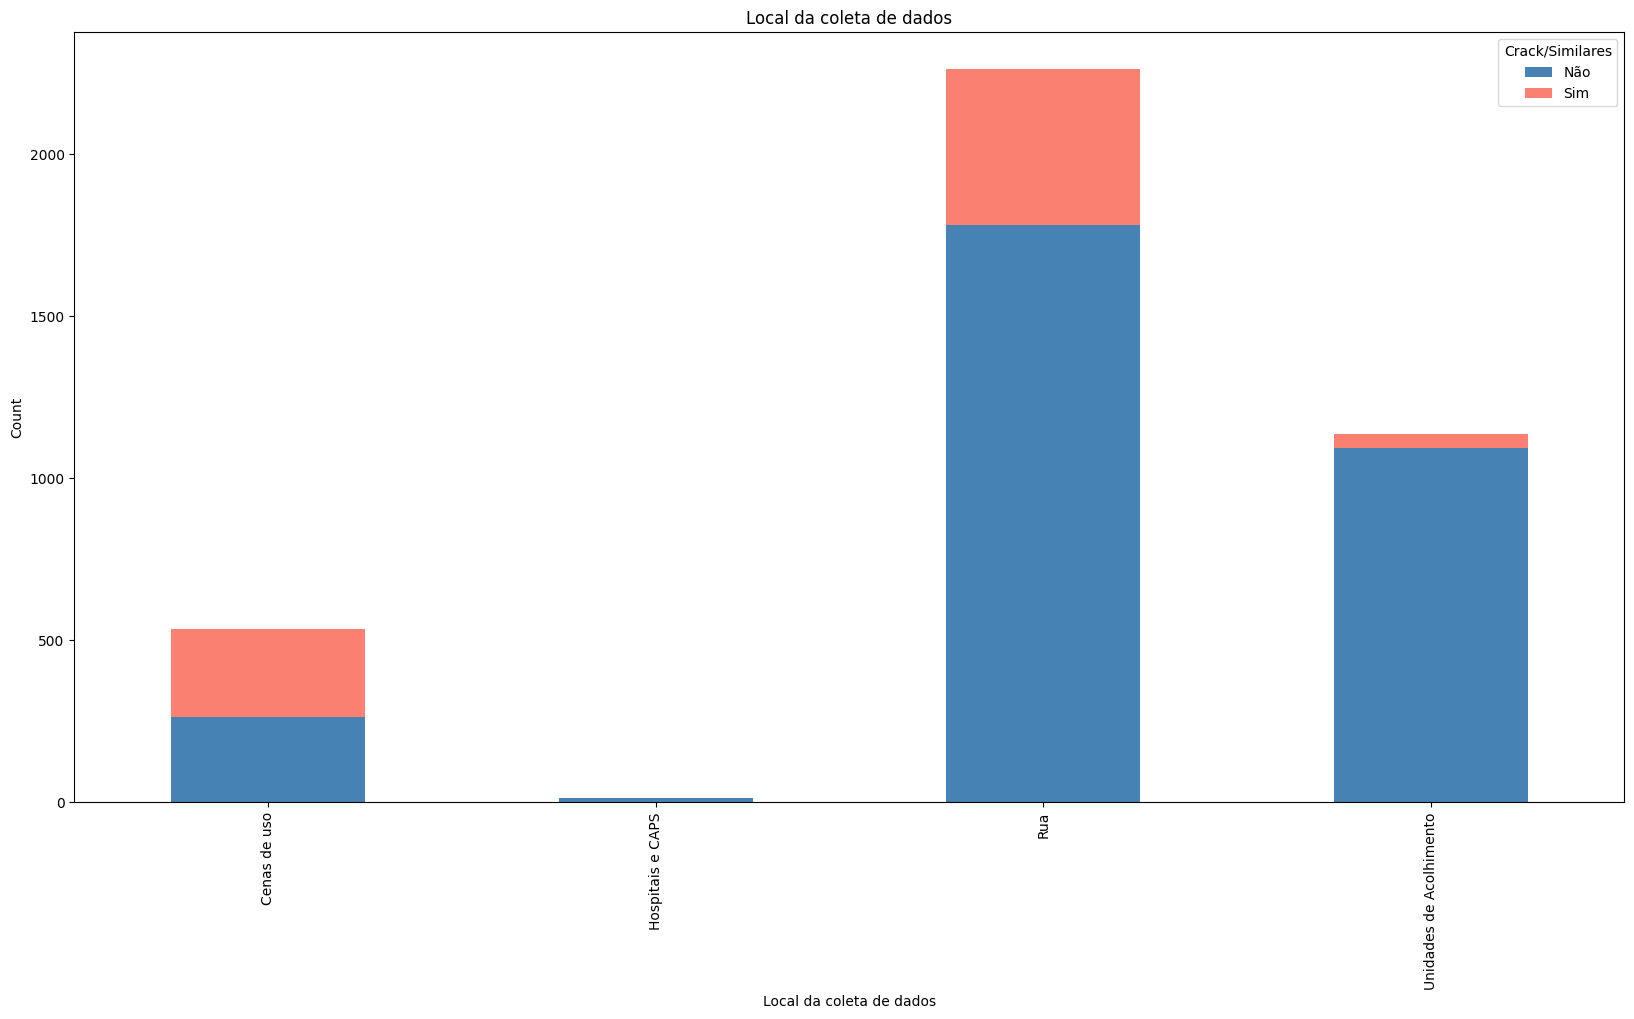

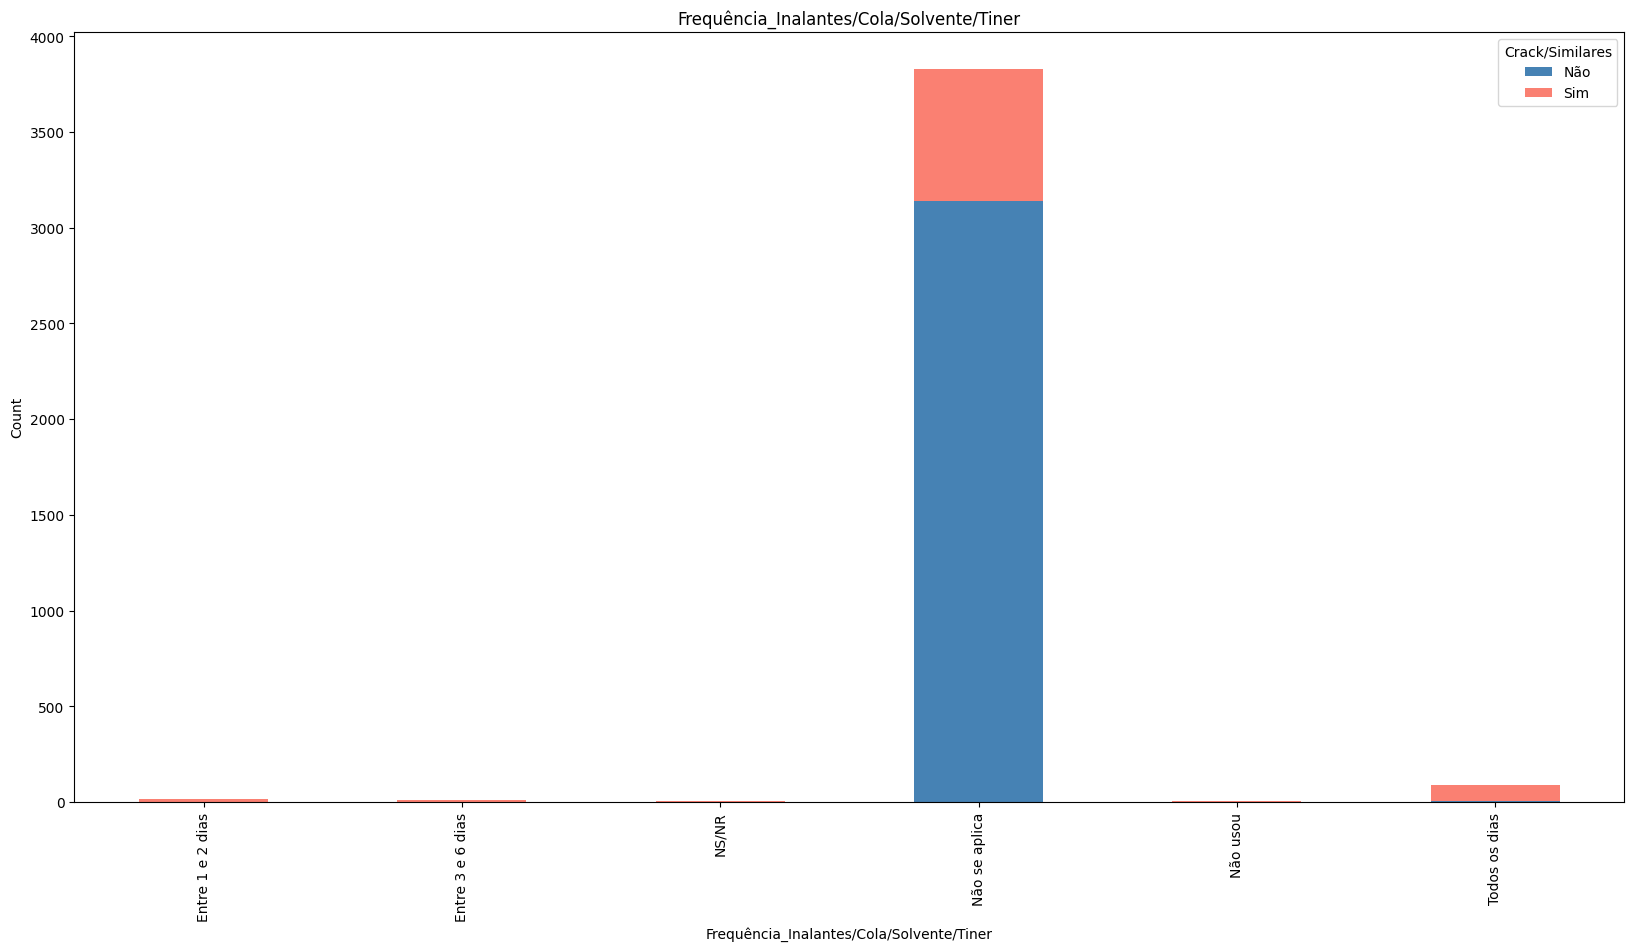

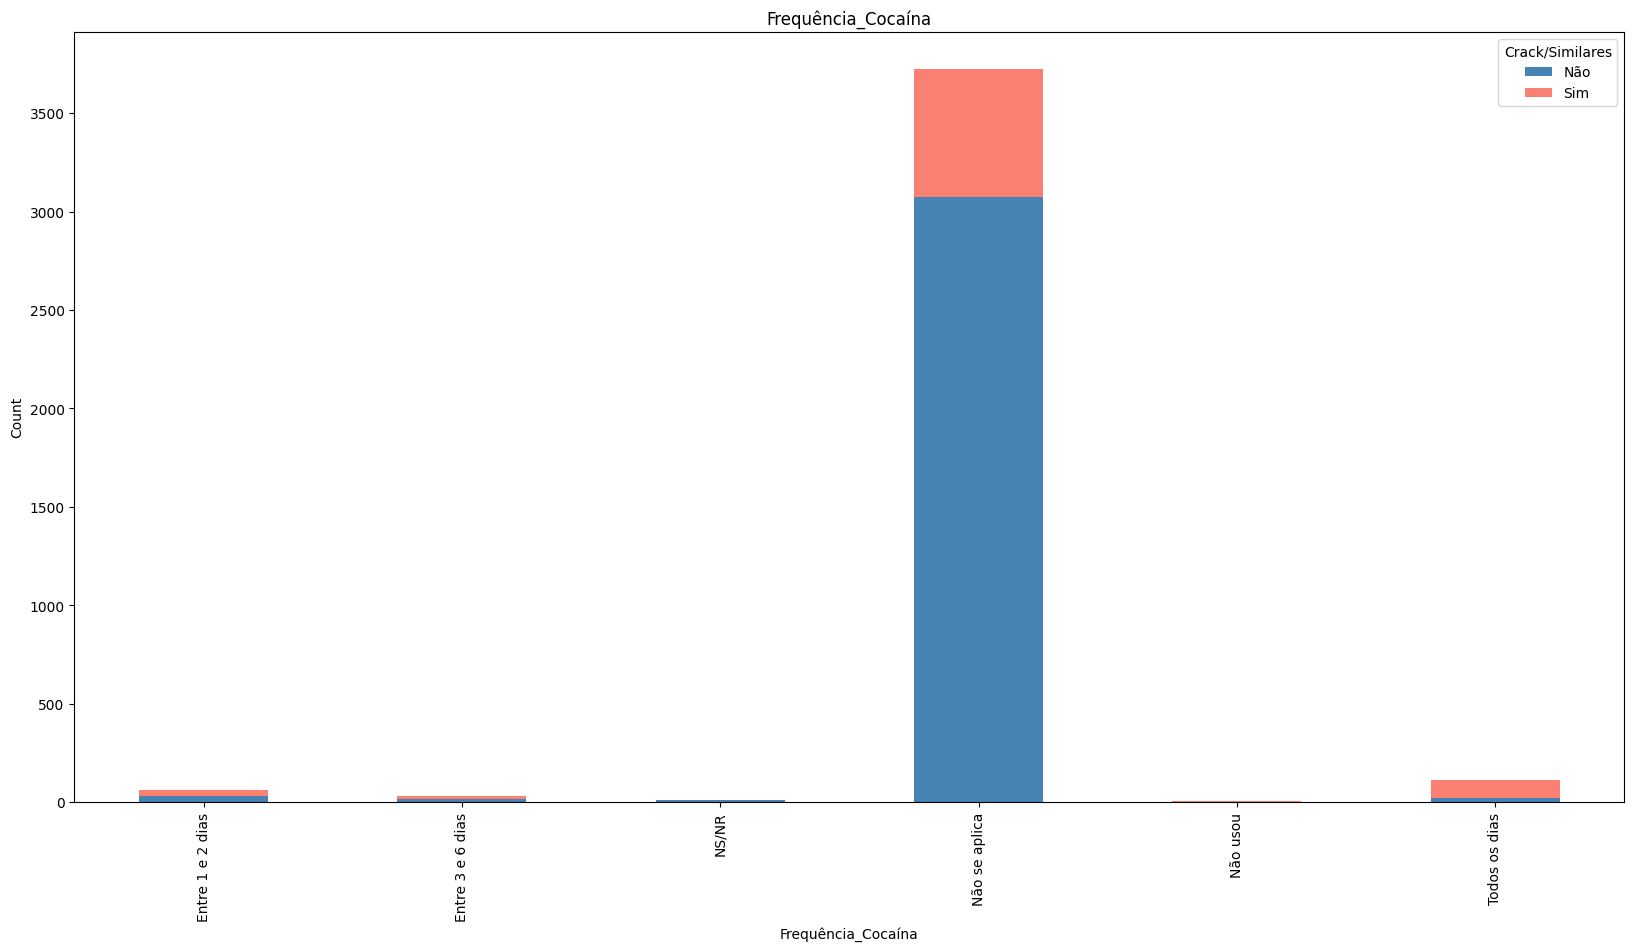

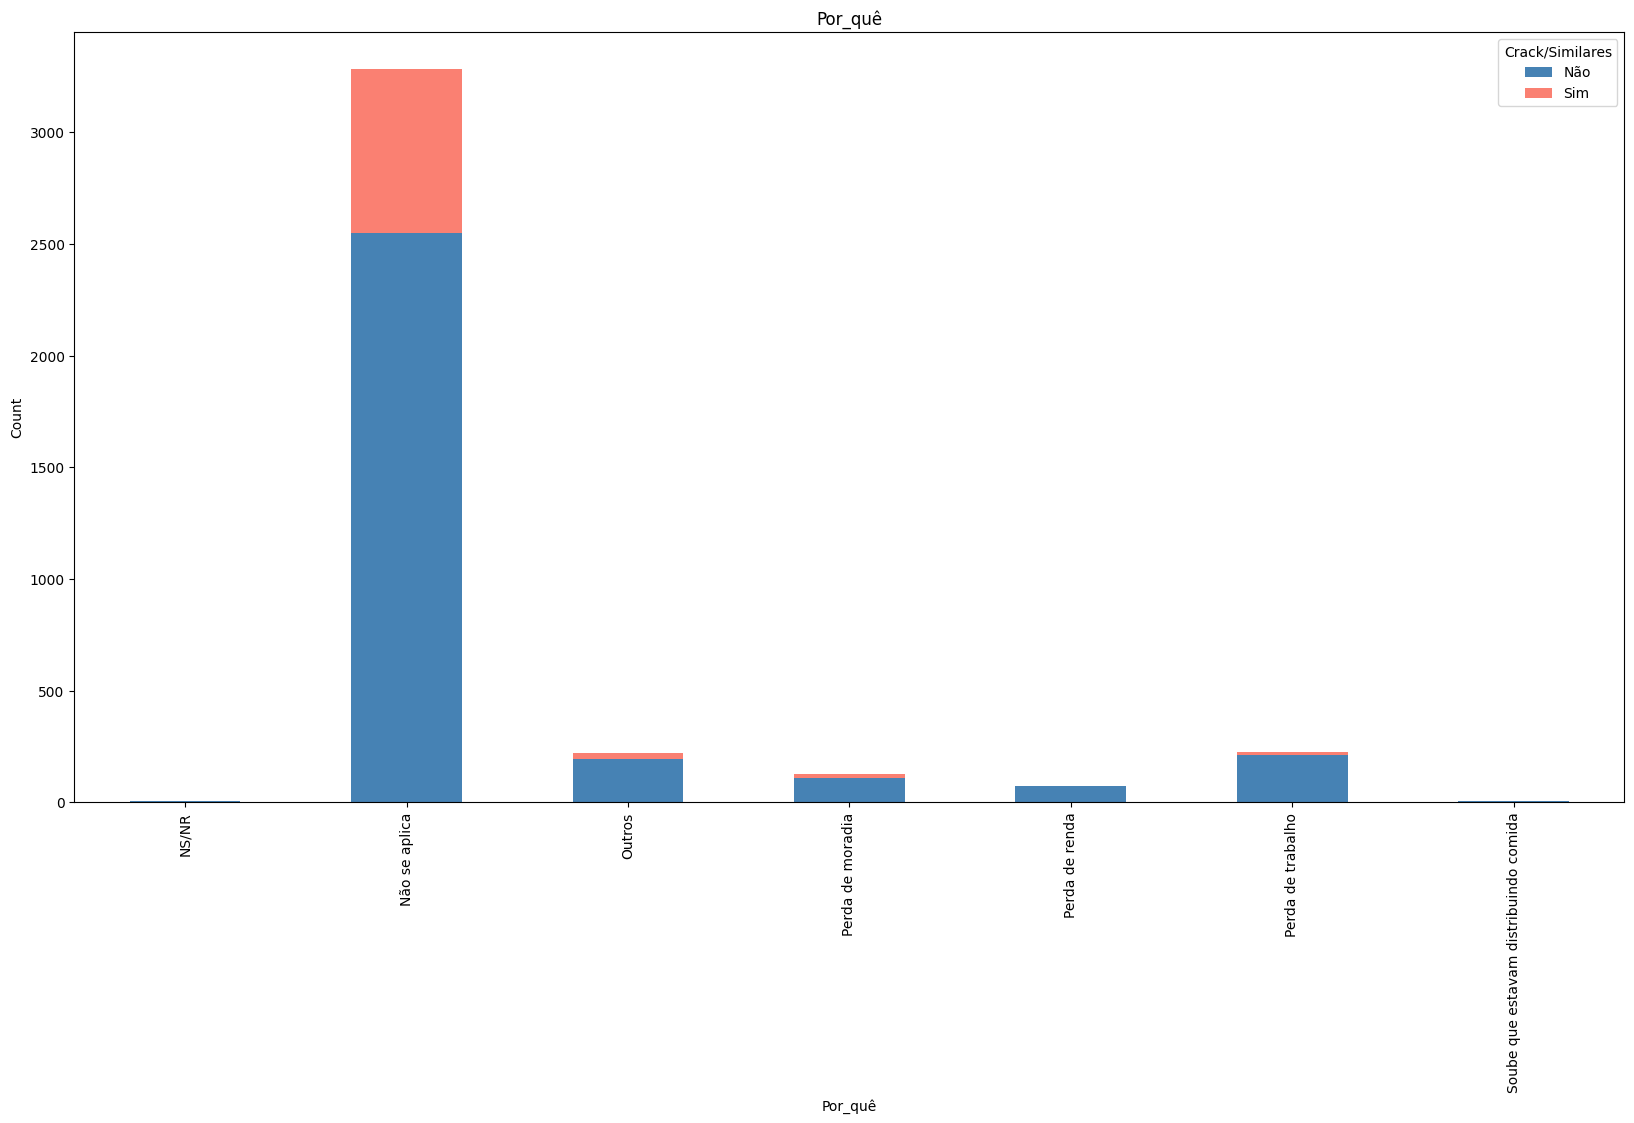

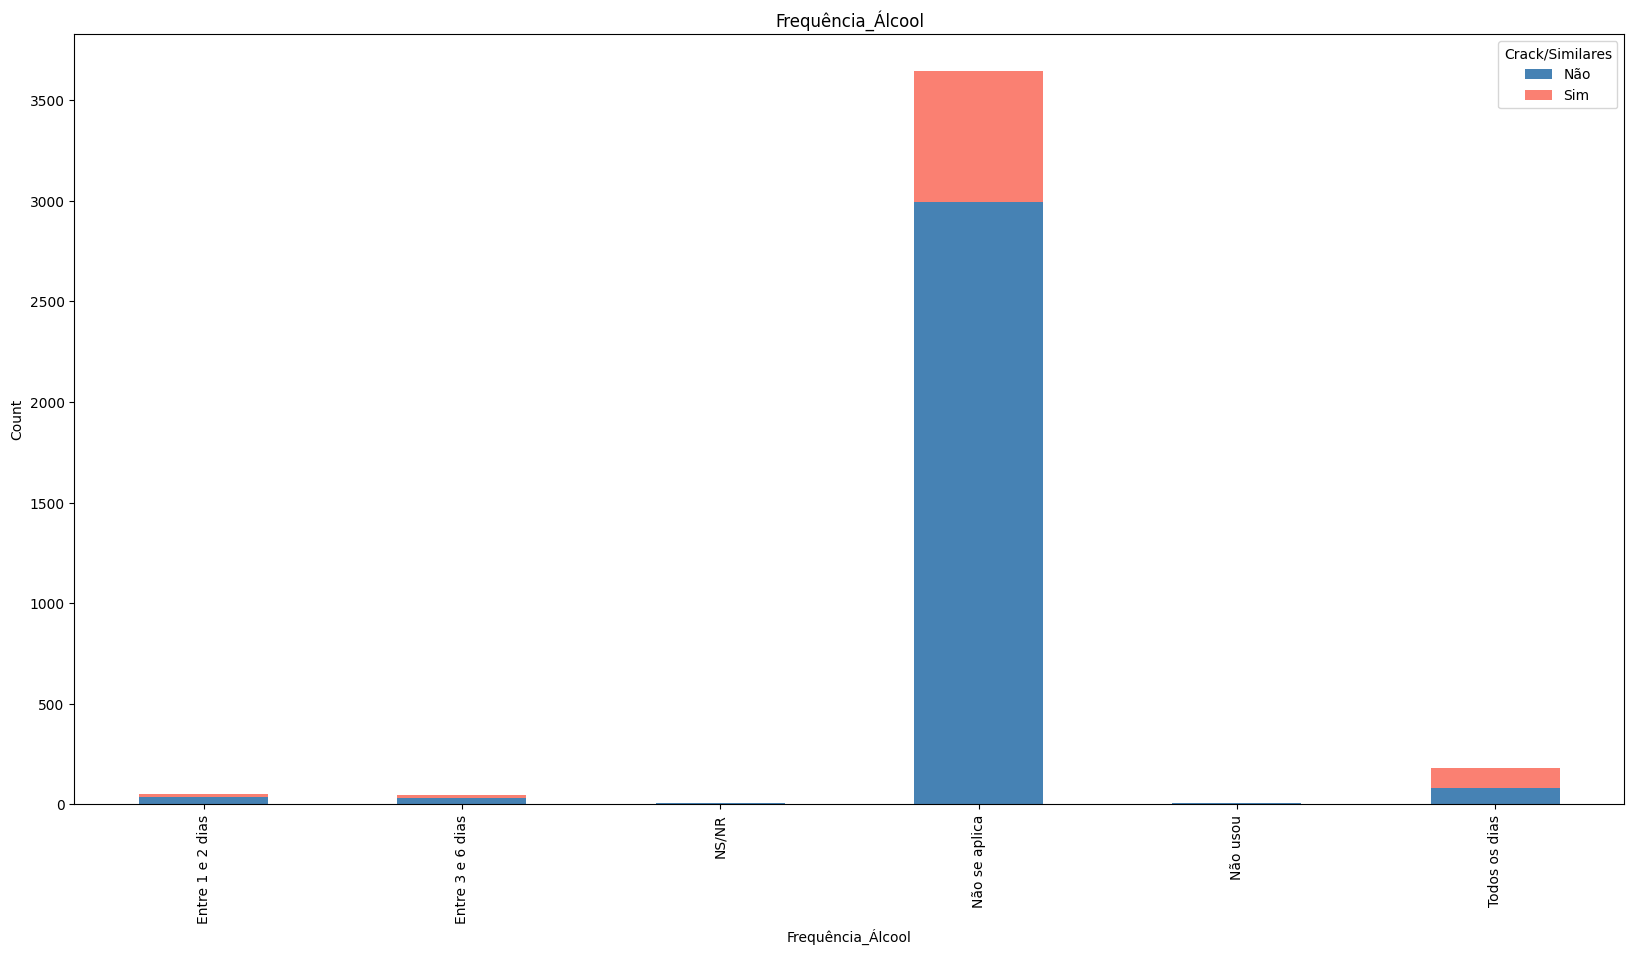

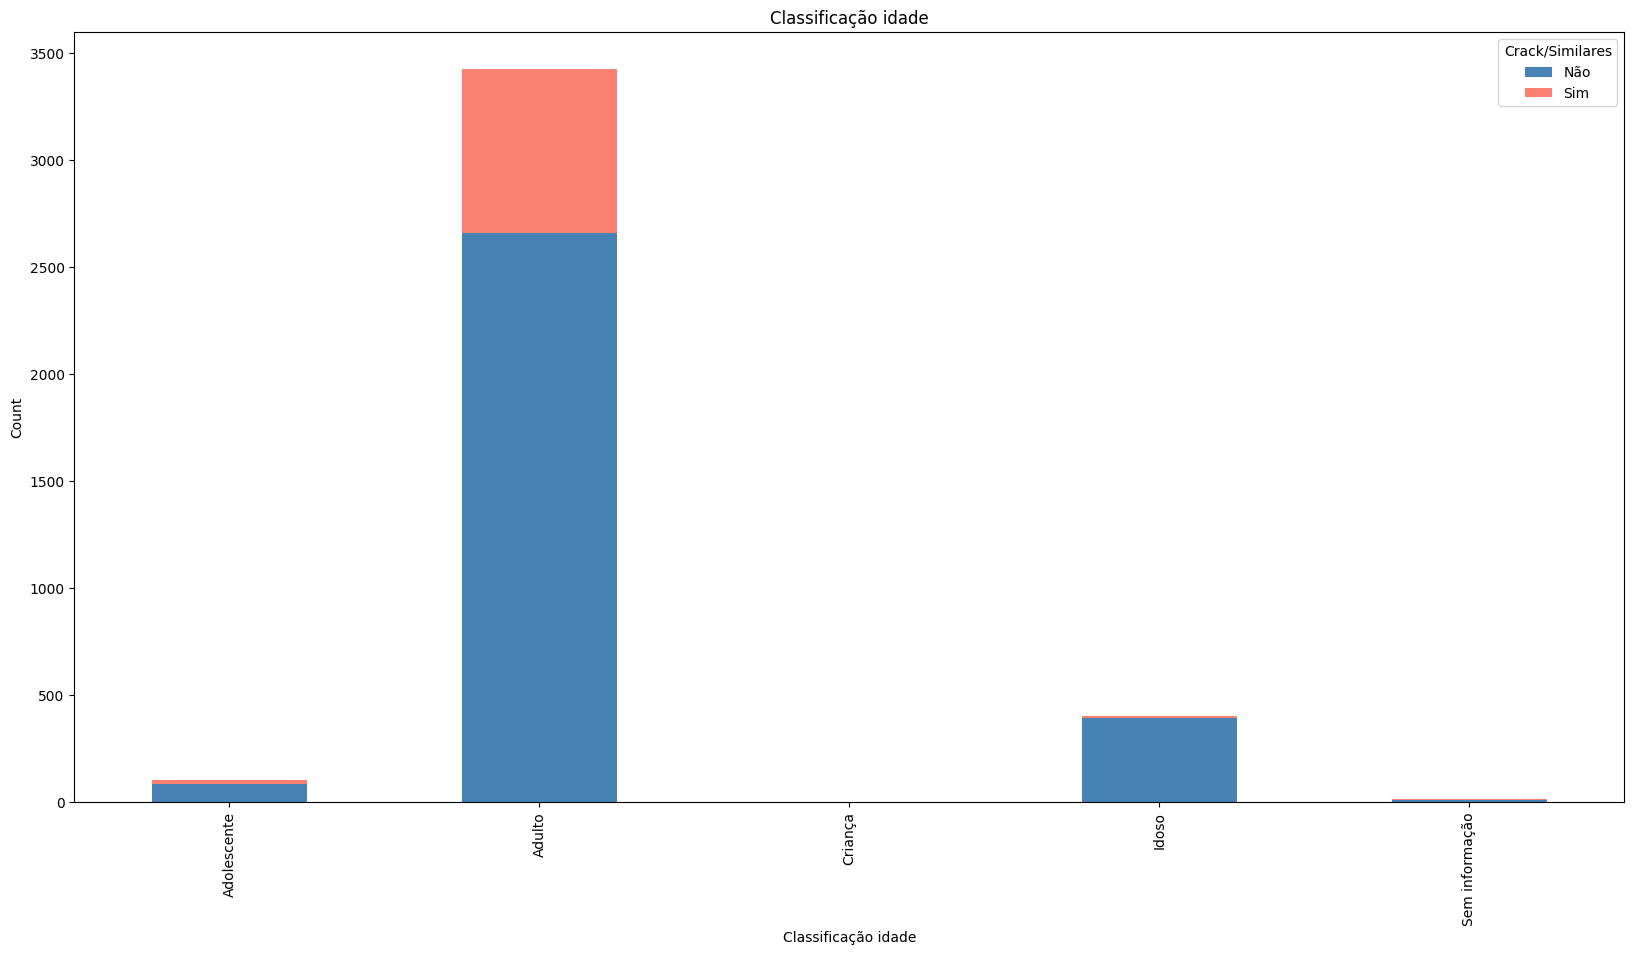

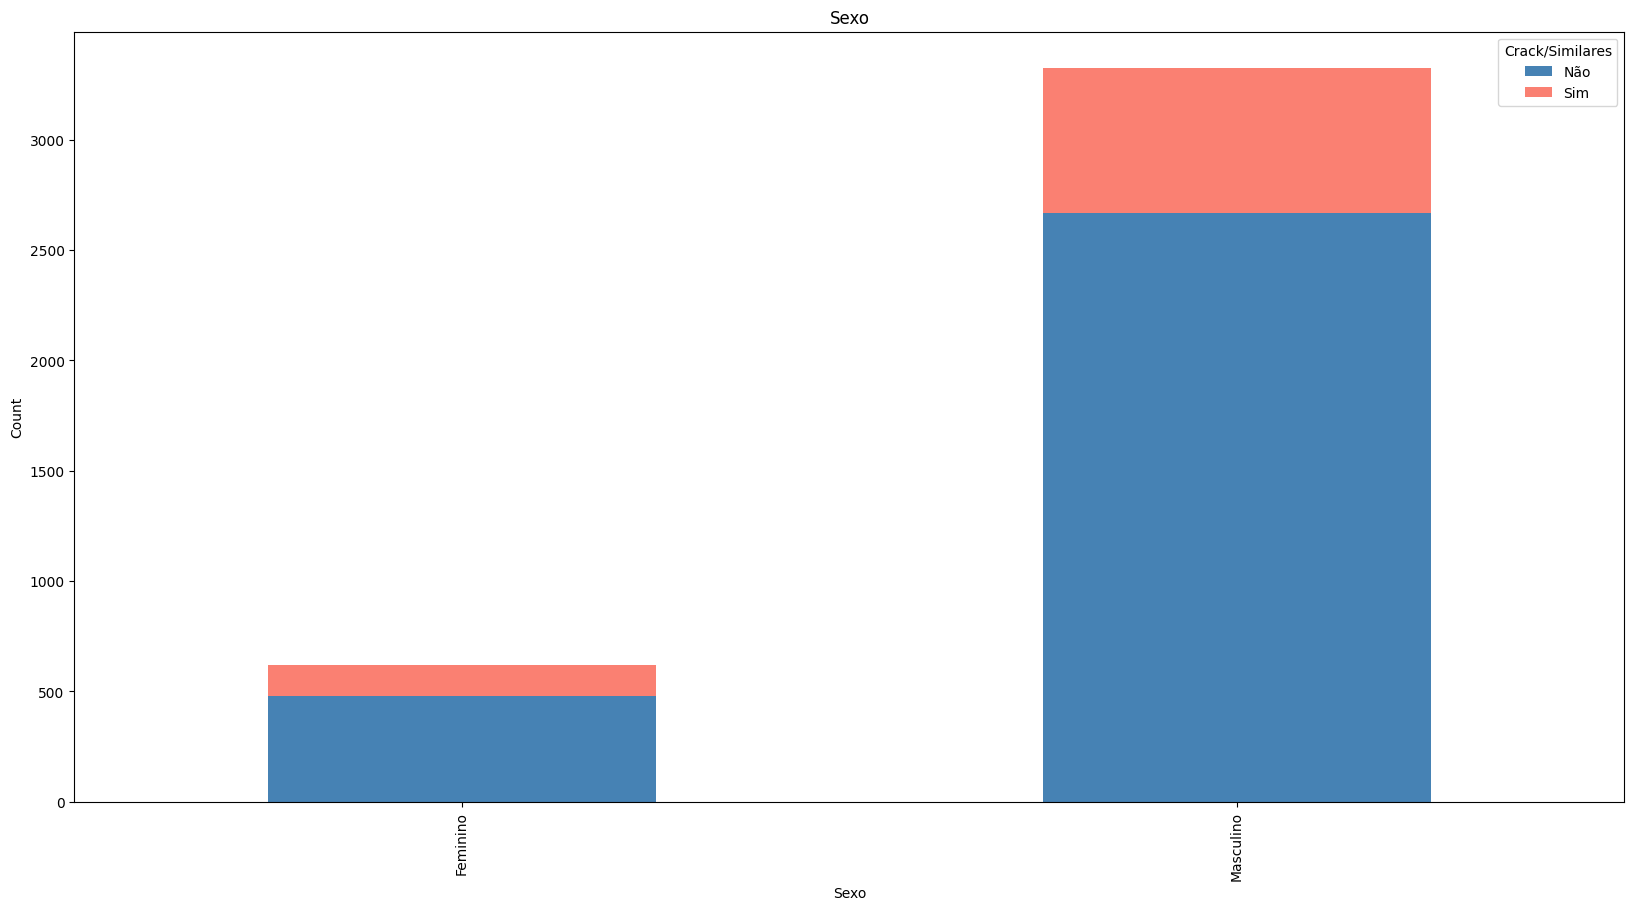

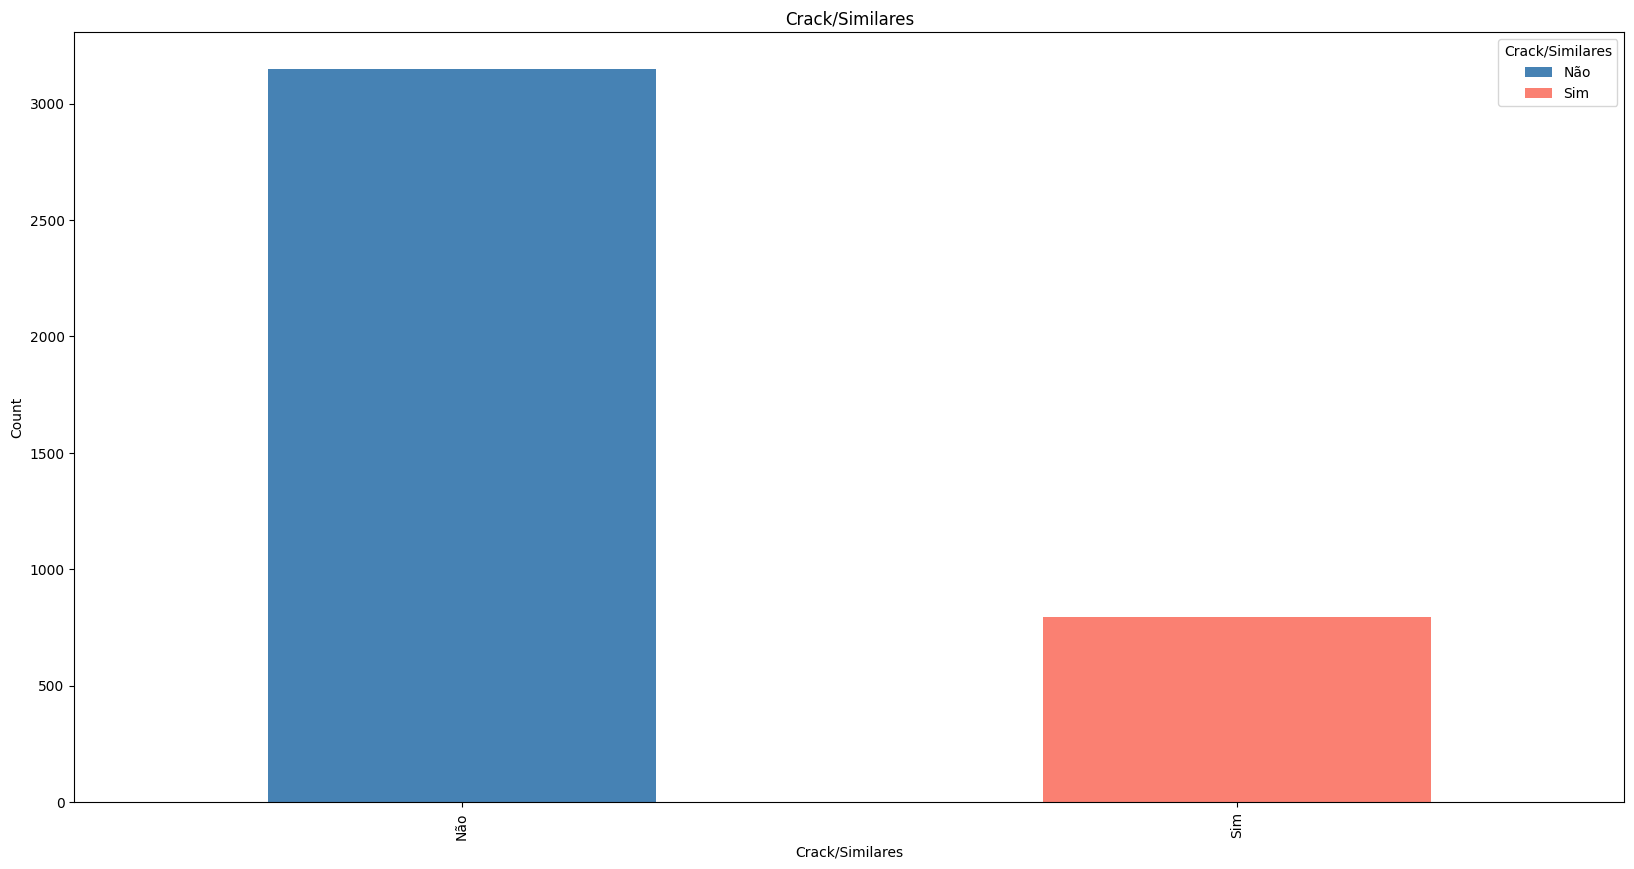

In [7]:
# Itera sobre as colunas categóricas
for col in df_treino.columns:
    if col not in ['Bairro', 'Unidade de Acolhimento/US', 'Município', 'Bairro_7_dias']:
        # Cria tabela de contingência
        ct = pd.crosstab(df_treino[col], df_treino['Crack/Similares'])
        # Plota gráfico de barras
        fig, ax = plt.subplots(figsize=(20,10))
        cores = ['#4682B4', '#FA8072']
        ct.plot(kind='bar', stacked=True, ax=ax, color = cores)
        # Configurações do gráfico
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show()

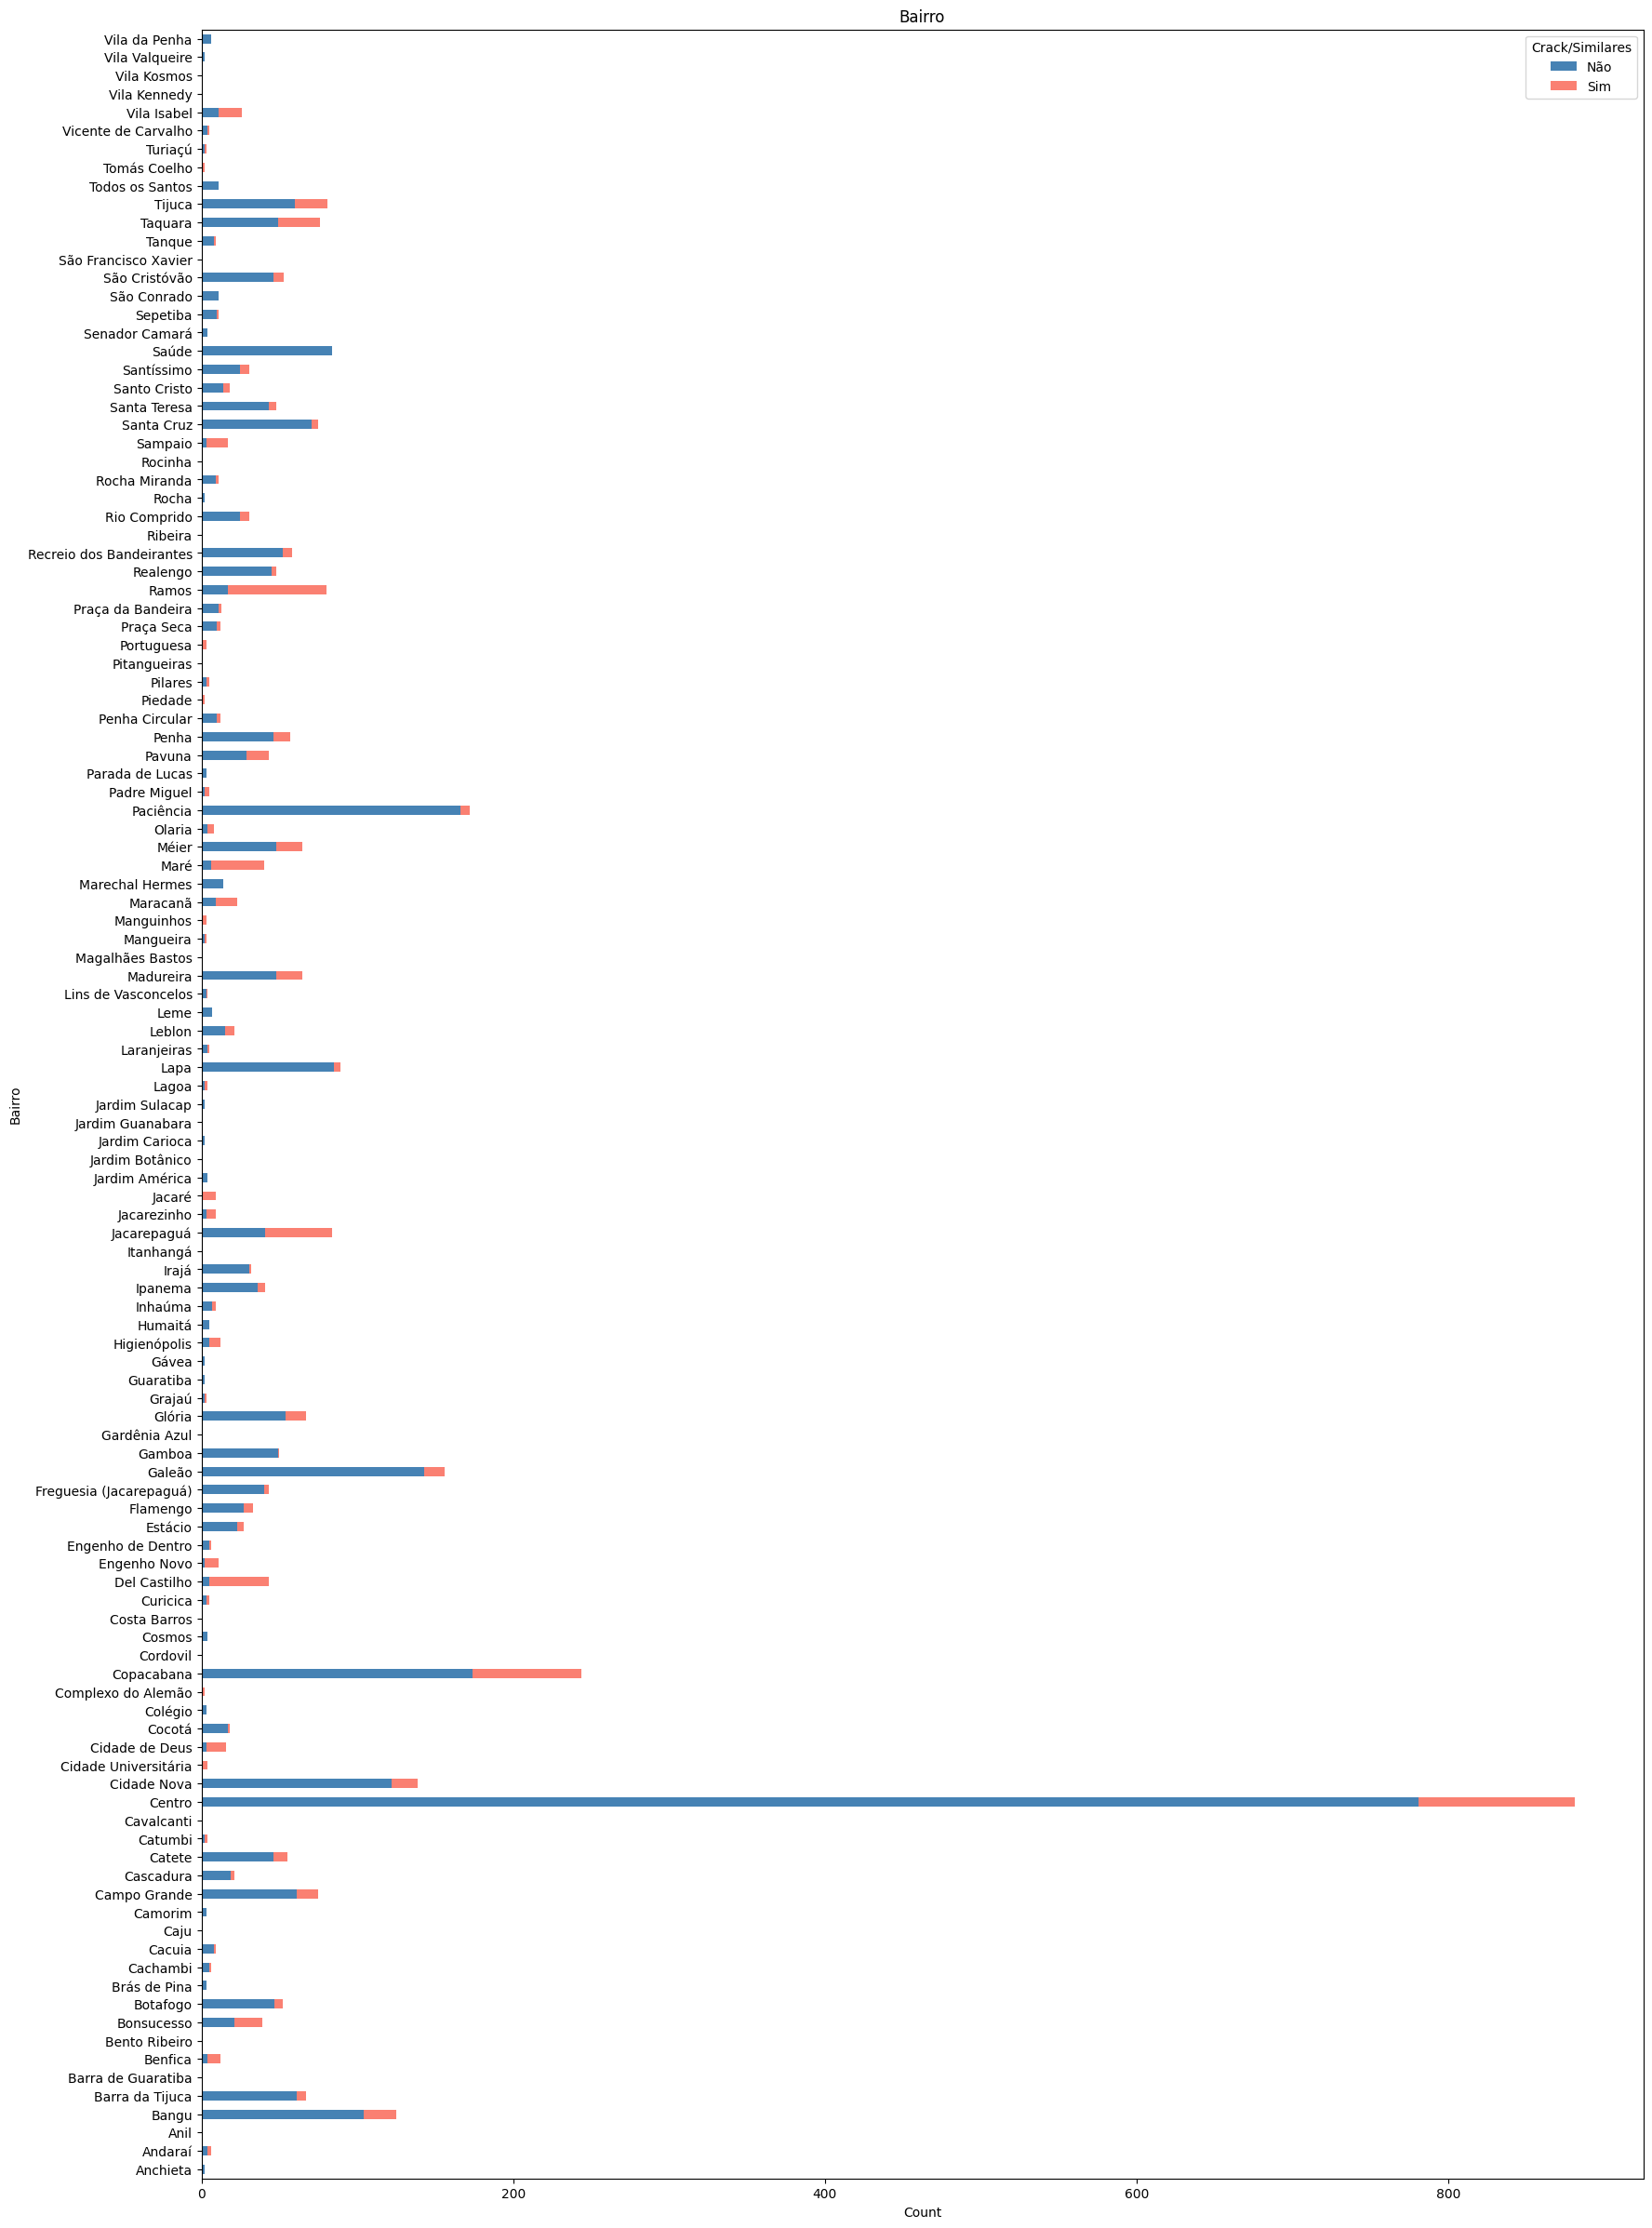

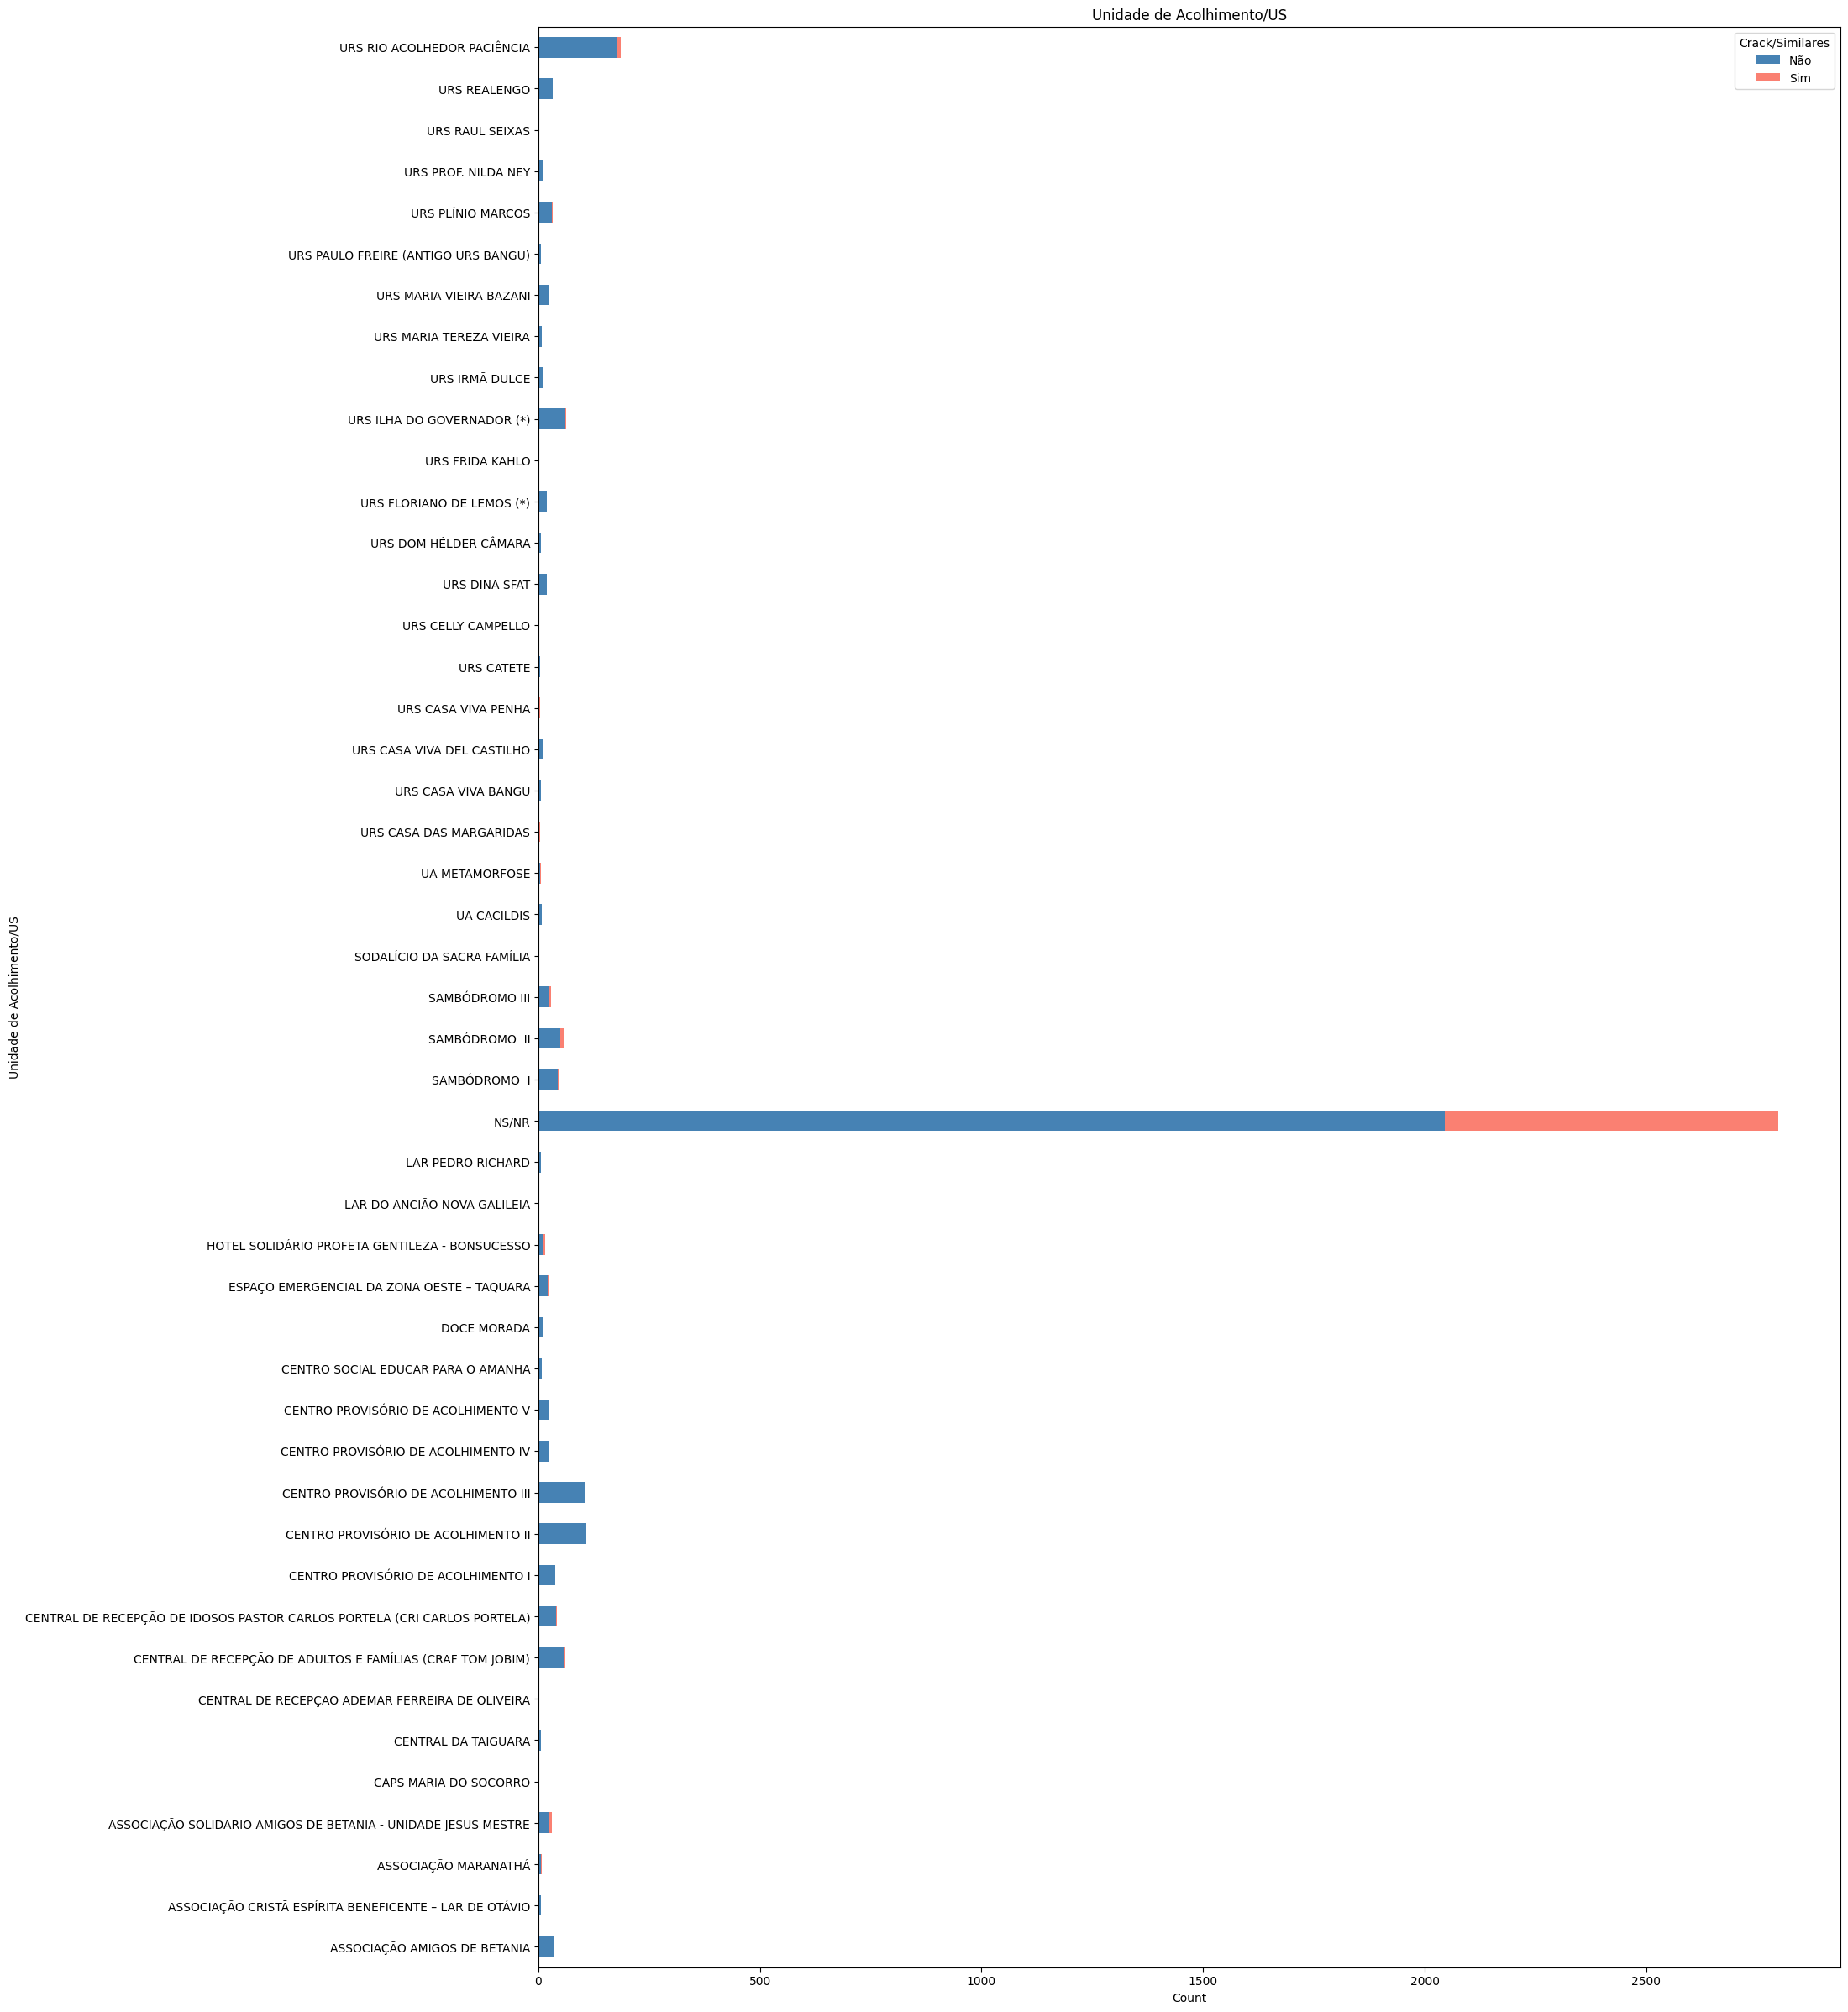

In [8]:
for col in df_treino.columns:
    if col in ['Bairro', 'Unidade de Acolhimento/US', 'Município', 'Bairro_7_dias']:
        # Cria tabela de contingência
        ct = pd.crosstab(df_treino[col], df_treino['Crack/Similares'])
        # Plota gráfico de barras
        fig, ax = plt.subplots(figsize=(20,30))
        cores = ['#4682B4', '#FA8072']
        ct.plot(kind='barh', stacked=True, ax=ax, color = cores)
        # Configurações do gráfico
        ax.set_title(col)
        ax.set_xlabel('Count')
        ax.set_ylabel(col)
        plt.show()

# Análise Exploratória:

In [9]:
# Contagem das Variáveis pouco inconclusivas:
for col in df_treino.columns:
    if col != 'Crack/Similares':
        valor = df_treino[df_treino['Crack/Similares'] == 'Sim'][col].value_counts().idxmax()
        if valor != 'Não se aplica':
            print(col + ': ' + valor)

Bairro: Centro
Faixa etária: 31 a 49
Região Administrativa: II - CENTRO
Local da coleta de dados: Rua
Unidade de Acolhimento/US: NS/NR
Classificação idade: Adulto
Sexo: Masculino


## Principais categorias por variável:

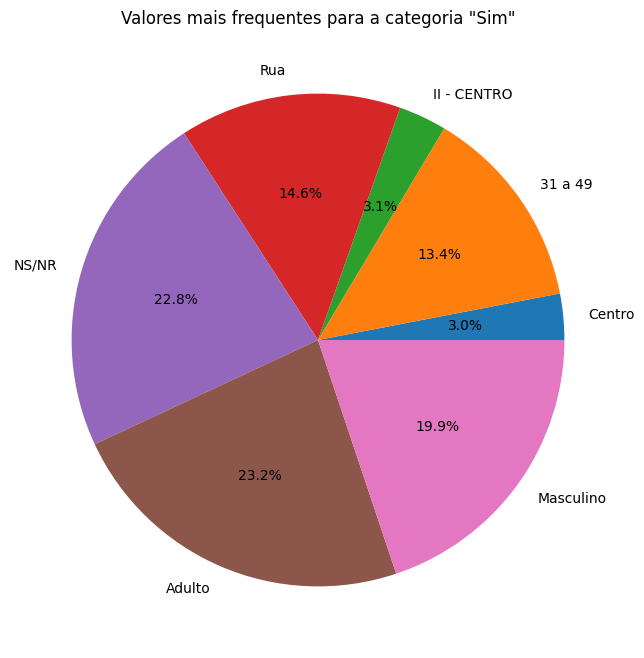

In [10]:
# Gráfico de Pizza das principais categorias de cada variável:
valores_porcentagens = []

for col in df_treino.columns:
    if col != 'Crack/Similares':
        # Obtém o valor mais frequente para a categoria 'Sim'
        valor = df_treino[df_treino['Crack/Similares'] == 'Sim'][col].value_counts().idxmax()
        if valor != 'Não se aplica':
            # Calcula a porcentagem de vezes que o valor aparece na categoria 'Sim'
            porcentagem = (df_treino[(df_treino['Crack/Similares'] == 'Sim') & (df_treino[col] == valor)].shape[0] / df_treino[df_treino['Crack/Similares'] == 'Sim'].shape[0]) * 100
            # Adiciona o valor e a porcentagem à lista
            valores_porcentagens.append((valor, porcentagem))

# Cria uma figura
fig, ax = plt.subplots(figsize=(8, 8))

# Cria um gráfico de pizza com as porcentagens
ax.pie([vp[1] for vp in valores_porcentagens], labels=[vp[0] for vp in valores_porcentagens], autopct='%1.1f%%')

# Configura o título do gráfico
ax.set_title('Valores mais frequentes para a categoria "Sim"')

# Mostra o gráfico
plt.show()

## Distribuição das categorias por cada Variável:

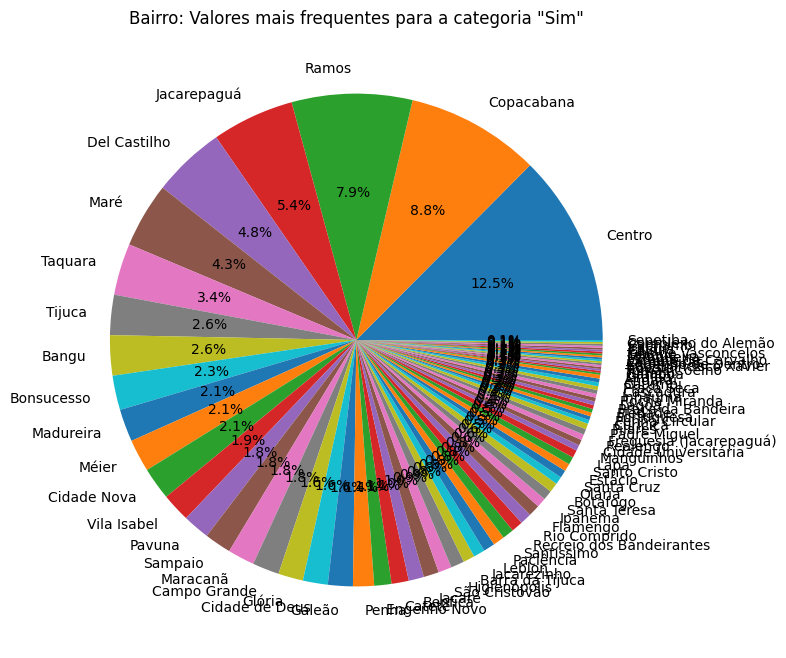

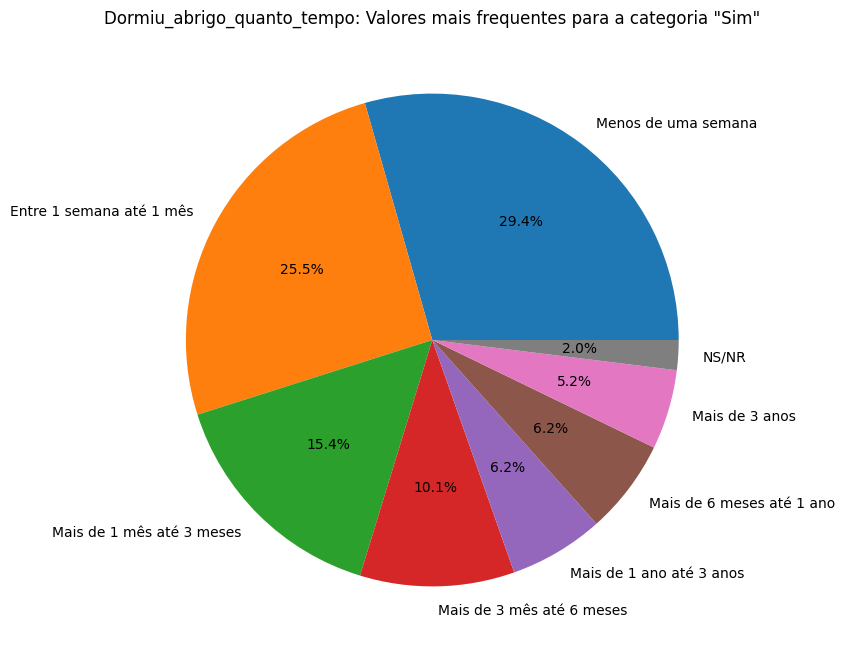

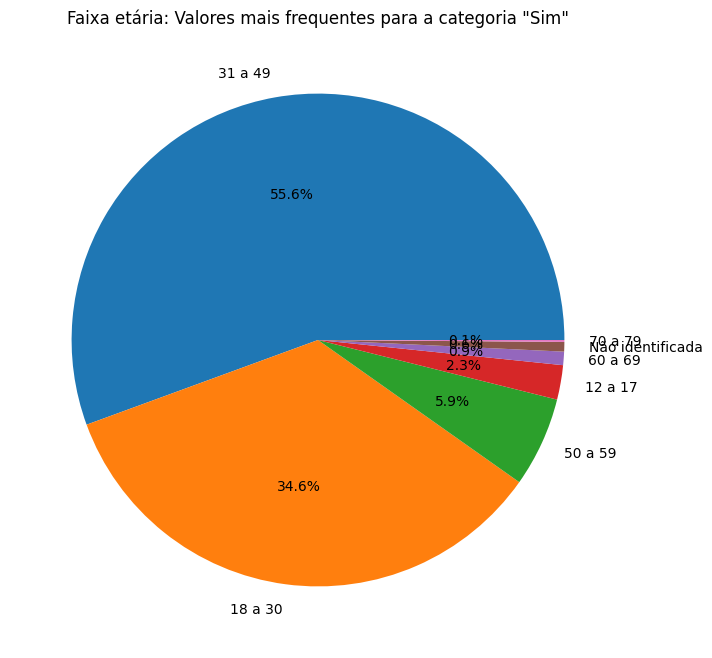

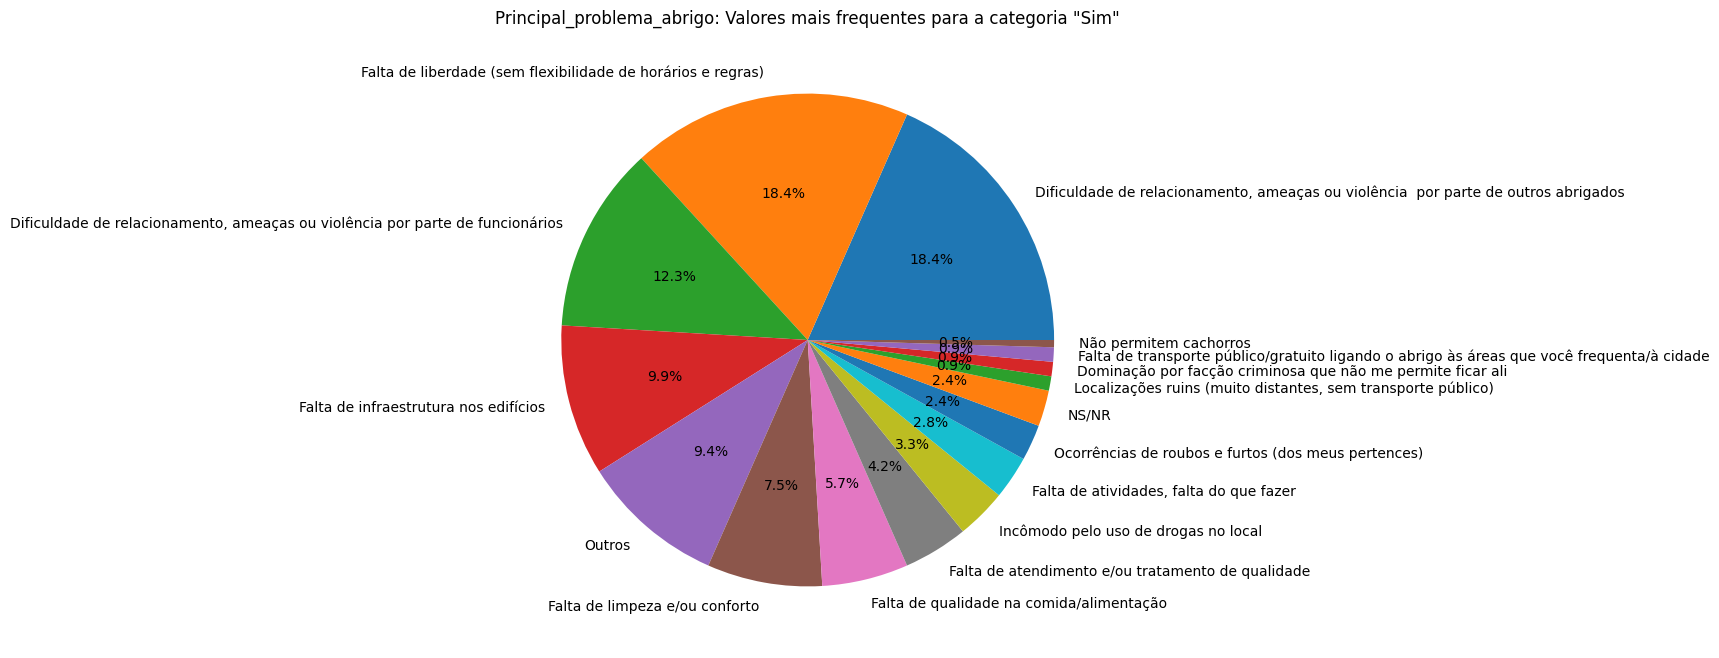

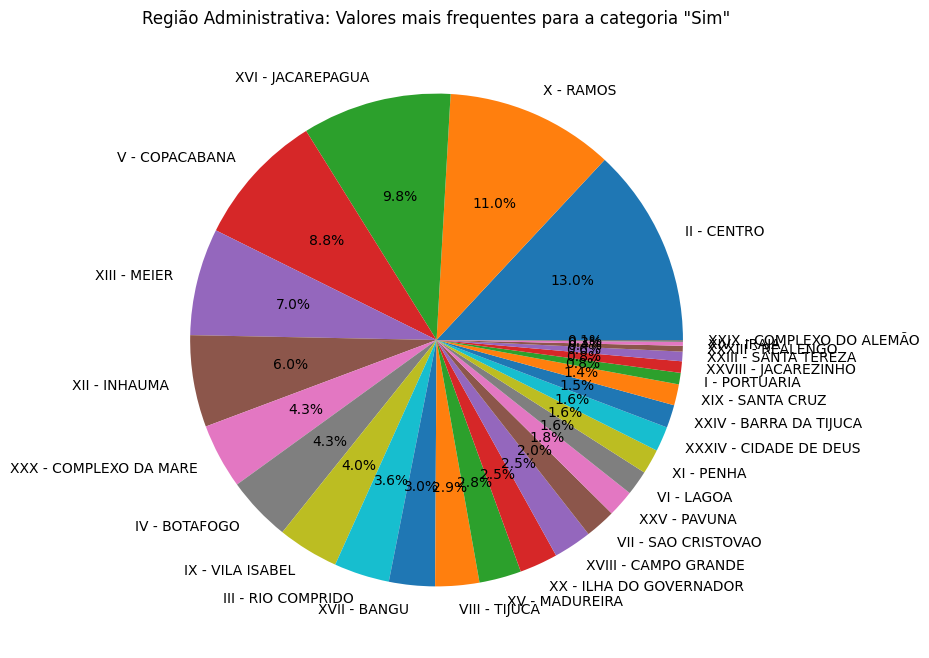

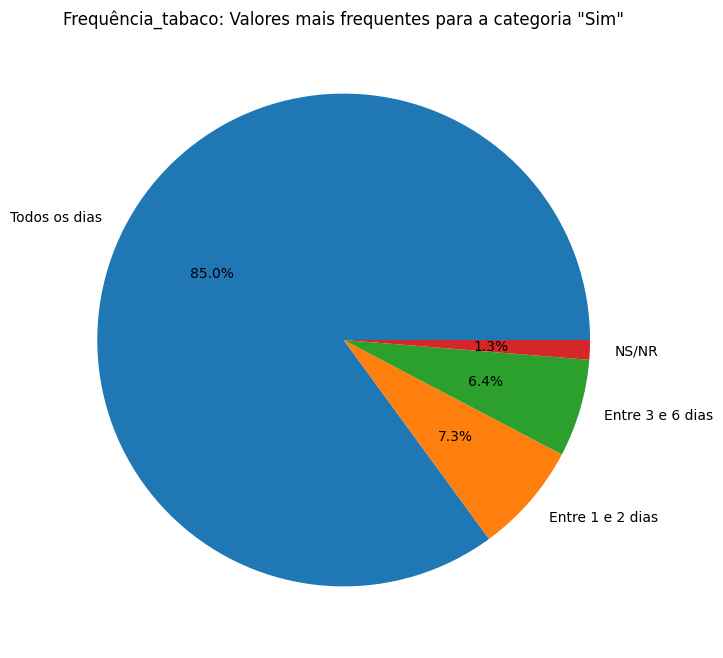

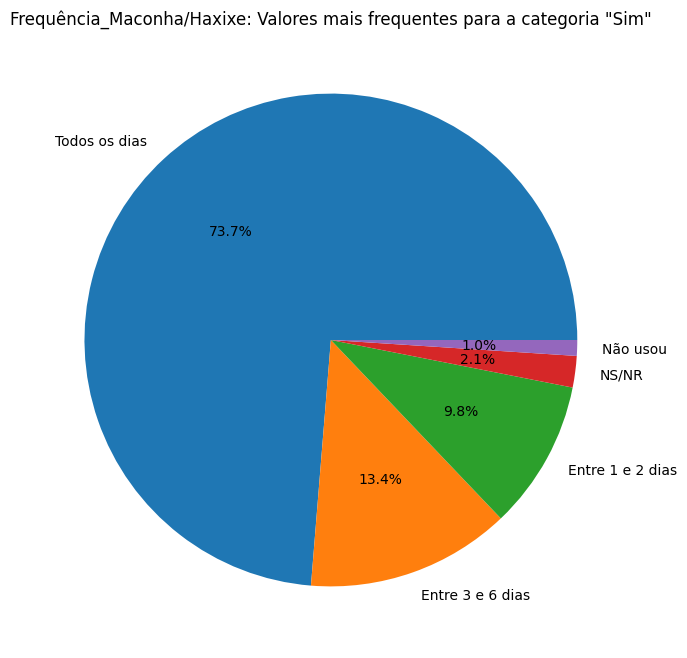

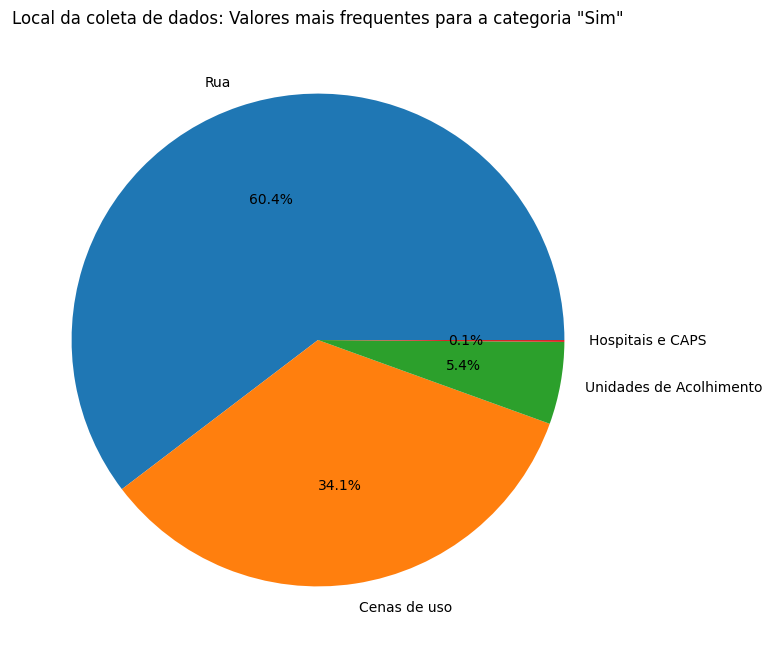

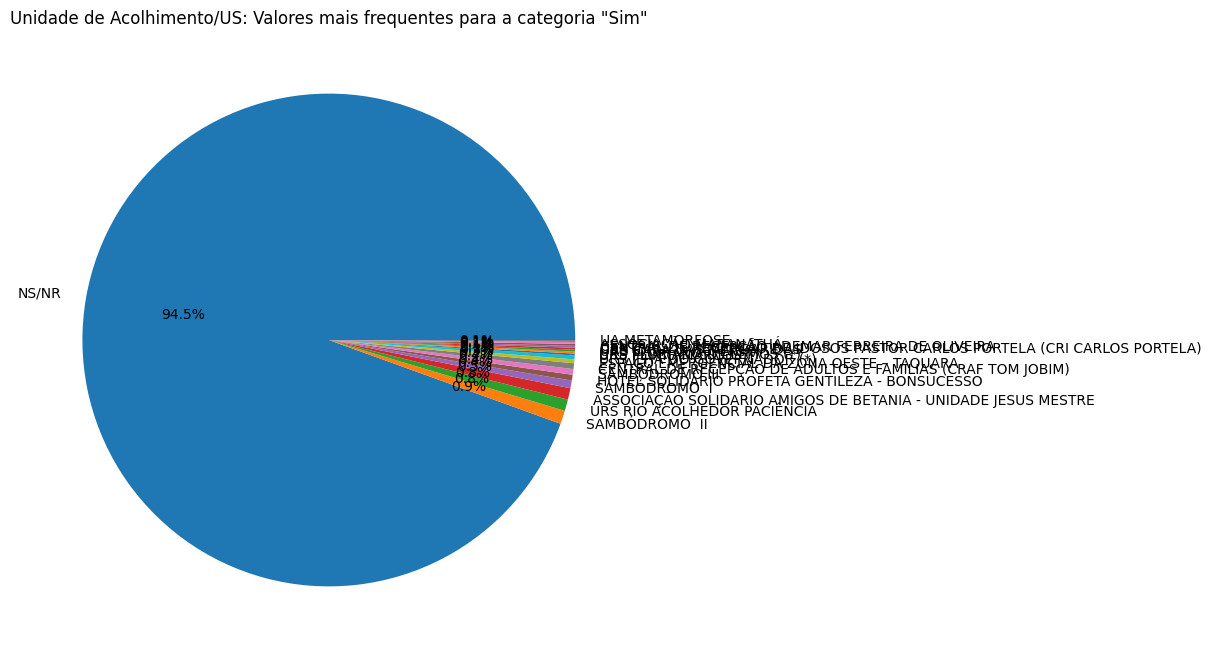

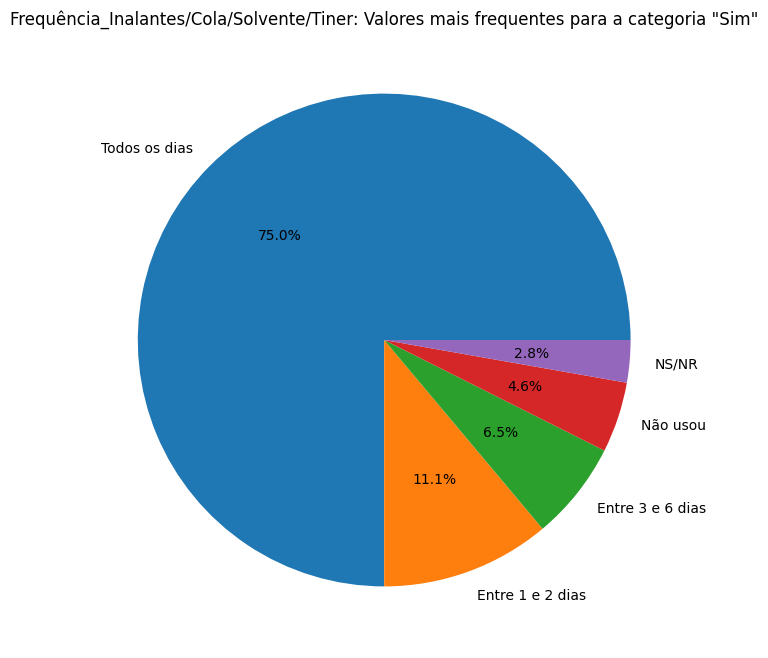

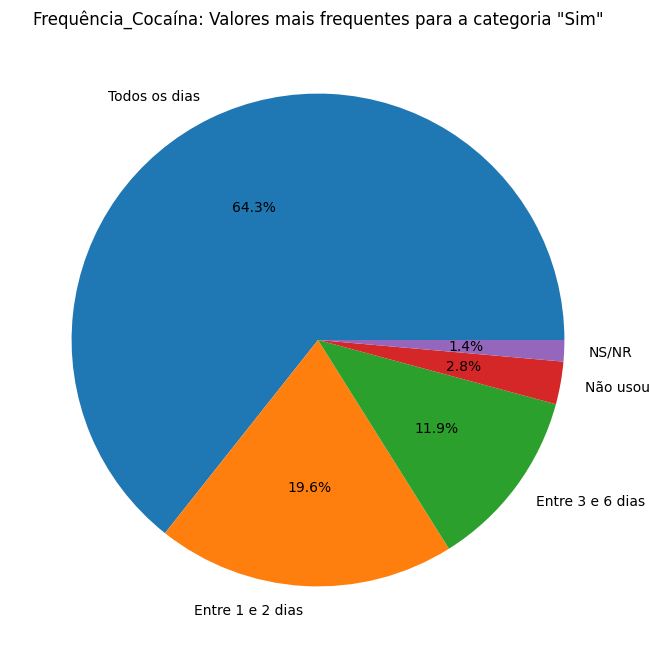

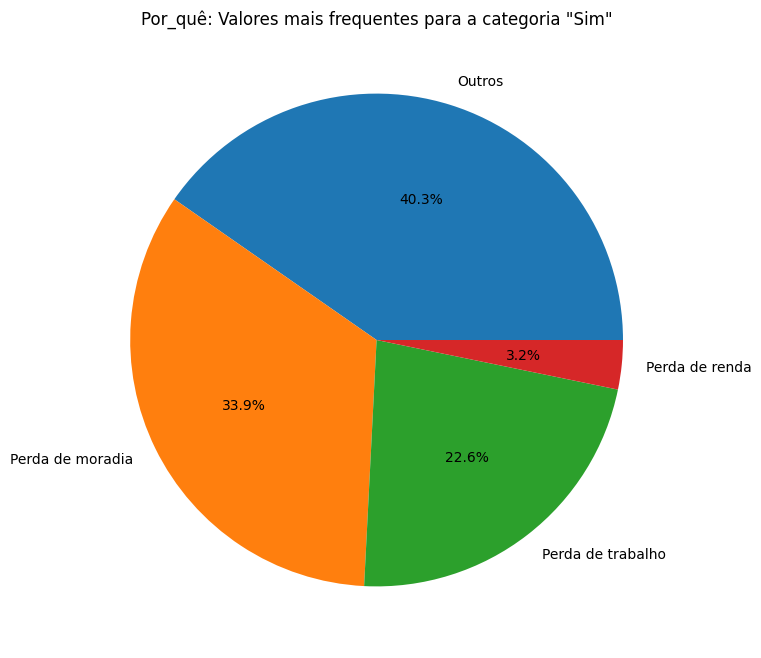

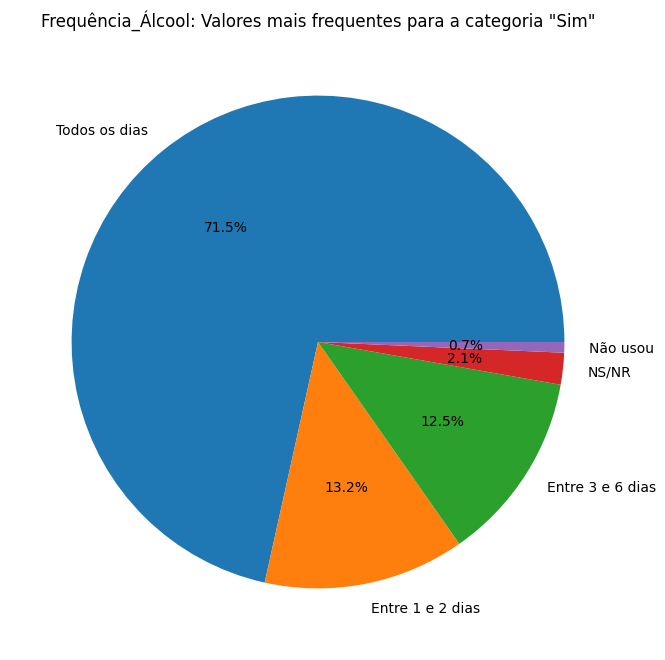

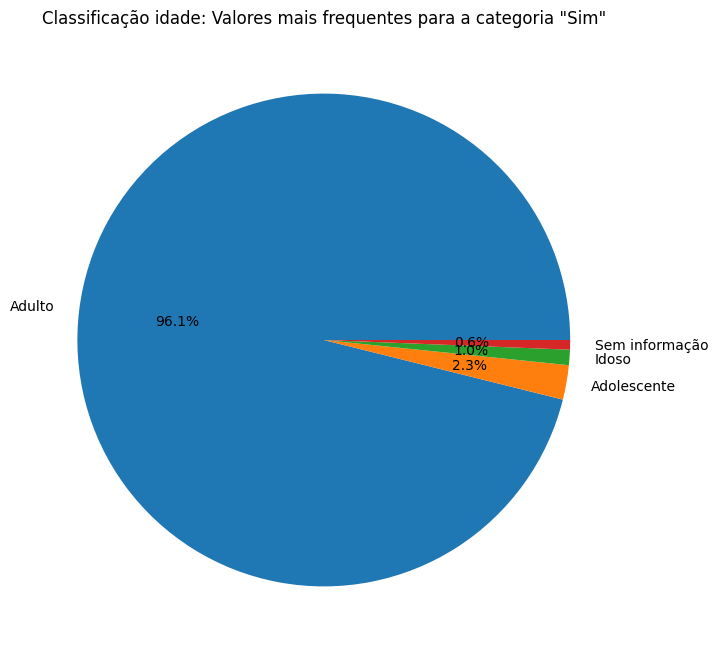

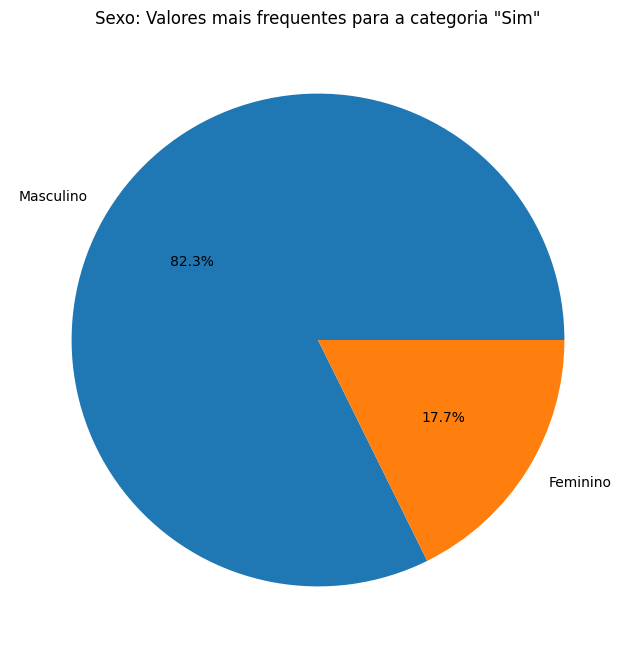

In [11]:
# Define as variáveis que serão utilizadas no gráfico
cols = [col for col in df_treino.columns if col != 'Crack/Similares']

# Cria um gráfico de pizza para cada variável
for col in cols:
    # Obtém as categorias e suas frequências para a categoria 'Sim'
    sim_categories = df_treino[df_treino['Crack/Similares'] == 'Sim'][col].value_counts()
    # Filtra as categorias diferentes de 'Não se aplica'
    sim_categories = sim_categories[sim_categories.index != 'Não se aplica']
    # Calcula a porcentagem de vezes que cada categoria aparece na categoria 'Sim'
    sim_categories_pct = (sim_categories / sim_categories.sum()) * 100
    
    # Cria uma figura
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Cria um gráfico de pizza com as porcentagens
    ax.pie(sim_categories_pct, labels=sim_categories.index, autopct='%1.1f%%')
    
    # Configura o título do gráfico
    ax.set_title(f'{col}: Valores mais frequentes para a categoria "Sim"')
    
    # Mostra o gráfico
    plt.show()

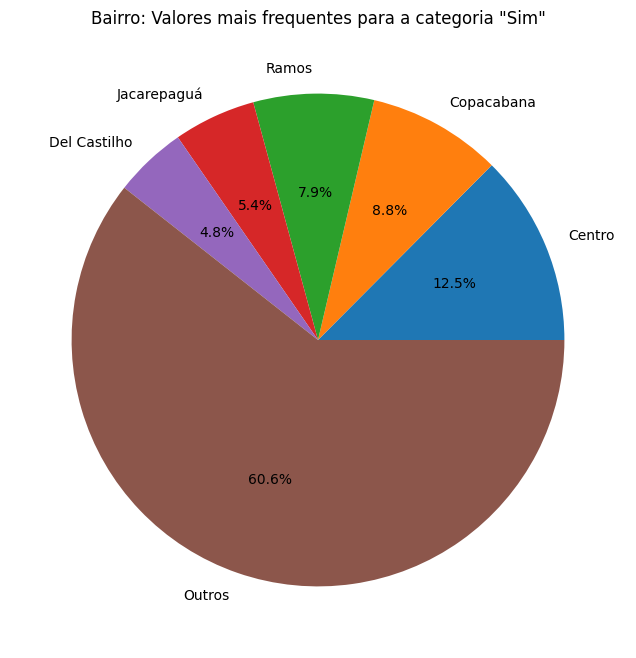

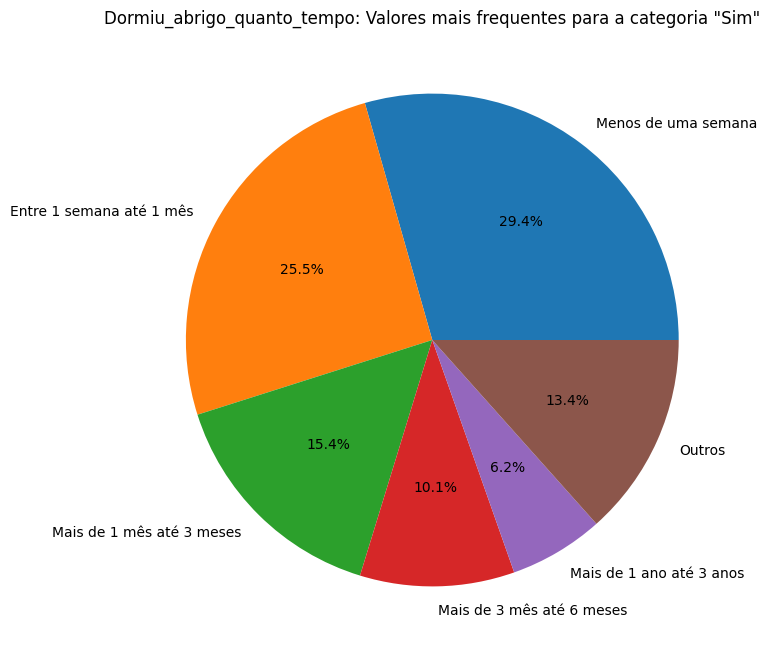

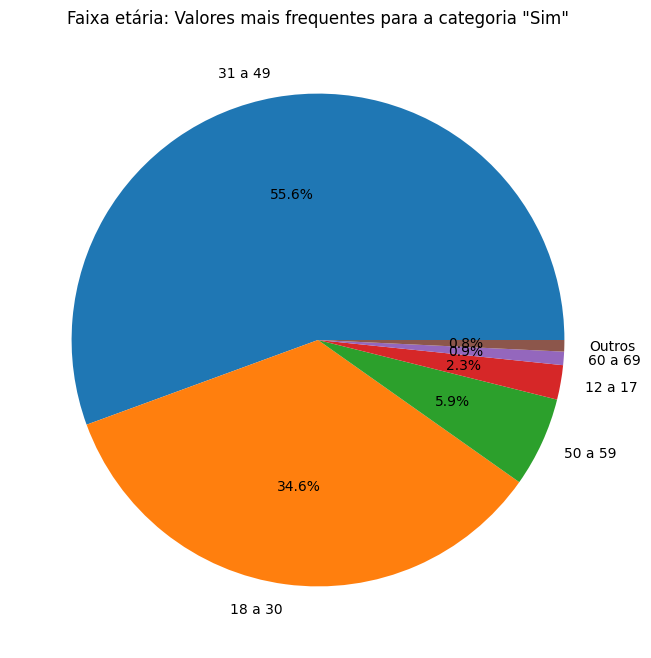

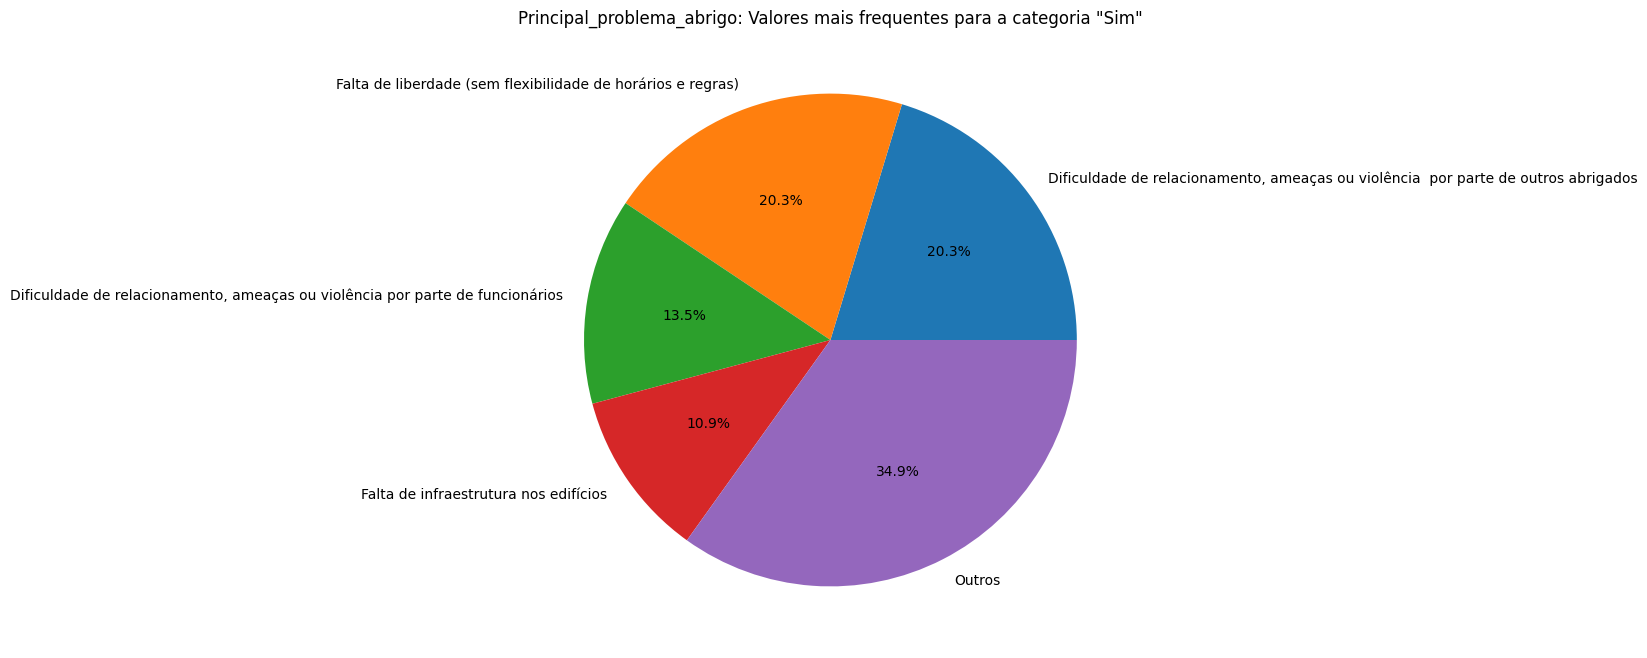

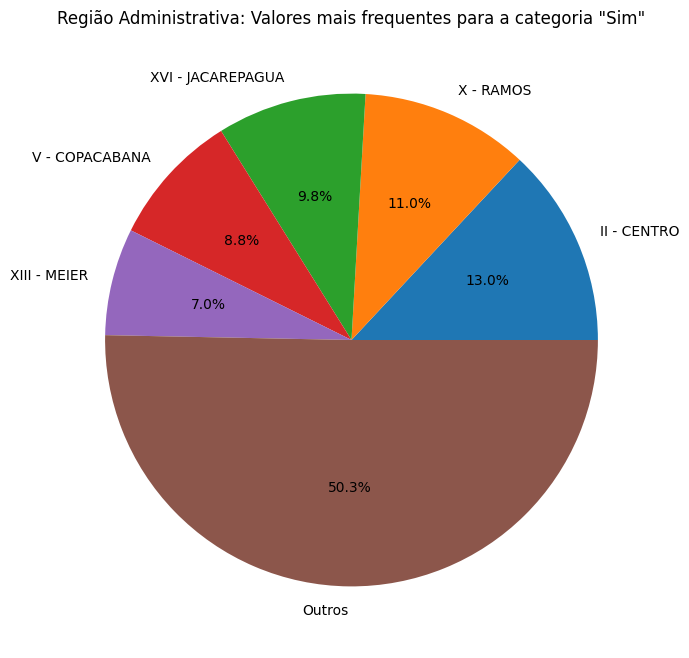

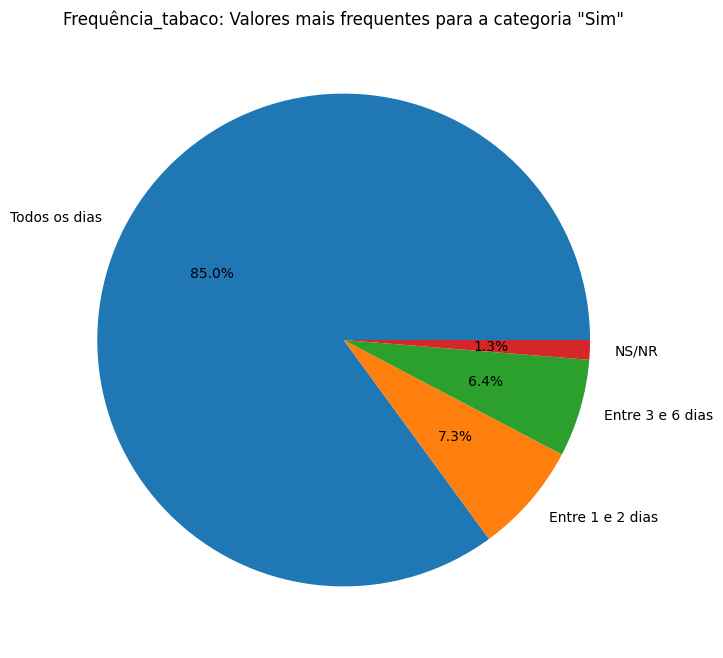

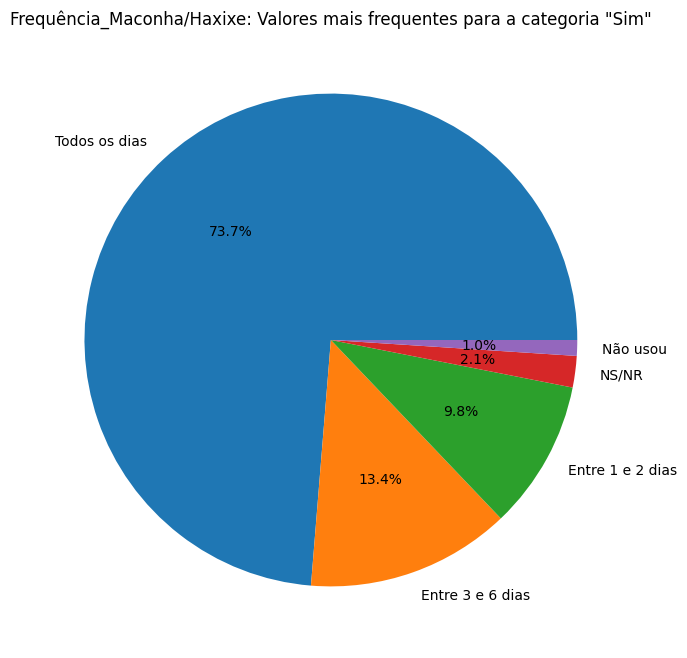

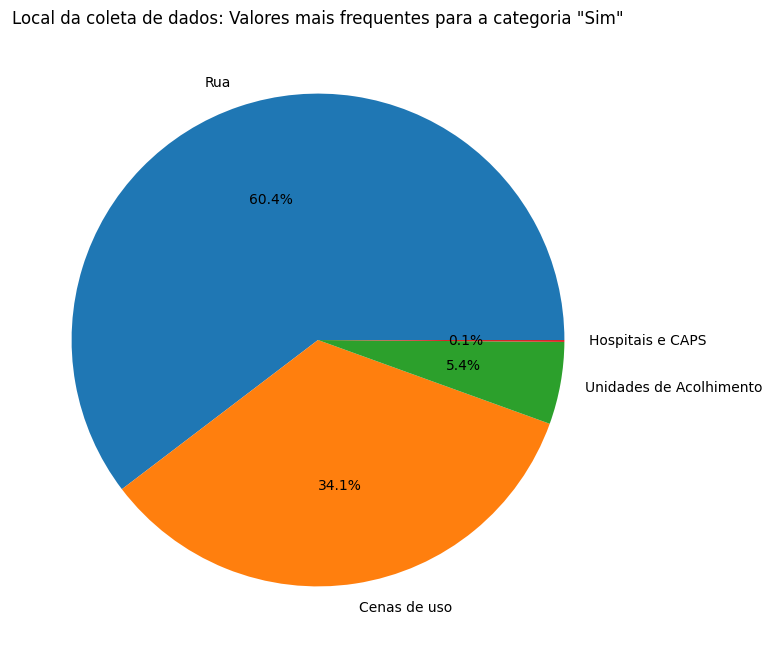

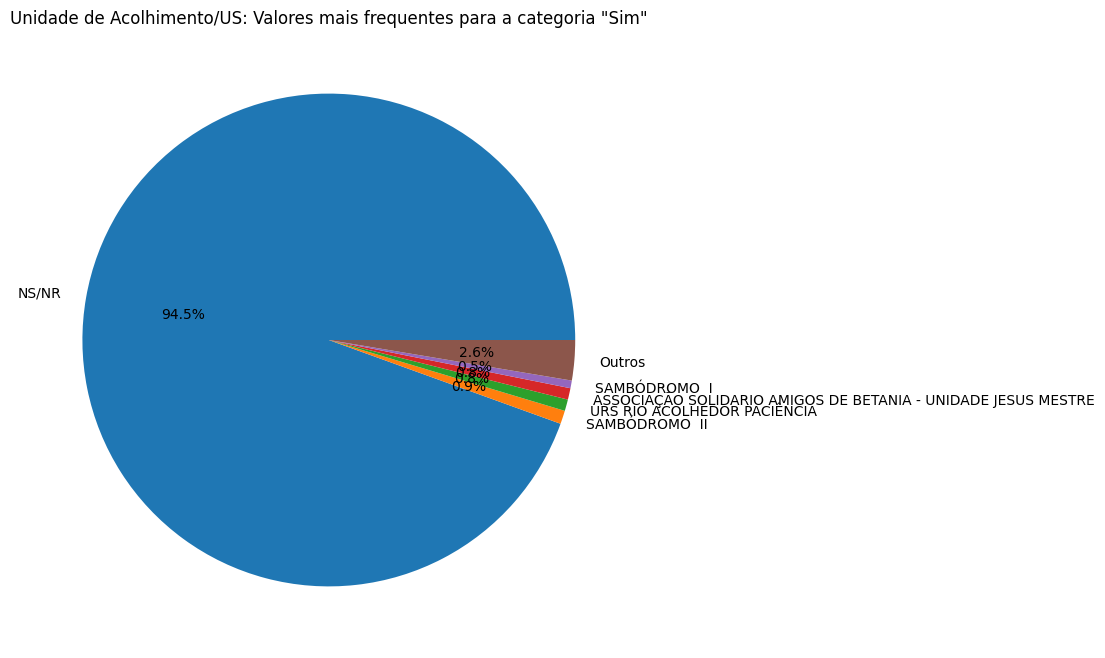

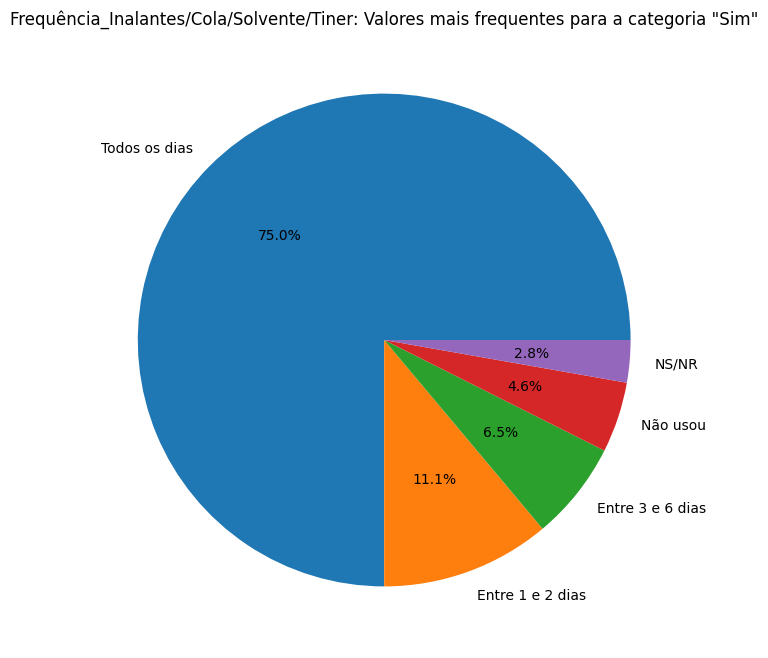

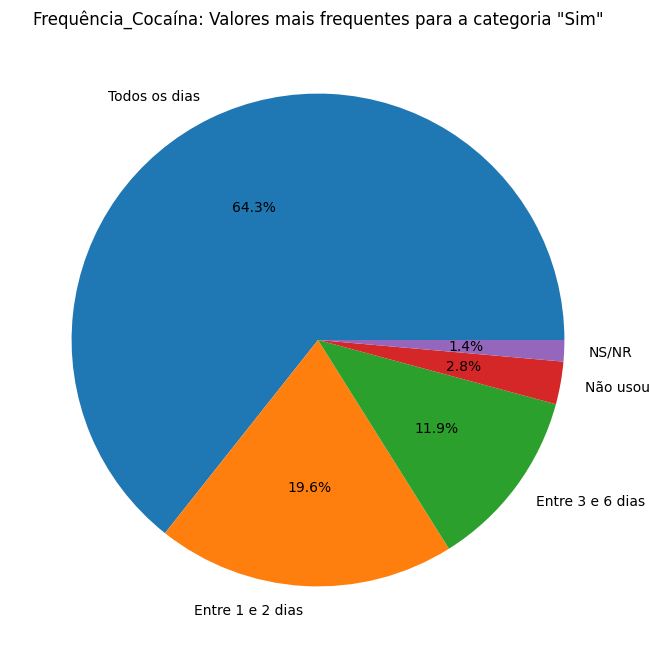

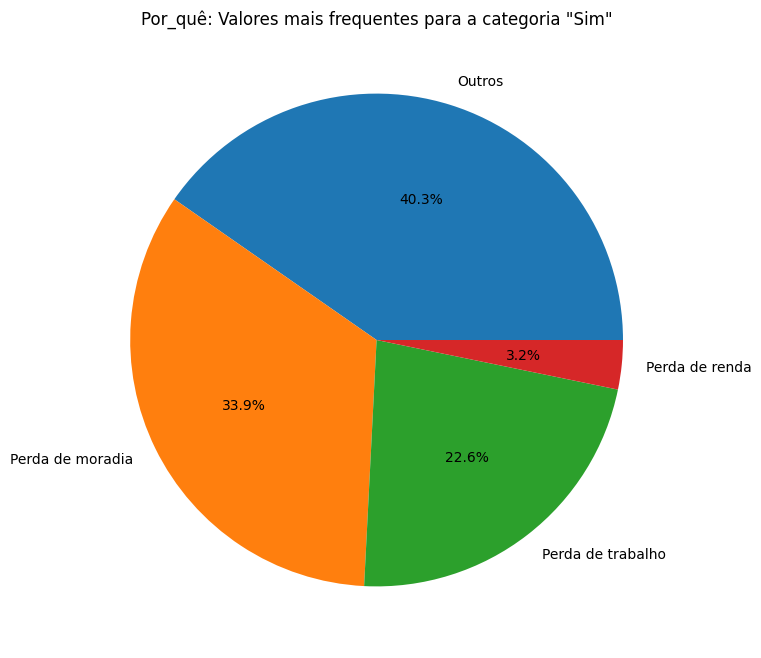

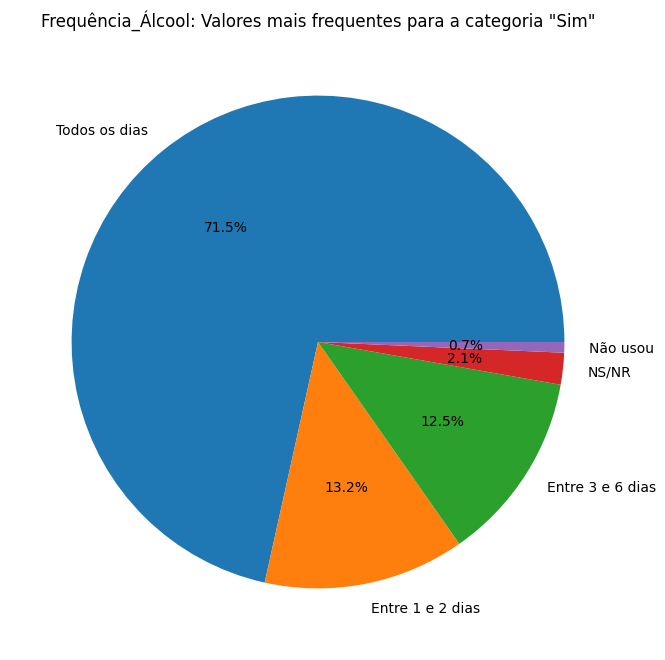

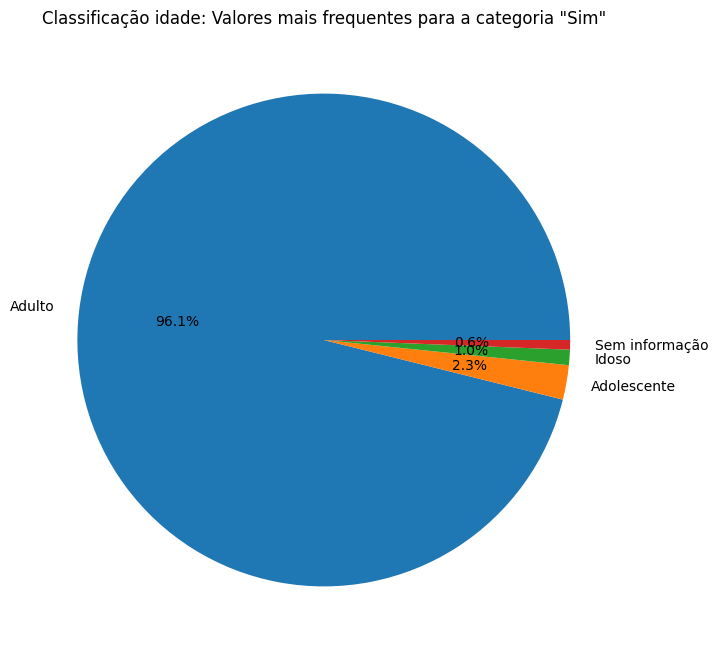

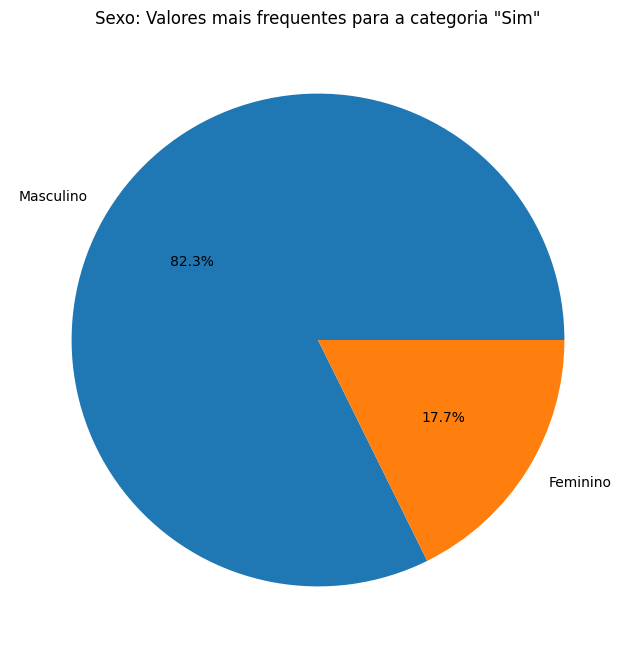

In [12]:
# Define as variáveis que serão utilizadas no gráfico
cols = [col for col in df_treino.columns if col != 'Crack/Similares']

# Define a quantidade máxima de categorias para exibir no gráfico
max_categories = 5

# Cria um gráfico de pizza para cada variável
for col in cols:
    # Obtém as categorias e suas frequências para a categoria 'Sim'
    sim_categories = df_treino[df_treino['Crack/Similares'] == 'Sim'][col].value_counts()
    # Filtra as categorias diferentes de 'Não se aplica'
    sim_categories = sim_categories[sim_categories.index != 'Não se aplica']
    
    # Agrupa as categorias que não estão entre as mais frequentes em uma categoria "Outros"
    if len(sim_categories) > max_categories:
        other_count = sim_categories.iloc[max_categories:].sum()
        sim_categories = sim_categories.iloc[:max_categories]
        sim_categories['Outros'] = other_count
        
    if col == 'Unidade de Acolhimento/US':
        # Agrupa as categorias que não estão entre as mais frequentes em uma categoria "Outros"
        if len(sim_categories) > 2:
            other_count = sim_categories.iloc[max_categories:].sum()
            sim_categories = sim_categories.iloc[:max_categories]
            sim_categories['Outros'] = other_count
        
    # Calcula a porcentagem de vezes que cada categoria aparece na categoria 'Sim'
    sim_categories_pct = (sim_categories / sim_categories.sum()) * 100
    
    # Cria uma figura
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Cria um gráfico de pizza com as porcentagens
    ax.pie(sim_categories_pct, labels=sim_categories.index, autopct='%1.1f%%')
    
    # Configura o título do gráfico
    ax.set_title(f'{col}: Valores mais frequentes para a categoria "Sim"')
    
    # Mostra o gráfico
    plt.show()


## Construção do Modelo de resposta Probabilistica:

In [13]:
df_teste['Crack/Similares'].value_counts()

Dados inconclusios    3326
Name: Crack/Similares, dtype: int64

In [14]:
# Obtém as probabilidades de cada resposta da variável alvo com base nas outras variáveis
variaveis = df_treino.columns.tolist()  # Lista de todas as variáveis no DataFrame
variaveis.remove('Crack/Similares')  # Remove a variável alvo da lista
probabilidades = df_treino.groupby(variaveis)['Crack/Similares'].value_counts(normalize=True)

# Função para imputar dados faltantes com base nas probabilidades
def imputar_dados_inconclusivos(row):
    if row['Crack/Similares'] == 'Dados inconclusios':
        try:
            # Tenta obter as probabilidades das respostas 'Sim' e 'Não' com base nas outras variáveis
            prob_sim = probabilidades[tuple(row[variaveis])]['Sim']
        except:
            # Se não houver probabilidades para a categoria, assume que é igual a zero
            prob_sim = 0.0
        # Se a probabilidade da categoria 'Sim' for maior que 0.5, assume que a resposta é 'Sim', caso contrário, assume que é 'Não'
        if prob_sim >= 0.5:
            return 'Sim'
        else:
            return 'Não'
    else:
        return row['Crack/Similares']
    
df_teste['Crack/Similares'] = df_teste.apply(imputar_dados_inconclusivos, axis=1)

In [15]:
df_teste['Crack/Similares'].value_counts()

Não    2988
Sim     338
Name: Crack/Similares, dtype: int64

# Finalizando o estudo probabilistico:

In [16]:
# Juntando os dois dataframes num DataFrame final:
df_final = pd.concat([df_treino, df_teste], axis=0).reset_index(drop=True)
df_final.to_csv(diretorio+'\\'+'PopRua_tratado.csv', index=False)
df_final

Bairro Dormiu_abrigo_quanto_tempo      Faixa etária  \
0        Paciência              Não se aplica           18 a 30   
1     Campo Grande              Não se aplica           31 a 49   
2     Campo Grande              Não se aplica           31 a 49   
3     Campo Grande   Entre 1 semana até 1 mês           50 a 59   
4     Campo Grande        Menos de uma semana           31 a 49   
...            ...                        ...               ...   
7267     Guaratiba              Não se aplica  Não identificada   
7268     Guaratiba              Não se aplica  Não identificada   
7269     Guaratiba              Não se aplica  Não identificada   
7270     Guaratiba              Não se aplica  Não identificada   
7271     Guaratiba              Não se aplica  Não identificada   

                              Principal_problema_abrigo Região Administrativa  \
0                                         Não se aplica      XIX - SANTA CRUZ   
1     Dificuldade de relacionamento, ameaças ou viol...  XVIII - CAMPO GRANDE   
2                                         Não se aplica  XVIII - CAMPO GRANDE   
3                                                 NS/NR  XVIII - CAMPO GRANDE   
4                                         Não se aplica  XVIII - CAMPO GRANDE   
...                                                 ...                   ...   
7267                                      Não se aplica      XXVI - GUARATIBA   
7268                                      Não se aplica      XXVI - GUARATIBA   
7269                                      Não se aplica      XXVI - GUARATIBA   
7270                                      Não se aplica      XXVI - GUARATIBA   
7271                                      Não se aplica      XXVI - GUARATIBA   

     Frequência_tabaco Frequência_Maconha/Haxixe  Local da coleta de dados  \
0        Não se aplica             Não se aplica                       Rua   
1        Não se aplica             Não se aplica                       Rua   
2        Não se aplica             Não se aplica                       Rua   
3        Não se aplica             Não se aplica                       Rua   
4        Não se aplica             Não se aplica                       Rua   
...                ...                       ...                       ...   
7267     Não se aplica             Não se aplica  Comunidades terapêuticas   
7268     Não se aplica             Não se aplica  Comunidades terapêuticas   
7269     Não se aplica             Não se aplica  Comunidades terapêuticas   
7270     Não se aplica             Não se aplica  Comunidades terapêuticas   
7271     Não se aplica             Não se aplica  Comunidades terapêuticas   

           Unidade de Acolhimento/US Frequência_Inalantes/Cola/Solvente/Tiner  \
0                              NS/NR                            Não se aplica   
1                              NS/NR                            Não se aplica   
2                              NS/NR                            Não se aplica   
3                              NS/NR                            Não se aplica   
4                              NS/NR                            Não se aplica   
...                              ...                                      ...   
7267  Instituto Revivendo com Cristo                            Não se aplica   
7268  Instituto Revivendo com Cristo                            Não se aplica   
7269  Instituto Revivendo com Cristo                            Não se aplica   
7270  Instituto Revivendo com Cristo                            Não se aplica   
7271  Instituto Revivendo com Cristo                            Não se aplica   

     Frequência_Cocaína        Por_quê Frequência_Álcool Classificação idade  \
0         Não se aplica  Não se aplica     Não se aplica              Adulto   
1         Não se aplica  Não se aplica     Não se aplica              Adulto   
2         Não se aplica  Não se aplica     Não se aplica              Adulto   
3   

## Principais categorias por variável:

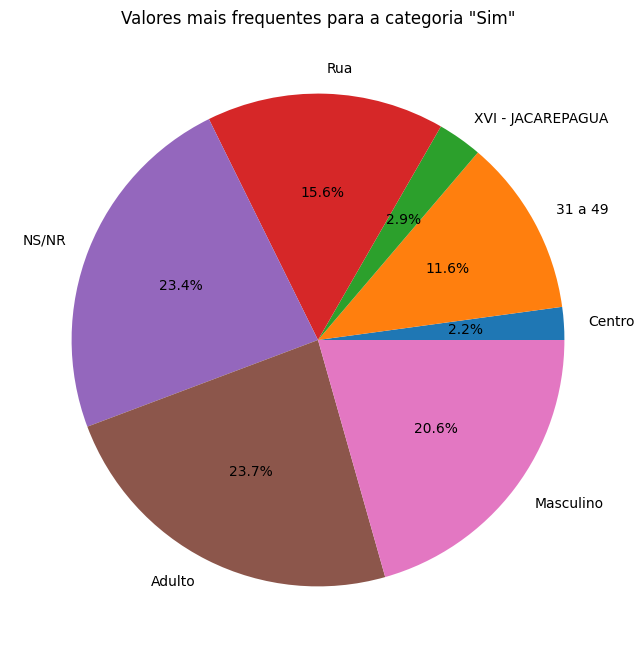

In [17]:
# Cria uma lista para armazenar os valores e as porcentagens
valores_porcentagens = []

for col in df_final.columns:
    if col != 'Crack/Similares':
        # Obtém o valor mais frequente para a categoria 'Sim'
        valor = df_final[df_final['Crack/Similares'] == 'Sim'][col].value_counts().idxmax()
        if valor != 'Não se aplica':
            # Calcula a porcentagem de vezes que o valor aparece na categoria 'Sim'
            porcentagem = (df_final[(df_final['Crack/Similares'] == 'Sim') & (df_final[col] == valor)].shape[0] / df_final[df_final['Crack/Similares'] == 'Sim'].shape[0]) * 100
            # Adiciona o valor e a porcentagem à lista
            valores_porcentagens.append((valor, porcentagem))

# Cria uma figura
fig, ax = plt.subplots(figsize=(8, 8))

# Cria um gráfico de pizza com as porcentagens
ax.pie([vp[1] for vp in valores_porcentagens], labels=[vp[0] for vp in valores_porcentagens], autopct='%1.1f%%')

# Configura o título do gráfico
ax.set_title('Valores mais frequentes para a categoria "Sim"')

# Mostra o gráfico
plt.show()

## Análise da distribuição das categorias da variável alvo por cada categoria:

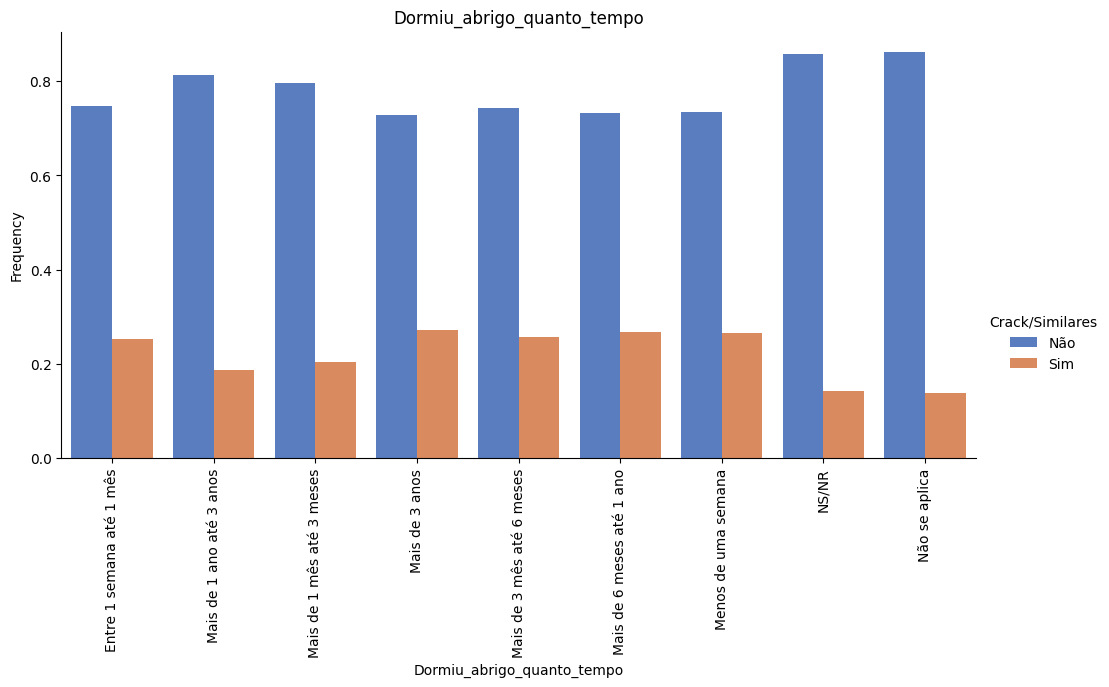

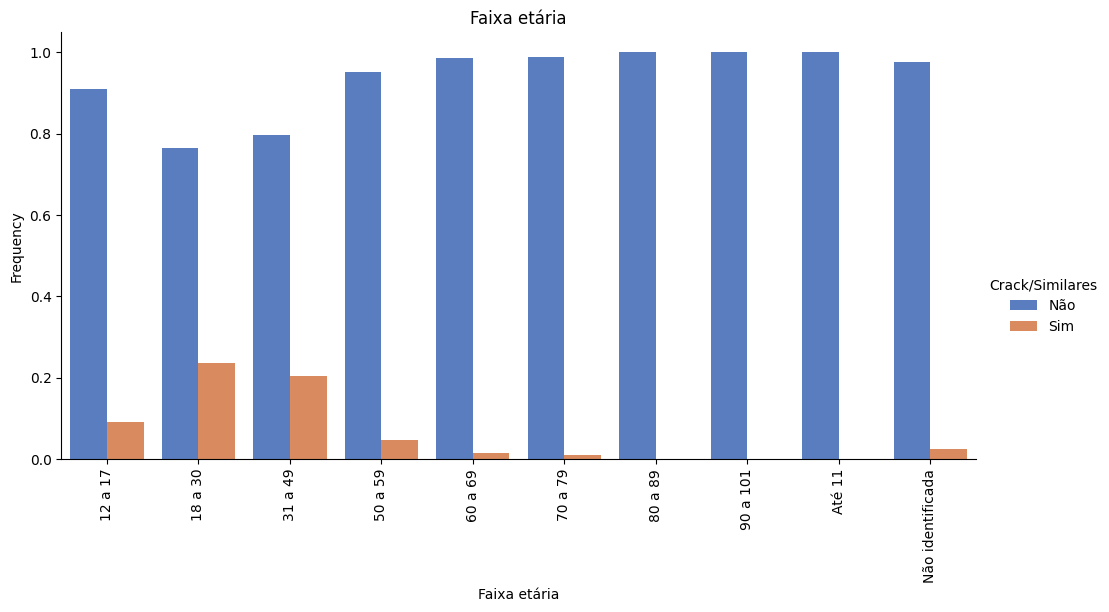

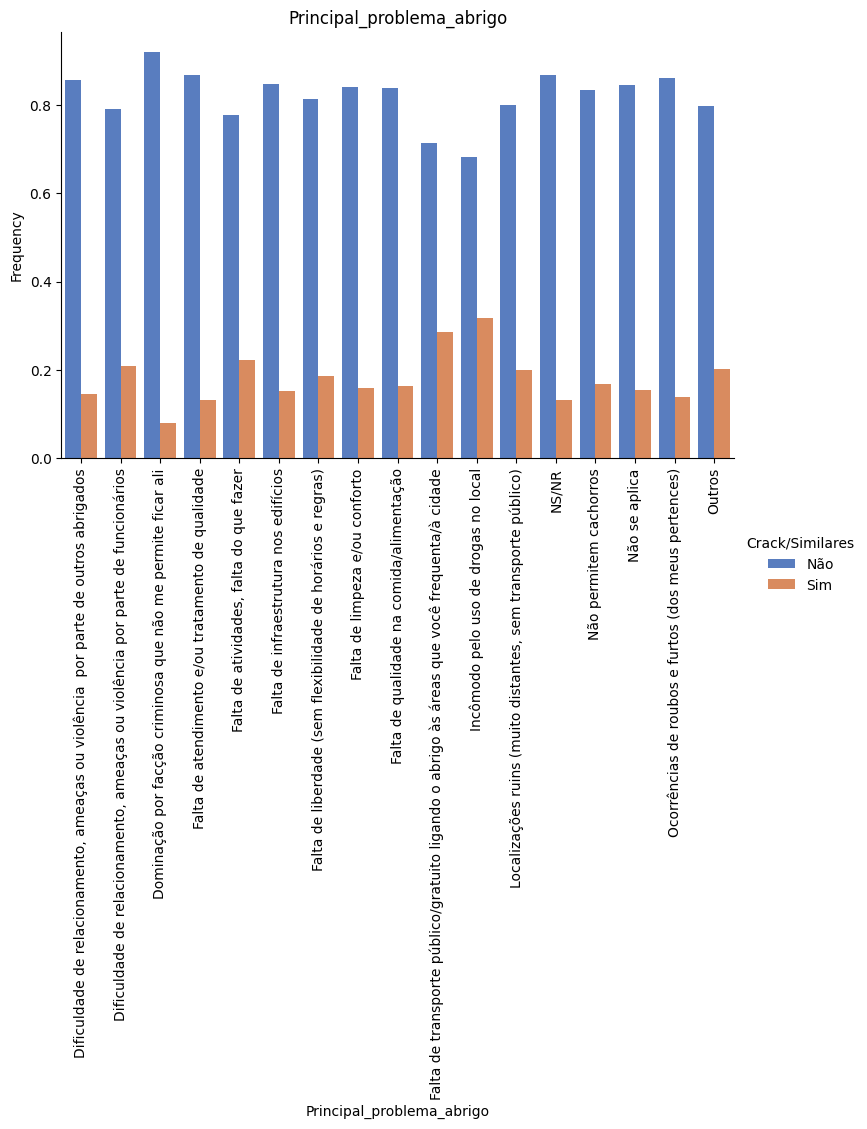

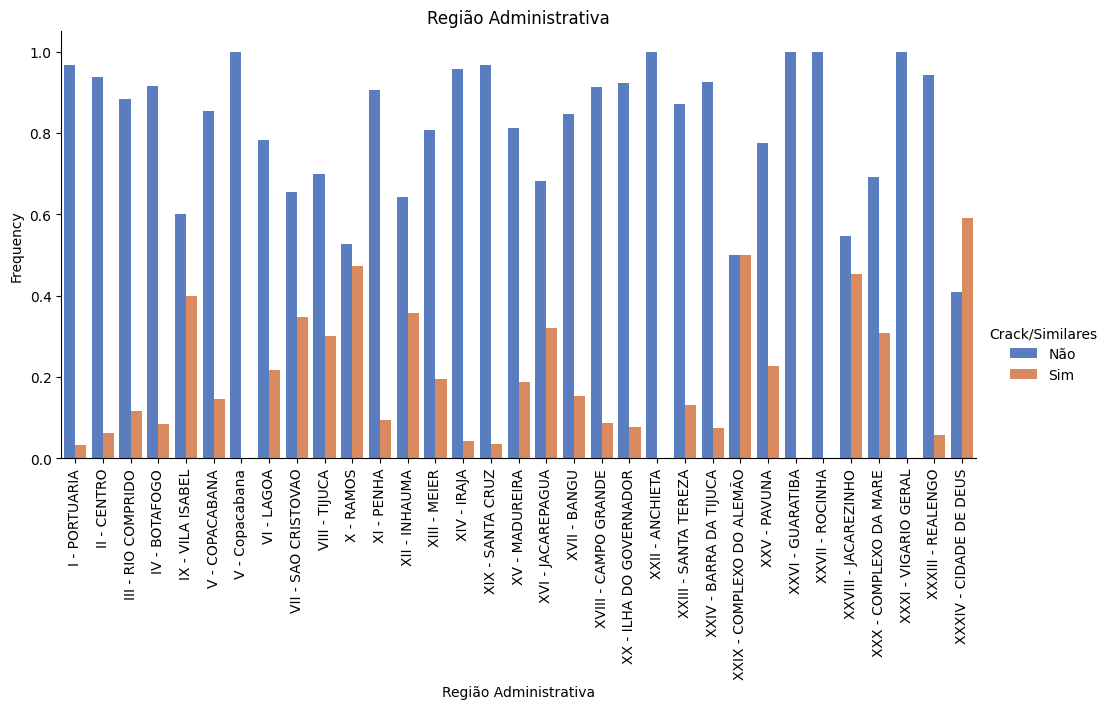

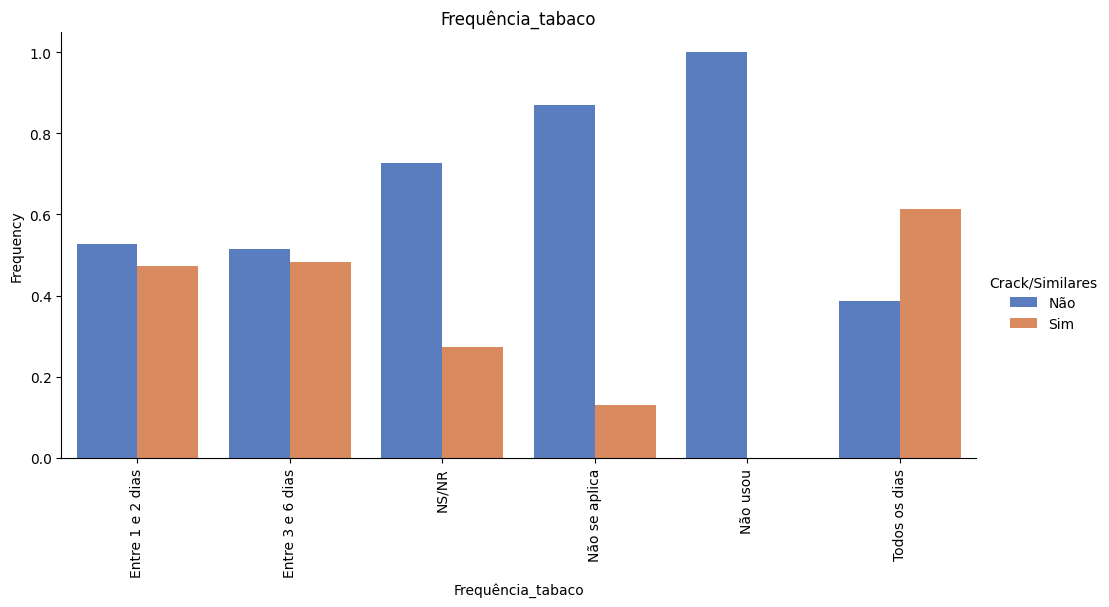

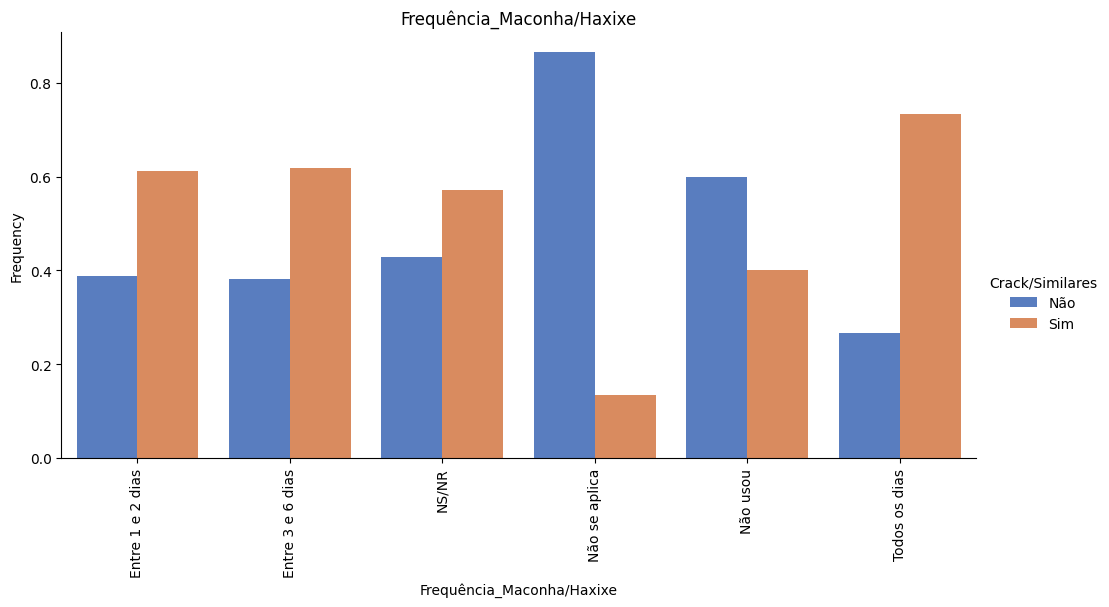

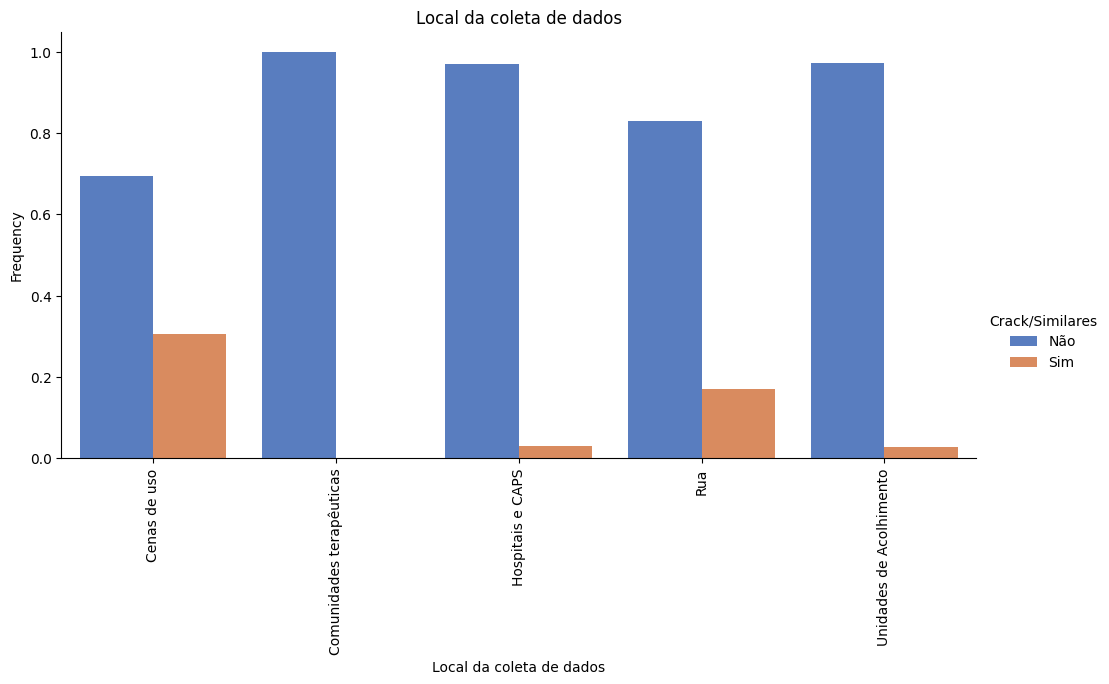

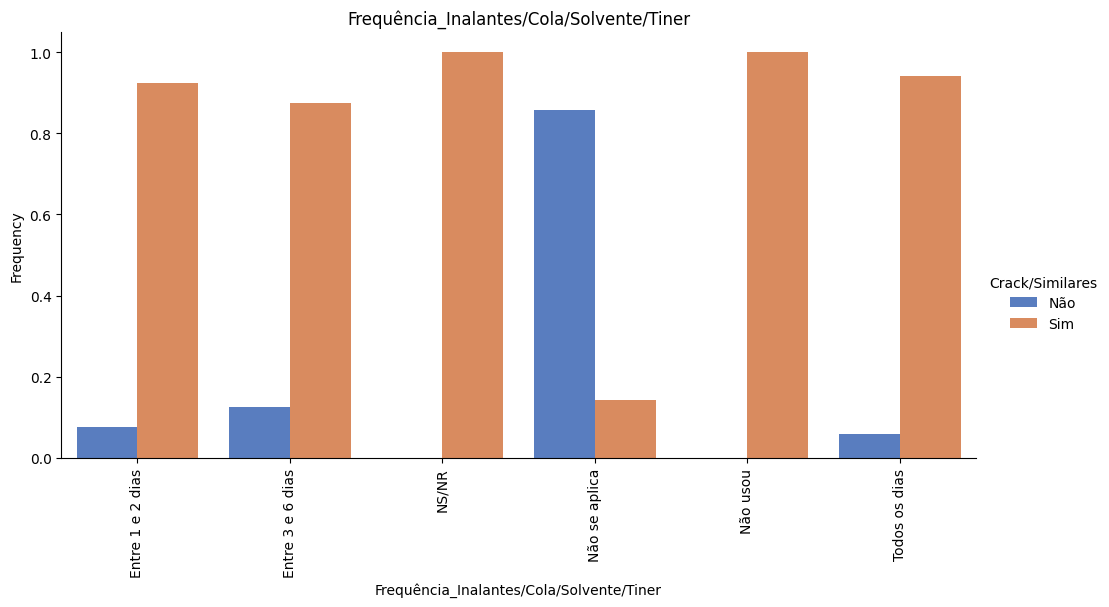

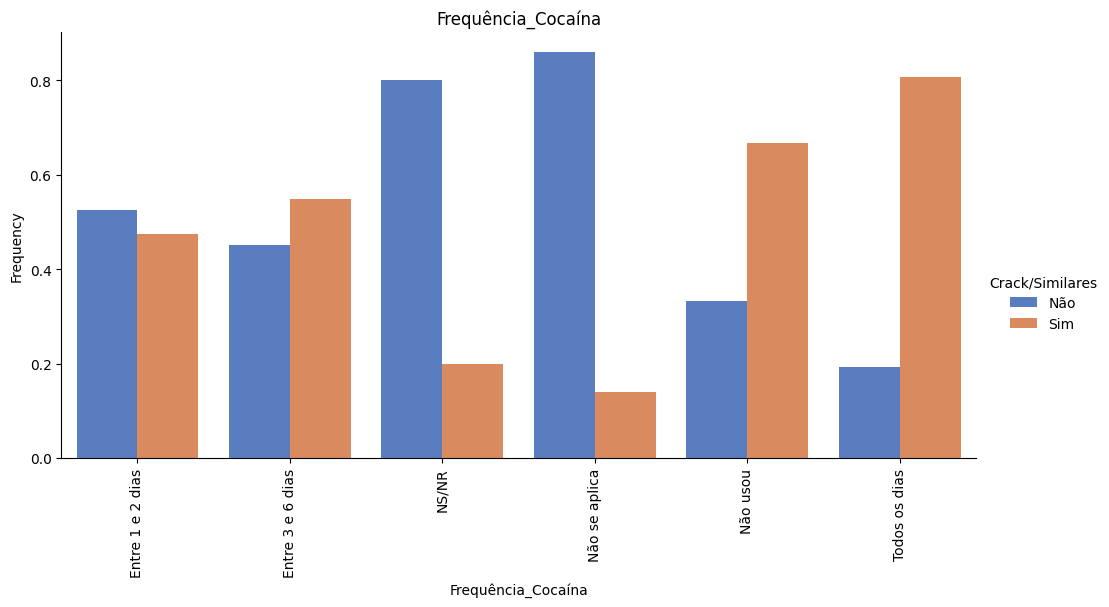

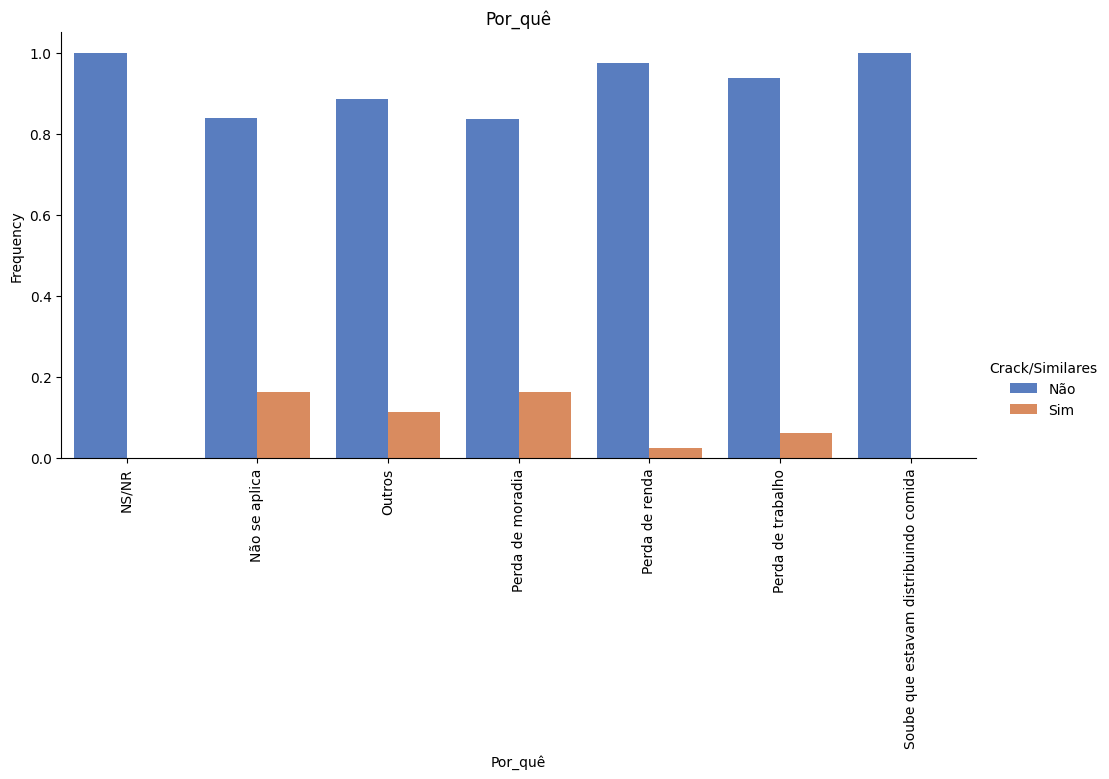

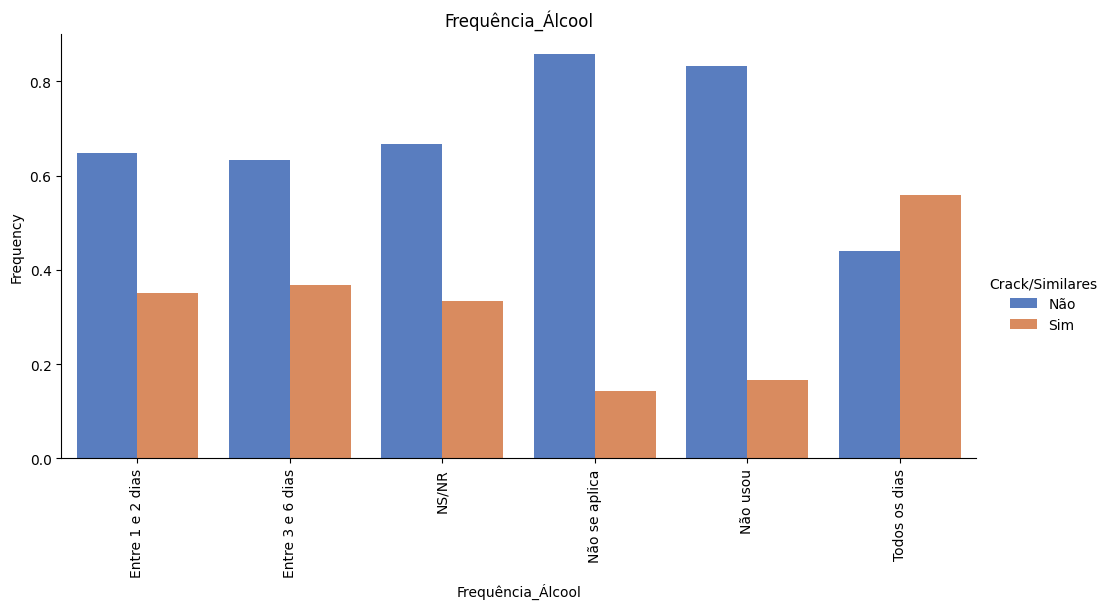

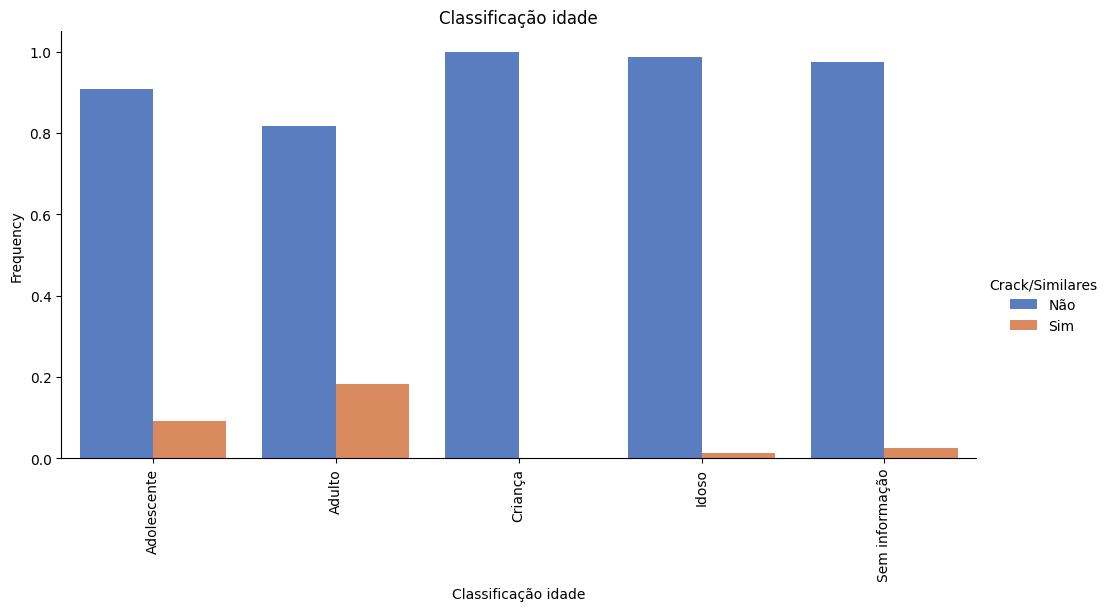

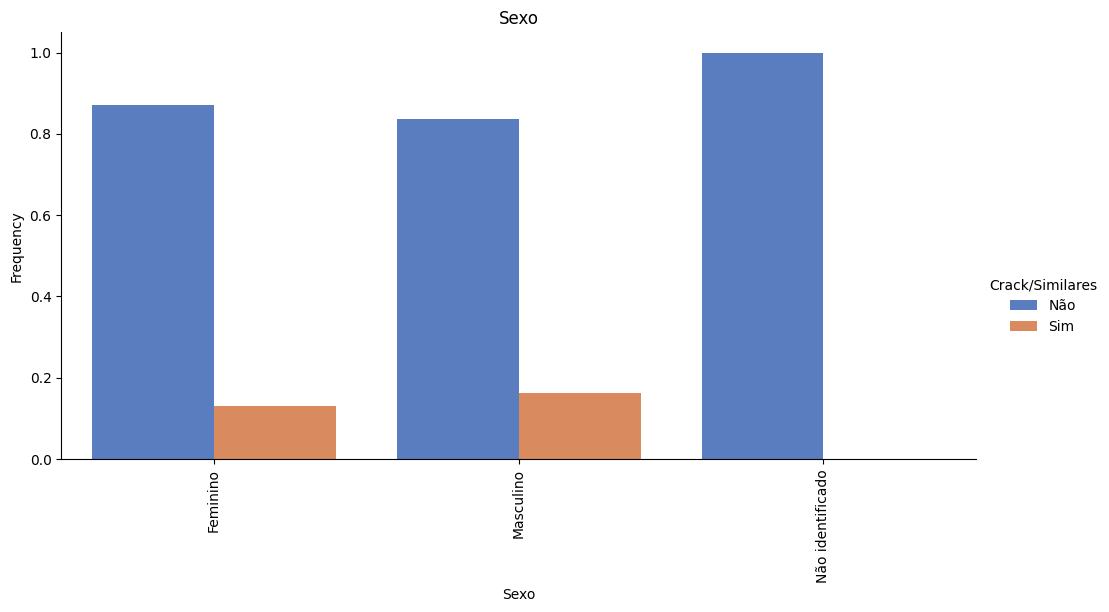

In [18]:
# Itera sobre as colunas categóricas
for col in df_final.columns:
    if col not in ['Bairro', 'Unidade de Acolhimento/US', 'Município', 'Bairro_7_dias', 'Crack/Similares']:
        # Cria tabela de contingência
        ct = pd.crosstab(df_final[col], df_final['Crack/Similares'])
        # Transforma os valores em frequências
        ct = ct.apply(lambda r: r/r.sum(), axis=1)
        # Transforma a tabela em formato longo
        ct = ct.stack().reset_index(name='freq')
        # Plota gráfico de barras
        fig = sns.catplot(data=ct, x=col, y='freq', hue='Crack/Similares', kind='bar', height=5, aspect=2, palette='muted')
        # Configurações do gráfico
        fig.ax.set_title(col)
        fig.ax.set_xlabel(col)
        fig.ax.set_ylabel('Frequency')
        fig.ax.set_xticklabels(fig.ax.get_xticklabels(), rotation=90)
        plt.show()

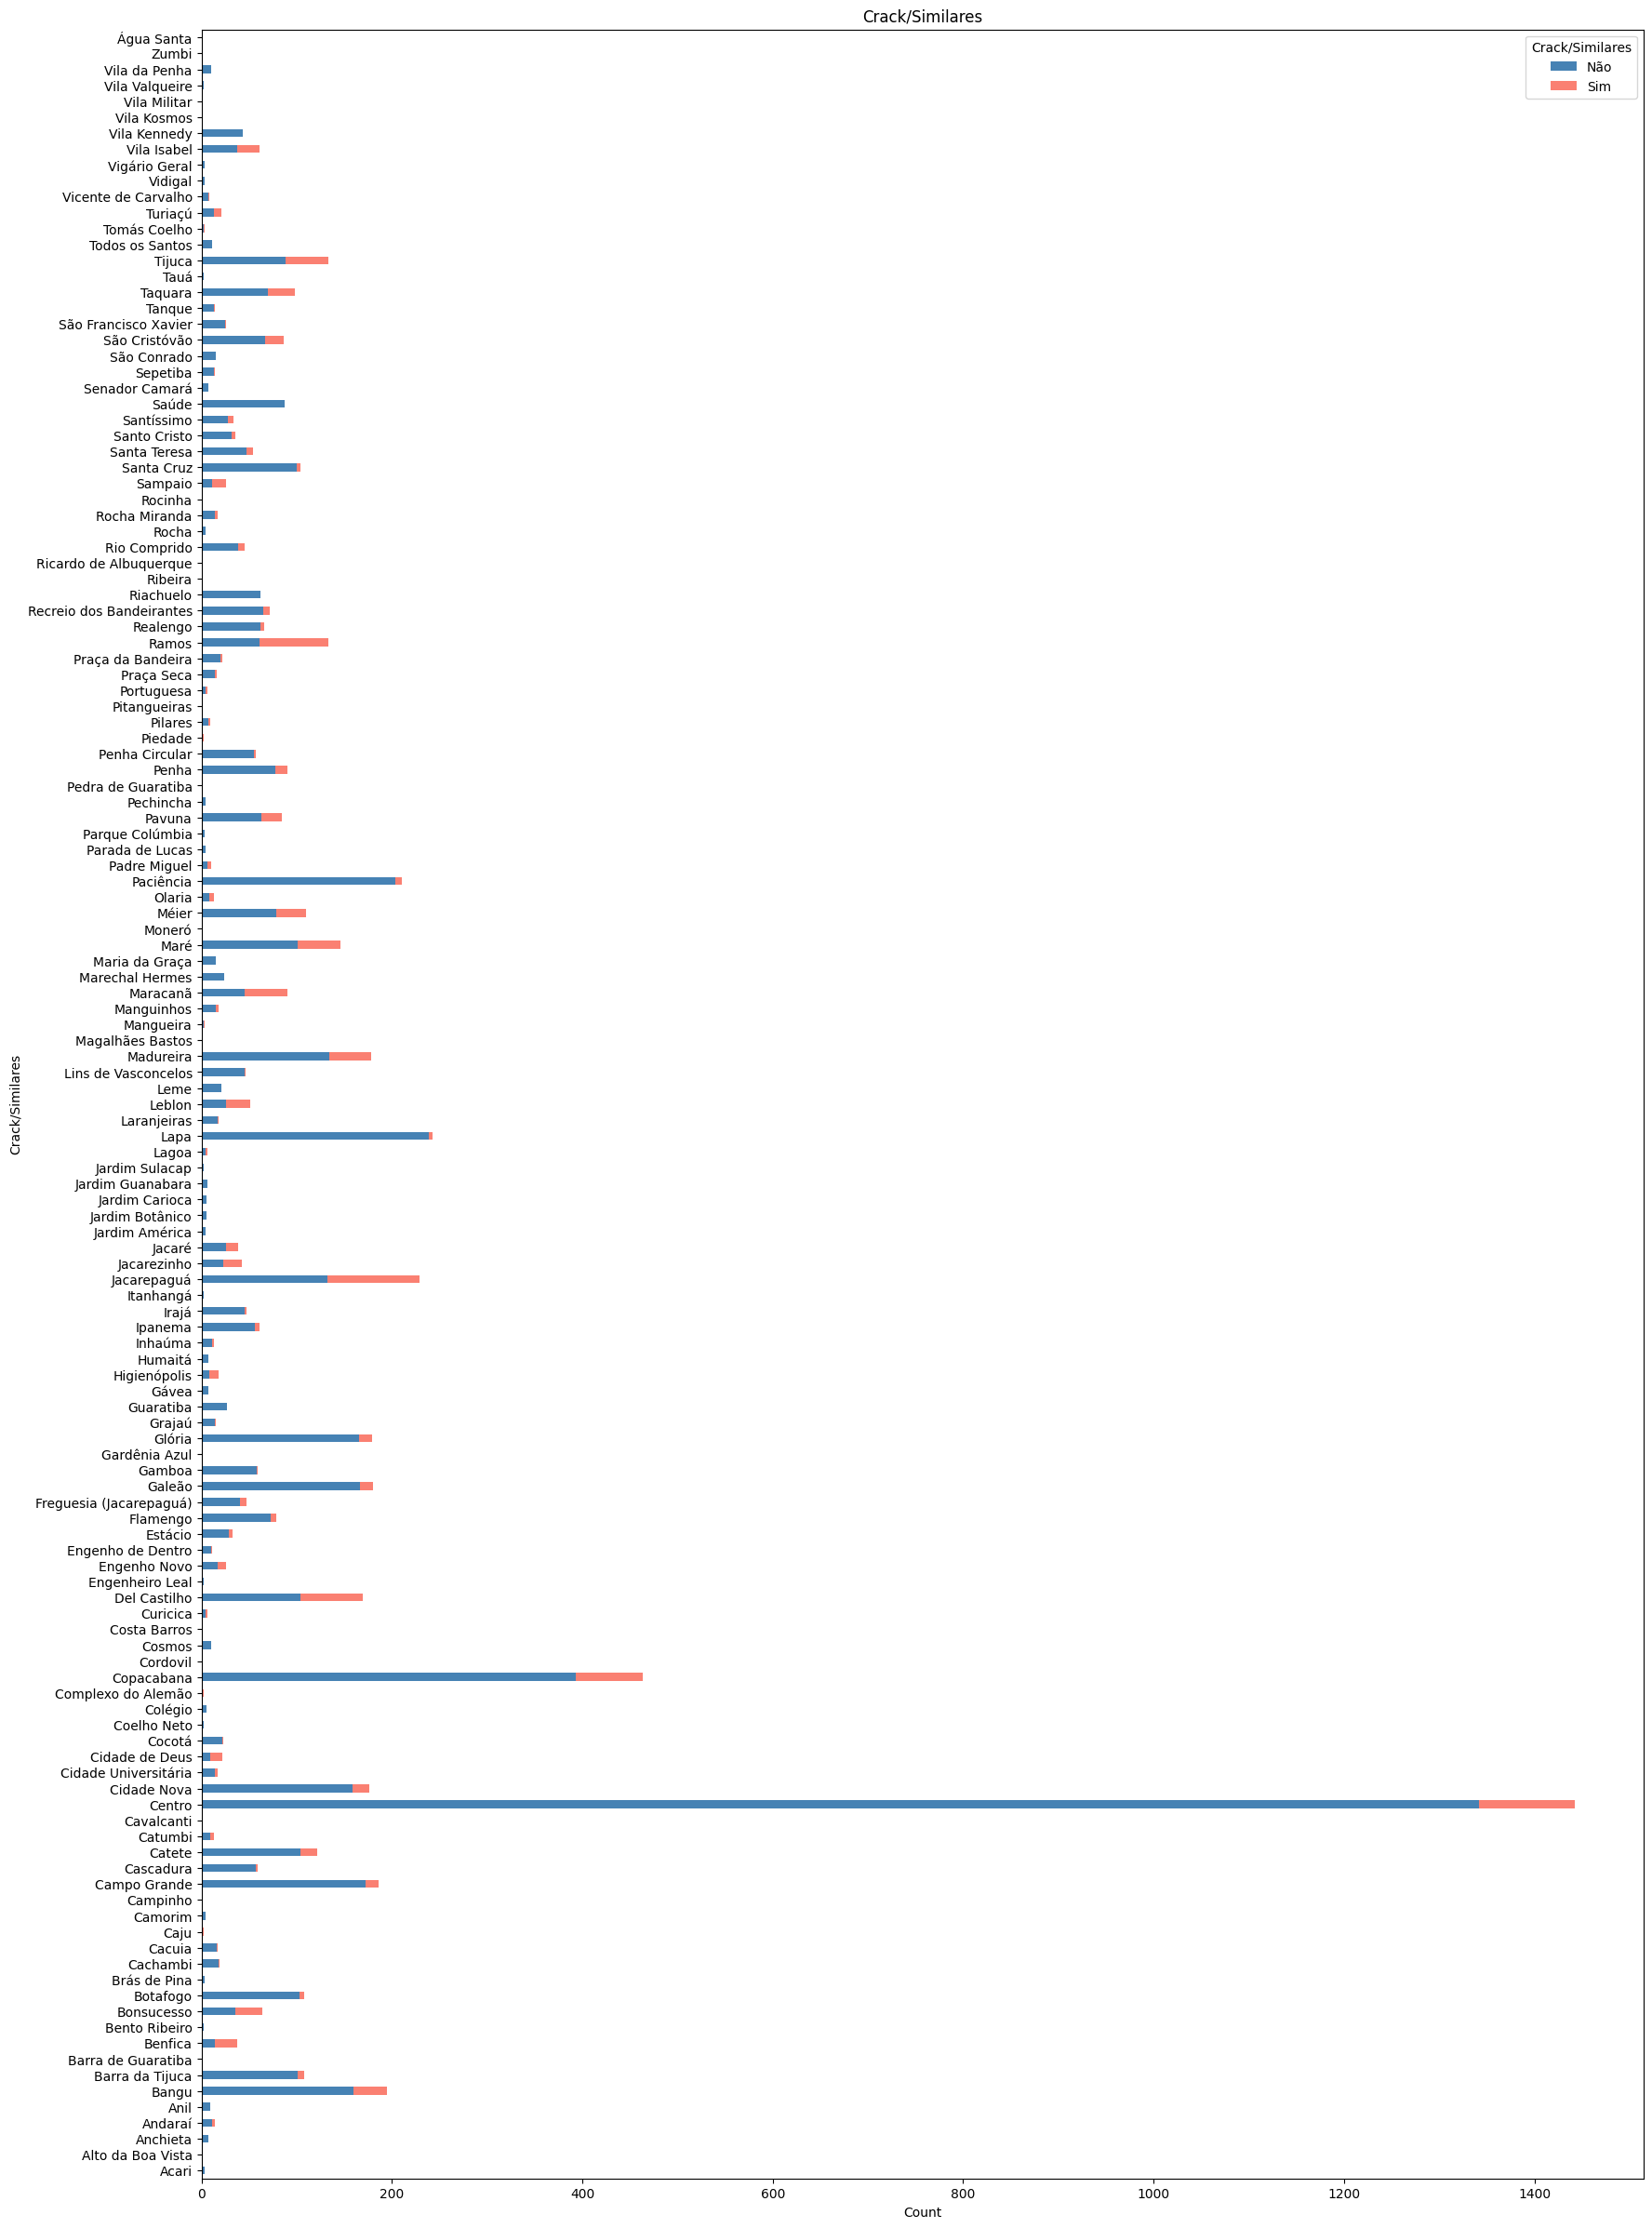

In [19]:
# Cria tabela de contingência
ct = pd.crosstab(df_final['Bairro'], df_final['Crack/Similares'])
# Plota gráfico de barras
fig, ax = plt.subplots(figsize=(20,30))
cores = ['#4682B4', '#FA8072']
ct.plot(kind='barh', stacked=True, ax=ax, color = cores)
# Configurações do gráfico
ax.set_title(col)
ax.set_xlabel('Count')
ax.set_ylabel(col)
plt.show()